In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
!ls 

'CUSIP_ESG_BBM (1).csv'		    'ICE_dataset_df_final (2) (1).csv'
'ESG_ICE_dataset_df_final (1).csv'   sample_data


In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

KeyboardInterrupt: ignored

In [ ]:
root_drive =  'drive/My Drive/Blackrock_Project/' 

In [ ]:
Data_CUSIP_asc = pd.read_excel(root_drive+'/Bloomberg/'+'BBG_GreenBonds_CUSIP_asc.xlsx') 
Data_CUSIP_desc = pd.read_excel(root_drive+'/Bloomberg/'+'BBG_GreenBonds_CUSIP_desc.xlsx') 
Data_state_desc = pd.read_excel(root_drive+'/Bloomberg/'+'BBG_GreenBonds_state_desc.xlsx') 
Data_state_asc = pd.read_excel(root_drive+'/Bloomberg/'+'BBG_GreenBonds_state_asc.xlsx') 
Data_sortMaturity_desc = pd.read_excel(root_drive+'/Bloomberg/'+'BBG_GreenBonds_sortMaturity_desc.xlsx') 
Data_sortMaturity_asc = pd.read_excel(root_drive+'/Bloomberg/'+'BBG_GreenBonds_sortMaturity_asc.xlsx') 

In [ ]:
import os
listfiles = os.listdir(root_drive+'/ICE/')

Currently, I am only taking into account securities which are constantly in the index. For those securities which are not present, I am going to avoid them. I will add them in later stages of this analysis.

In [ ]:
type(listfiles)

list

In [ ]:
#Importing data for ICE index 
import pickle 

if 'ICE_dataset.pkl' in listfiles:
  pkl_file = open('ICE_dataset.pkl', 'rb')
  ICE_dataset = pickle.load(pkl_file)
  pkl_file.close()

else:
  ICE_dataset = {} 
  for i in listfiles: 
    ICE_dataset[i[5:13]] = pd.read_excel(root_drive+'/ICE/'+i,skiprows=[0]) 
  # write python dict to a file
  output = open('ICE_dataset.pkl', 'wb') 
  pickle.dump(ICE_dataset, output) 
  output.close() 

In [ ]:
ICE_dataset_df = pd.DataFrame() 

for i in ICE_dataset.keys(): 
  ICE_dataset_df = pd.concat([ICE_dataset_df, ICE_dataset[i]]) 

ICE_dataset_df.sort_values(by = ['As of Date'],ascending = True,inplace = True) 
ICE_dataset_df = ICE_dataset_df.reset_index(drop = True).copy() 

In [ ]:
ICE_dataset_df.to_pickle('ICE_dataset_df.pkl')

In [ ]:
ICE_dataset_df.head()

Cusip   ISIN number  ... Muni Security Type Muni Conduit Obligor Name
0  988516BA  US988516BA75  ...            Revenue                       NaN
1  486063SJ  US486063SJ04  ...     Unlimited G.O.                       NaN
2  486063BR  US486063BR03  ...     Unlimited G.O.                       NaN
3  48563UBB  US48563UBB61  ...            Revenue                       NaN
4  48563UAQ  US48563UAQ40  ...            Revenue                       NaN

[5 rows x 47 columns]

In [ ]:
#ICE_dataset_df.apply(lambda x: [1, 2], axis=1)

#len(ICE_dataset_df['Cusip'])==8

ICE_dataset_df = ICE_dataset_df.dropna(subset=['Cusip']).copy() 
ICE_dataset_df = ICE_dataset_df[ICE_dataset_df['Cusip'].str.len()==8] 

In [ ]:
ICE_dataset_df.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

In [ ]:
print(ICE_dataset_df['Excess Return % MTD'], ICE_dataset_df['Excess Return % MTD']*(1+ ICE_dataset_df['Total Return % 3-mo_LOC']/100))

0         0.49199999999999999289
1         0.98399999999999998579
2         0.52600000000000002309
3         1.07200000000000006395
4         1.13599999999999989875
                   ...          
447672   -1.07699999999999995737
447673   -1.10299999999999998046
447674   -1.10299999999999998046
447675   -1.11600000000000010303
447676   -1.20999999999999996447
Name: Excess Return % MTD, Length: 447677, dtype: float64 0         0.49188191999999997250
1         0.95963615999999996031
2         0.53167554000000005754
3         1.03928255999999996639
4         1.11282559999999985934
                   ...          
447672   -1.11927224999999985755
447673   -1.14994367999999980157
447674   -1.14994367999999980157
447675   -1.16434512000000012222
447676   -1.24043149999999990918
Length: 447677, dtype: float64


In [ ]:
ICE_dataset_df_grp = ICE_dataset_df.groupby(['Cusip']).count() 

In [ ]:
ICE_dataset_df_grp.sort_values(by = 'Ticker',ascending=False)

ISIN number  ...  Muni Conduit Obligor Name
Cusip                  ...                           
649519BV           25  ...                         25
797272LV           25  ...                          0
4424355M           25  ...                          0
4424355Y           25  ...                          0
4424355Z           25  ...                          0
...               ...  ...                        ...
644614XG            1  ...                          1
87638QNA            1  ...                          1
64465PKN            1  ...                          0
927781A3            1  ...                          0
196711TS            1  ...                          0

[34560 rows x 46 columns]

In [ ]:
## Creating an index for the CUSIPs 
ICE_dataset_df['% Mkt Value'].sum() 

2500.00058

In [ ]:
ICE_dataset_full_df = ICE_dataset_df.copy()
ICE_dataset_full_df.sort_values(by = ['As of Date','Cusip'],ascending = True,inplace = True) 
ICE_dataset_full_df = ICE_dataset_full_df.reset_index(drop = True).copy() 

In [ ]:
ICE_dataset_full_df.head()

Cusip  ...               Muni Conduit Obligor Name
0  00037CKT  ...                                     NaN
1  00037CPL  ...  SHARP HEALTHCARE (SAN DIEGO HOSP ASSN)
2  00037CPY  ...                CASA DE LAS CAMPANAS INC
3  00037CQP  ...                          CHANNING HOUSE
4  00037CRG  ...  SHARP HEALTHCARE (SAN DIEGO HOSP ASSN)

[5 rows x 47 columns]

In [ ]:
ICE_dataset_full_df.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

In [ ]:
ICE_dataset_full_df_grp = ICE_dataset_full_df.groupby(['Cusip']).count() 

In [ ]:
ICE_dataset_full_df['% Mkt Value'].sum() 

2500.0005800000004

In [ ]:
ICE_dataset_df_grp.index 

Index(['00037CKT', '00037CPL', '00037CPY', '00037CQP', '00037CRG', '00037CRW',
       '00037CTH', '00037CTL', '00037CUQ', '00037CVN',
       ...
       '9881688H', '9881688J', '9881688N', '98816PBV', '98816PBW', '98816PCU',
       '98816PCV', '988176BZ', '988211AJ', '988516BA'],
      dtype='object', name='Cusip', length=34560)

In [ ]:
ICE_dataset_full_df_grp.index

Index(['00037CKT', '00037CPL', '00037CPY', '00037CQP', '00037CRG', '00037CRW',
       '00037CTH', '00037CTL', '00037CUQ', '00037CVN',
       ...
       '9881688H', '9881688J', '9881688N', '98816PBV', '98816PBW', '98816PCU',
       '98816PCV', '988176BZ', '988211AJ', '988516BA'],
      dtype='object', name='Cusip', length=34560)

In [ ]:
ICE_dataset_df_grp.sort_values(by = ['Ticker'],ascending = False,inplace = True) 

In [ ]:
ICE_dataset_full_df_grp.sort_values(by = ['Ticker'],ascending = False,inplace = True) 

In [ ]:
ICE_dataset_full_df_grp.head() 

ISIN number  ...  Muni Conduit Obligor Name
Cusip                  ...                           
649519BV           25  ...                         25
797272LV           25  ...                          0
4424355M           25  ...                          0
4424355Y           25  ...                          0
4424355Z           25  ...                          0

[5 rows x 46 columns]

In [ ]:
# ICE_dataset_df_grp_chk = ICE_dataset_df_grp[ICE_dataset_df_grp['Ticker'] == 25].reset_index(drop=False)

As we have seen above, there is huge number of drops in the securities when checked for all time coverage. Hence, we will either add them on security list by giving them 0% weight or remove them from the list.

In [ ]:
# Importing data for future manipulations 
# from google.colab import files 
# uploaded = files.upload() 

In [ ]:
## Creating an Index 
# Cusip list for ESG 
CUSIP_list = list(set(list(Data_CUSIP_asc['CUSIP']) + list(Data_CUSIP_desc['CUSIP']) + list(Data_state_desc['CUSIP']) + list(Data_state_asc['CUSIP']) + list(Data_sortMaturity_desc['CUSIP']) + list(Data_sortMaturity_asc['CUSIP']))) 

# list_of_securities_for_index = list(ICE_dataset_df['Cusip']) 
# ICE_dataset_df = ICE_dataset_df[ICE_dataset_df['Cusip'].isin(list_of_securities_for_index)].copy() 

ESG_ICE_dataset_df = ICE_dataset_df[ICE_dataset_df['Cusip'].isin(CUSIP_list)].copy() 

In [ ]:
# check the above dataframe
ICE_dataset_df.reset_index(drop = True,inplace = True)
ESG_ICE_dataset_df.reset_index(drop = True,inplace = True)

In [ ]:
len(ICE_dataset_df)

447677

In [ ]:
ICE_dataset_df_state_wise_group = ICE_dataset_df[ICE_dataset_df['As of Date']==ICE_dataset_df['As of Date'][0]].groupby(['Muni State']).count() 
ICE_dataset_df_state_wise_group['Cusip'].sort_values(ascending = False) 

Muni State
NY    2702
CA    2687
TX    1429
FL     783
IL     723
PA     680
MA     659
NJ     593
WA     544
GA     446
MD     413
OH     394
AZ     332
MI     309
VA     309
NC     303
CT     255
CO     245
MN     215
WI     209
DC     180
NV     179
TN     178
LA     174
MO     171
SC     170
HI     169
IN     150
AL     124
PR     111
KY     109
OR     108
UT     104
NE      81
NM      77
OK      65
KS      59
DE      41
RI      41
MS      38
IA      28
WV      25
AK      23
GU      22
NH      21
ID      18
VI      18
AR      18
ME      14
SD      12
VT       9
ND       6
MT       5
WY       3
Name: Cusip, dtype: int64

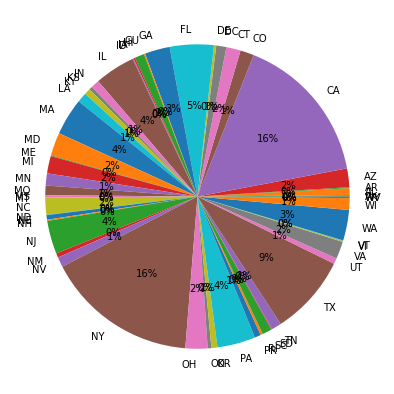

In [ ]:
# Creating plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.pie(list(ICE_dataset_df_state_wise_group['Cusip']), labels = ICE_dataset_df_state_wise_group.index,autopct='%1.0f%%')

# show plot
plt.show()

In [ ]:
# # check the above dataframe
# ESG_ICE_dataset_df.head()

Cusip   ISIN number  ... Muni Security Type Muni Conduit Obligor Name
0  45506DPV  US45506DPV19  ...            Revenue                       NaN
1  45506DPU  US45506DPU36  ...            Revenue                       NaN
2  45506DPT  US45506DPT62  ...            Revenue                       NaN
3  45506DPS  US45506DPS89  ...            Revenue                       NaN
4  416498BY  US416498BY89  ...            Revenue                       NaN

[5 rows x 47 columns]

In [ ]:
ESG_ICE_dataset_df_state_wise_group = ESG_ICE_dataset_df[ESG_ICE_dataset_df['As of Date'] == ESG_ICE_dataset_df['As of Date'][0]].groupby(['Muni State']).count() 
ESG_ICE_dataset_df_state_wise_group['Cusip'].sort_values(ascending = False) 

Muni State
CA    8
MA    6
OH    5
IN    4
IA    3
VA    2
NY    2
CT    2
TX    1
MI    1
IL    1
FL    1
AZ    1
Name: Cusip, dtype: int64

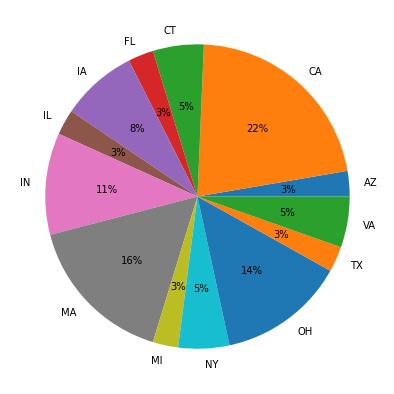

In [ ]:
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(list(ESG_ICE_dataset_df_state_wise_group['Cusip']), labels = ESG_ICE_dataset_df_state_wise_group.index,autopct='%1.0f%%') 

# show plot 
plt.show()

In [ ]:
# Total %Market Value check 
s1 = ICE_dataset_df.groupby(['As of Date'])['% Mkt Value'].sum()
s1.name = '% ICE Mkt Value'
s2 = ESG_ICE_dataset_df.groupby(['As of Date'])['% Mkt Value'].sum()
s2.name = '% ESG Mkt Value'

pd.concat([s1, s2], axis=1)

% ICE Mkt Value  % ESG Mkt Value
As of Date                                  
2015-06-30        100.00007          0.19540
2015-09-30         99.99969          0.28921
2015-12-31         99.99914          0.29911
2016-03-31         99.99975          0.41735
2016-06-30        100.00059          0.60116
2016-09-30        100.00067          0.66947
2016-12-31         99.99971          0.70900
2017-03-31        100.00002          0.78997
2017-06-30        100.00011          1.10051
2017-09-30        100.00005          1.23795
2017-12-31         99.99962          1.57791
2018-04-02        100.00004          1.59714
2018-06-30        100.00004          1.61124
2018-09-30         99.99954          1.67866
2018-12-31        100.00018          1.71279
2019-03-31        100.00021          1.87626
2019-06-30        100.00067          1.91468
2019-09-30        100.00016          2.04209
2019-12-31        100.00003          2.08615
2020-03-31        100.00101          2.14873
2020-06-30         99.99938          2.50673
2020-09-30         99.99979          2.77866
2020-12-31        100.00003          2.89346
2021-03-31        100.00005          2.99379
2021-06-30        100.00003          3.16096

In [ ]:
# Number of Securities check 

s1 = ICE_dataset_df.groupby(['As of Date'])['% Mkt Value'].count()
s1.name = 'ICE Securities Count'

s2 = ESG_ICE_dataset_df.groupby(['As of Date'])['% Mkt Value'].count()
s2.name = 'ESG Securities Count'

pd.concat([s1, s2], axis=1)

ICE Securities Count  ESG Securities Count
As of Date                                            
2015-06-30                 16781                    37
2015-09-30                 16702                    49
2015-12-31                 16797                    51
2016-03-31                 16901                    74
2016-06-30                 17120                   104
2016-09-30                 17083                   125
2016-12-31                 17469                   136
2017-03-31                 17550                   155
2017-06-30                 17519                   206
2017-09-30                 17303                   234
2017-12-31                 17929                   289
2018-04-02                 17928                   299
2018-06-30                 17983                   305
2018-09-30                 17891                   322
2018-12-31                 18015                   332
2019-03-31                 18012                   363
2019-06-30                 18184                   376
2019-09-30                 18214                   406
2019-12-31                 18671                   430
2020-03-31                 18681                   451
2020-06-30                 18829                   487
2020-09-30                 18919                   532
2020-12-31                 18989                   550
2021-03-31                 19093                   559
2021-06-30                 19114                   596

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


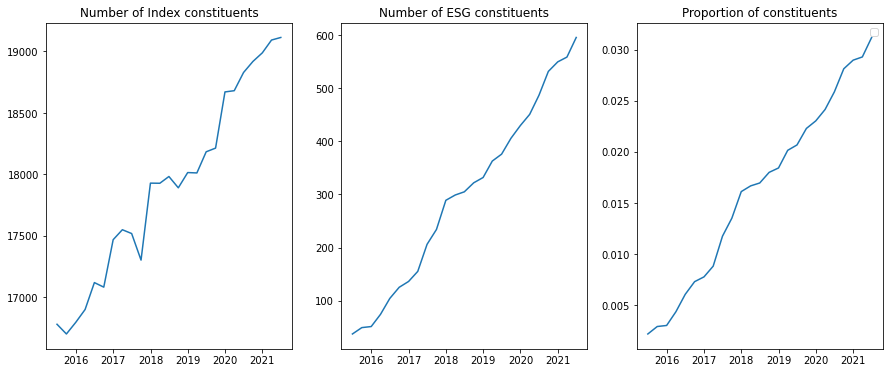

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1,figsize = (15, 6)) 
ax[0].plot(ICE_dataset_df.groupby(['As of Date']).count().index, ICE_dataset_df.groupby(['As of Date']).count()['Cusip']) 
ax[0].set_title('Number of Index constituents') 
plt.legend() 

ax[1].plot(ESG_ICE_dataset_df.groupby(['As of Date']).count().index, ESG_ICE_dataset_df.groupby(['As of Date']).count()['Cusip']) 
ax[1].set_title('Number of ESG constituents') 
plt.legend() 

ax[2].plot(ICE_dataset_df.groupby(['As of Date']).count().index, ESG_ICE_dataset_df.groupby(['As of Date']).count()['Cusip']/ICE_dataset_df.groupby(['As of Date']).count()['Cusip']) 
ax[2].set_title('Proportion of constituents') 

plt.legend() 
# Combine all the operations and display
plt.show() 

In [ ]:
ICE_dataset_df.sort_values(by = ['As of Date','Cusip'],ascending = True,inplace = True) 
ICE_dataset_df = ICE_dataset_df.reset_index(drop = True).copy() 

ESG_ICE_dataset_df.sort_values(by = ['As of Date','Cusip'],ascending = True,inplace = True) 
ESG_ICE_dataset_df = ESG_ICE_dataset_df.reset_index(drop = True).copy() 

In [ ]:
ICE_dataset_df.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

Features like Industry Level, Rating of Bonds, Par wtd Coupon, OAS, Asset Swap Spread, Effective Yield, Effective Duration, Convexity, AMT Status, Muni Insured

In [ ]:
## checking for Nan Return columns 
Date_unique = ICE_dataset_df['As of Date'].unique() 
ICE_dataset_df_grp_date = ICE_dataset_df.groupby(['As of Date']) 
count_wt = {}

count_nan = {}

for j,i in enumerate(Date_unique): 
  count_wt[i] = ICE_dataset_df_grp_date.get_group(i)[~ICE_dataset_df_grp_date.get_group(i)['Total Return % 3-mo_LOC'].isna()] 
  count_wt[i] = count_wt[i]['% Mkt Value'].sum() 
  
count_wt_series = pd.Series(count_wt,index = count_wt.keys()) 
count_wt_series 



2015-06-30    95.90819
2015-09-30    95.95672
2015-12-31    96.68762
2016-03-31    96.78360
2016-06-30    95.24973
2016-09-30    95.28394
2016-12-31    94.74705
2017-03-31    96.67997
2017-06-30    96.06853
2017-09-30    96.35158
2017-12-31    93.49427
2018-04-02    97.22214
2018-06-30    96.33884
2018-09-30    96.91234
2018-12-31    96.44131
2019-03-31    97.73482
2019-06-30    96.89172
2019-09-30    96.46955
2019-12-31    95.38054
2020-03-31    98.32532
2020-06-30    96.89693
2020-09-30    96.33712
2020-12-31    96.06437
2021-03-31    97.21871
2021-06-30    97.68407
dtype: float64

In [ ]:
ICE_dataset_df['As of Date'].unique()

array(['2015-06-30T00:00:00.000000000', '2015-09-30T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-03-31T00:00:00.000000000',
       '2016-06-30T00:00:00.000000000', '2016-09-30T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000', '2017-03-31T00:00:00.000000000',
       '2017-06-30T00:00:00.000000000', '2017-09-30T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-04-02T00:00:00.000000000',
       '2018-06-30T00:00:00.000000000', '2018-09-30T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000', '2019-03-31T00:00:00.000000000',
       '2019-06-30T00:00:00.000000000', '2019-09-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-06-30T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
count_nan = {} 
New_dataset = {} 
Date_unique = list(pd.to_datetime(Date_unique)) 
count_nan_wt = {}

ICE_dataset_df_final = pd.DataFrame()

for i,j in enumerate(Date_unique): 
  New_dataset[j] = ICE_dataset_df_grp_date.get_group(j) 
  New_dataset[j].reset_index(inplace = True, drop = True) 

  if(i==0):

#    New_dataset[j]['date_diff'] = 0 
    New_dataset[j]['% Mkt Value_3mon_prev'] = New_dataset[j]['% Mkt Value'].copy()
    
    New_dataset[j]['return'] = New_dataset[j]['Total Return % 3-mo_LOC']*New_dataset[j]['% Mkt Value'] 
    
    New_dataset[j]['% Mkt Value_3mon_prev_next'] = New_dataset[j]['% Mkt Value'].copy()  
    
    count_nan[i] = New_dataset[j]['return'].isna().sum()*100/len(New_dataset[j]['return'])
    ICE_dataset_df_final = pd.concat([ICE_dataset_df_final,New_dataset[j]],axis=0)

  else: 

#    New_dataset[j]['date_diff'] = Date_unique[i].dt.days - Date_unique[i-1].dt.days 
 
    New_dataset[j] = pd.merge(New_dataset[Date_unique[i]],New_dataset[Date_unique[i-1]][['% Mkt Value_3mon_prev_next','Cusip']], on = ['Cusip'], how='left') 
    New_dataset[j]['% Mkt Value_3mon_prev'] = New_dataset[j]['% Mkt Value_3mon_prev_next'].copy()
    # len_NaN = len(New_dataset[j][New_dataset[j][['% Mkt Value_3mon_prev','Total Return % 3-mo_LOC']].isnull().any(axis = 1)])
    # len_total = len(New_dataset[j])
    # prop_Nan = len_NaN*100/len_total
    New_dataset[j]['return'] = New_dataset[j]['Total Return % 3-mo_LOC']*New_dataset[j]['% Mkt Value_3mon_prev_next'] 
    New_dataset[j]['% Mkt Value_3mon_prev_next'] = New_dataset[j]['% Mkt Value'].copy() 
#    rows_with_NaN = df[row_has_NaN]

    count_nan[i] = New_dataset[j]['return'].isna().sum()*100/len(New_dataset[j]['return']) 
    count_nan_wt[i] = New_dataset[j]['% Mkt Value_3mon_prev_next'].isna().sum()*100/len(New_dataset[j]['% Mkt Value_3mon_prev_next']) 
    ICE_dataset_df_final = pd.concat([ICE_dataset_df_final,New_dataset[j]],axis = 0)
          
count_nan_df = pd.Series(count_nan,index = count_nan.keys()) 
count_nan_wt_df = pd.Series(count_nan_wt,index = count_nan_wt.keys()) 
count_nan_wt_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
dtype: float64

In [ ]:
ICE_dataset_df_final.to_csv('ICE_dataset_df_final.csv')

from google.colab import files
files.download('ICE_dataset_df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ESG_ICE_dataset_df_final.to_csv('ESG_ICE_dataset_df_final.csv')

files.download('ESG_ICE_dataset_df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.Series(CUSIP_list).to_csv('CUSIP_ESG_BBM.csv')
files.download('CUSIP_ESG_BBM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls

'CUSIP_ESG_BBM (1).csv'  'ICE_dataset_df_final (2) (1).csv'
 drive			  sample_data


In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving ICE_dataset_df_final (2) (1).csv to ICE_dataset_df_final (2) (1) (1).csv


In [ ]:
ICE_dataset_df_final = pd.read_csv('ICE_dataset_df_final (2) (1).csv') 
ESG_ICE_dataset_df_final = pd.read_csv('ESG_ICE_dataset_df_final (1).csv') 
CUSIP_list = pd.read_csv('CUSIP_ESG_BBM (1).csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
CUSIP_list.drop('Unnamed: 0', axis=1, inplace=True)
ESG_ICE_dataset_df_final.drop('Unnamed: 0', axis=1, inplace=True)
ICE_dataset_df_final.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
CUSIP_list = pd.Series(CUSIP_list['0'])

In [ ]:
ICE_dataset_df_final_grp = ICE_dataset_df_final.groupby(['As of Date']) 
ICE_dataset_df_final_return =ICE_dataset_df_final_grp['return'].sum()/ICE_dataset_df_final_grp['% Mkt Value_3mon_prev'].sum() 
ICE_dataset_df_final_return_cumsum = ICE_dataset_df_final_return.cumsum() 

In [ ]:
#CUSIP_list
ESG_ICE_dataset_df_final = ICE_dataset_df_final[ICE_dataset_df_final['Cusip'].isin(CUSIP_list)].reset_index(drop=True) 

ESG_ICE_dataset_df_final_grp = ESG_ICE_dataset_df_final.groupby(['As of Date'])

ESG_ICE_dataset_df_final_return = ESG_ICE_dataset_df_final_grp['return'].sum()/ESG_ICE_dataset_df_final_grp['% Mkt Value_3mon_prev'].sum()
ESG_ICE_dataset_df_final_return_cumsum = ESG_ICE_dataset_df_final_return.cumsum()

In [ ]:
type(ESG_ICE_dataset_df_final_return_cumsum)

pandas.core.series.Series

In [ ]:
count_nan,count_nan_wt 

NameError: ignored

In [ ]:
for j,i in enumerate(Date_unique): 
  count_wt[i] = ICE_dataset_df_grp_date.get_group(i)[~ICE_dataset_df_grp_date.get_group(i)['Total Return % 3-mo_LOC'].isna()] 
  count_wt[i] = count_wt[i]['% Mkt Value'].sum() 

In [ ]:
# from datetime import datetime 

# Dates = list(ICE_dataset.keys())[::-1] 
# Quarters = []
# Index_Dataset = {}
# Dates_comb = []

# for i,j in enumerae(Dates): 
  
#   if(i==0):
#     date = datetime.strptime(Dates[i], '%m%d%Y') 

#     Dates_comb = Dates[i]+'_' 
#     Index_Dataset[Dates[i]] = ICE_dataset[]
  
#   else:

#     date = datetime.strptime(Dates[i], '%m%d%Y') 
#     Dates_comb.append(Dates[i]+'_'+Dates[i-1]) 
#     Quarters.append(date) 
#     time_length = Quarters[-1].dt.days - Quarters[-2].dt.days
#     Dates[i][]
#     inner = pd.merge(ICE_dataset[Dates[i]],ICE_dataset[Dates[i-1]]['Cusip','% Mkt Value','Total Return Index Value _LOC'], on = ['Cusip'],how='inner') 
    
#     left = pd.merge(ICE_dataset[Dates[i]],ICE_dataset[Dates[i-1]]['Cusip','% Mkt Value','Total Return Index Value _LOC'], on = ['Cusip'],how='left')
#     left = left[~left.isin(inner['Cusip'])]
#     right = pd.merge(ICE_dataset[Dates[i]],ICE_dataset[Dates[i-1]]['Cusip','% Mkt Value','Total Return Index Value _LOC'], on = ['Cusip'],how='right')
#     right = right[~right.isin(inner['Cusip'])]
    
    
    
#     Index_Dataset[Dates_comb[-1]] = pd.concat([inner,left,right],axis = 0) 


In [ ]:
import matplotlib.pyplot as plt

def plot(data_Index, data_ESG,label = 'Index_',label_ESG = 'ESG_'):
  fig, ax = plt.subplots(1, 2, figsize=(20, 6))

  ax[0].plot(data_Index.index, data_Index) 
  ax[0].set_title(label+'Returns') 

  ax[1].plot(data_ESG.index, data_ESG) 
  ax[1].set_title(label_ESG + 'Returns') 

  plt.show()

plot(ICE_dataset_df_final_return,ESG_ICE_dataset_df_final_return)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))

plt.plot(ICE_dataset_df_final_return_cumsum.index, ICE_dataset_df_final_return_cumsum.values, label = 'Index Bond Returns')
plt.plot(ICE_dataset_df_final_return_cumsum.index, ESG_ICE_dataset_df_final_return_cumsum.values, label = 'Green Bond Returns')


plt.xlabel("Period")
plt.ylabel("% Returns")
plt.title("Index vs Green Bond Returns")

# Adding legend, which helps us recognize the curve according to it's color
plt.xticks(rotation = -30)
plt.legend()


# To load the display window
plt.show()

In [ ]:
len(ICE_dataset_df_final.columns) 

In [ ]:
ICE_dataset_df_final.groupby(['As of Date','Ticker'])['Muni State'].count() 

In [ ]:
ICE_dataset_df_final_date_unique = ICE_dataset_df_final['As of Date'].unique()
ICE_dataset_df_final_grp_ticker = ICE_dataset_df_final.groupby(['As of Date'])

ICE_dataset_df_final_unique_tickers = pd.Series(index=ICE_dataset_df_final_date_unique)

for i in ICE_dataset_df_final_date_unique:
  ICE_dataset_df_final_unique_tickers[i] = len(ICE_dataset_df_final_grp_ticker.get_group(i)['Ticker'].unique())

ICE_dataset_df_final_unique_tickers  

In [ ]:
ICE_dataset_df_final.groupby(['As of Date','Muni State'])['Ticker'].count()

In [ ]:
ICE_dataset_df_final_date_unique = ICE_dataset_df_final['As of Date'].unique() 
ICE_dataset_df_final_grp_ticker = ICE_dataset_df_final.groupby(['As of Date']) 

ICE_dataset_df_final_unique_state = pd.Series(index=ICE_dataset_df_final_date_unique) 

for i in ICE_dataset_df_final_date_unique:
  ICE_dataset_df_final_unique_state[i] = len(ICE_dataset_df_final_grp_ticker.get_group(i)['Muni State'].unique()) 

ICE_dataset_df_final_unique_state 

In [ ]:
ESG_ICE_dataset_df_final.groupby(['As of Date','Ticker'])['Muni State'].count() 

In [ ]:
ESG_ICE_dataset_df_final_date_unique = ESG_ICE_dataset_df_final['As of Date'].unique() 
ESG_ICE_dataset_df_final_grp_ticker = ESG_ICE_dataset_df_final.groupby(['As of Date']) 

ESG_ICE_dataset_df_final_unique_tickers = pd.Series(index = ESG_ICE_dataset_df_final_date_unique) 

for i in ESG_ICE_dataset_df_final_date_unique:
  ESG_ICE_dataset_df_final_unique_tickers[i] = len(ESG_ICE_dataset_df_final_grp_ticker.get_group(i)['Ticker'].unique()) 

ESG_ICE_dataset_df_final_unique_tickers 

In [ ]:
k = pd.concat( [ ICE_dataset_df_final_unique_tickers, ESG_ICE_dataset_df_final_unique_tickers ], axis = 1)
k.columns = ['All Issuers','Green Bond Issuers']
k
#, columns = 

In [ ]:
Percent_count = ESG_ICE_dataset_df_final.groupby(['As of Date']).count()['Cusip']*100/ICE_dataset_df_final.groupby(['As of Date']).count()['Cusip']
Percent_count.plot()

In [ ]:
Percent_tickers = ESG_ICE_dataset_df_final_unique_tickers*100/ICE_dataset_df_final_unique_tickers
Percent_tickers.plot()

In [ ]:
Percent_count.values

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,8)) 

color = 'tab:red' 
ax1.set_xlabel('Period') 
ax1.set_ylabel('Security Proportion', color = color) 
ax1.plot(Percent_tickers.index, Percent_count.values, color = color) 
ax1.tick_params(axis='y', labelcolor = color) 
ax1.tick_params(axis='x', rotation = -30) 
#fig.xticks(rotation = -30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis 

color = 'tab:blue' 
ax2.set_ylabel('Issuer Proportion', color = color)  # we already handled the x-label with ax1 
ax2.plot( Percent_tickers.index, Percent_tickers.values, color = color) 
ax2.tick_params(axis='y', labelcolor = color) 
ax2.tick_params(axis='x', rotation = -30) 
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show() 

In [ ]:
ICE_dataset_df_final.columns

In [ ]:
def rating_num(data):
  if(data['Rating'] in ['AAA']):
    return 1
  if(data['Rating'] in ['AA1','AA2','AA3']):
    return 2
  if(data['Rating'] in ['A3','A2','A1']):
    return 3
  if(data['Rating'] in ['BBB1', 'BBB2','BBB3', 'BB1']):
    return 4
  if(data['Rating'] in ['NR']):
    return 5

In [ ]:
#ICE_dataset_df_final['return_adj_wt'] = ICE_dataset_df_final['return']/ICE_dataset_df_final['% Mkt Value'] 
ICE_dataset_df_final['Mod. Dur to Worst (s.a.)_adj_wt'] = ICE_dataset_df_final['Mod. Dur to Worst (s.a.)']*ICE_dataset_df_final['% Mkt Value']/100 
ICE_dataset_df_final['Yield to Worst (s.a.)_adj_wt'] = ICE_dataset_df_final['Yield to Worst (s.a.)']*ICE_dataset_df_final['% Mkt Value']/100 
ICE_dataset_df_final['Rating_quan'] = ICE_dataset_df_final.apply(lambda x: rating_num(x),axis = 1) 
ICE_dataset_df_final['return_div_100'] = ICE_dataset_df_final['return']/100
ICE_dataset_df_final['Rating_quan_adj_wt'] = ICE_dataset_df_final['Rating_quan']*ICE_dataset_df_final['% Mkt Value']/100 

In [ ]:
ICE_datashow = ICE_dataset_df_final[['As of Date','Mod. Dur to Worst (s.a.)_adj_wt','Rating_quan_adj_wt','return_div_100','Yield to Worst (s.a.)_adj_wt']].groupby(['As of Date'])[['Mod. Dur to Worst (s.a.)_adj_wt','Rating_quan_adj_wt','return_div_100','Yield to Worst (s.a.)_adj_wt']].sum()
#ICE_datashow = ICE_datashow.resample('Y').mean()
def rating_inv(data):
  if(round(data['Rating_quan_adj_wt']) == 1):
    return 'AAA'
  if(round(data['Rating_quan_adj_wt']) == 2):
    return 'AA1-AA2-AA3'
  if(round(data['Rating_quan_adj_wt'])==3):
    return 'A1-A2-A3'
  if(round(data['Rating_quan_adj_wt'])==4):
    return 'BBB1-BBB2-BBB3-BB1'
  if(round(data['Rating_quan_adj_wt'])==5):
    return 'NR'

ICE_datashow['Rating_quan_adj_wt'] = ICE_datashow.apply(lambda x: rating_inv(x), axis = 1)

ICE_datashow

In [ ]:
#ICE_dataset_df_final['return_adj_wt'] = ICE_dataset_df_final['return']/ICE_dataset_df_final['% Mkt Value'] 
ESG_ICE_dataset_df_final['Mod. Dur to Worst (s.a.)_adj_wt'] = ESG_ICE_dataset_df_final['Mod. Dur to Worst (s.a.)']*ESG_ICE_dataset_df_final['% Mkt Value']
ESG_ICE_dataset_df_final['Yield to Worst (s.a.)_adj_wt'] = ESG_ICE_dataset_df_final['Yield to Worst (s.a.)']*ESG_ICE_dataset_df_final['% Mkt Value']
ESG_ICE_dataset_df_final['Rating_quan'] = ESG_ICE_dataset_df_final.apply(lambda x: rating_num(x),axis = 1) 
ESG_ICE_dataset_df_final['return_div_100'] = ESG_ICE_dataset_df_final['return']
ESG_ICE_dataset_df_final['Rating_quan_adj_wt'] = ESG_ICE_dataset_df_final['Rating_quan']*ESG_ICE_dataset_df_final['% Mkt Value']

In [ ]:
ESG_ICE_datashow = ESG_ICE_dataset_df_final[['As of Date','Mod. Dur to Worst (s.a.)_adj_wt','Rating_quan_adj_wt','return_div_100','Yield to Worst (s.a.)_adj_wt','% Mkt Value_3mon_prev','% Mkt Value']].groupby(['As of Date'])[['Mod. Dur to Worst (s.a.)_adj_wt','Rating_quan_adj_wt','return_div_100','Yield to Worst (s.a.)_adj_wt','% Mkt Value_3mon_prev','% Mkt Value']].sum() 
ESG_ICE_datashow['return_div_100_adj_wt'] = ESG_ICE_datashow['return_div_100']/ESG_ICE_datashow['% Mkt Value_3mon_prev'] 
ESG_ICE_datashow['Mod. Dur to Worst (s.a.)_adj_wt'] = ESG_ICE_datashow['Mod. Dur to Worst (s.a.)_adj_wt']/ESG_ICE_datashow['% Mkt Value'] 
ESG_ICE_datashow['Yield to Worst (s.a.)_adj_wt'] = ESG_ICE_datashow['Yield to Worst (s.a.)_adj_wt']/ESG_ICE_datashow['% Mkt Value'] 
ESG_ICE_datashow['Rating_quan_adj_wt'] = ESG_ICE_datashow['Rating_quan_adj_wt']/ESG_ICE_datashow['% Mkt Value']

ESG_ICE_datashow['Rating_quan_adj_wt'] = ESG_ICE_datashow.apply(lambda x: rating_inv(x), axis = 1)


ESG_ICE_datashow[['Mod. Dur to Worst (s.a.)_adj_wt','Rating_quan_adj_wt','return_div_100_adj_wt','Yield to Worst (s.a.)_adj_wt']]

In [ ]:
ESG_ICE_dataset_df_final.groupby(['As of Date','Muni State'])['Ticker'].count() 

In [ ]:
ICE_dataset_df_final['As of Date'].unique()

In [ ]:
def stacked_plots(data,label = 'Index',ind_lvl = 'Industry Lvl 3 Desc'):
  
  data_ind_l3_ret = data[['As of Date',ind_lvl,'% Mkt Value']].copy() 
  data_ind_l3_ret_grp = data_ind_l3_ret.groupby(['As of Date',ind_lvl]).sum() 
  data_ind_l3_ret_grp = data_ind_l3_ret_grp.reset_index( level = [0,1] ) 
  data_ind_l3_ret_grp_stacked = data_ind_l3_ret_grp.set_index(['As of Date', ind_lvl]).unstack([ind_lvl]) 
  data_ind_l3_ret_grp_stacked = data_ind_l3_ret_grp_stacked.reindex(columns = sorted(data_ind_l3_ret_grp_stacked.columns, key = lambda x: x[::-1])) 
  data_ind_l3_ret_grp_stacked.columns = data_ind_l3_ret_grp_stacked.columns.droplevel() 
  data_ind_l3_ret_grp_stacked.reset_index(inplace = True) 
  data_ind_l3_ret_grp_stacked.plot(x = 'As of Date', kind = 'bar', stacked = True, title = 'Stacked Bar '+ '_'+ label + ind_lvl)  
  ax1 = plt.axes()
  x_axis = ax1.axes.get_xaxis()
#  x_axis.set_visible(False)
  plt.show()
  return

stacked_plots(ICE_dataset_df_final,label = 'Index ',ind_lvl='Rating')

In [ ]:
stacked_plots(ICE_dataset_df_final, label = 'Index ', ind_lvl = 'Industry Lvl 2 Desc') 

In [ ]:
ICE_dataset_df_final.columns

In [ ]:
stacked_plots(ESG_ICE_dataset_df_final,label = 'ESG ',ind_lvl='Rating')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


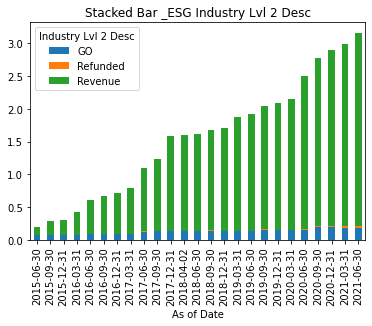

In [ ]:
stacked_plots(ESG_ICE_dataset_df_final,label = 'ESG ',ind_lvl = 'Industry Lvl 2 Desc')

In [ ]:
ESG_ICE_dataset_df_final_unique_state = pd.Series(index = ESG_ICE_dataset_df_final_date_unique)

for i in ESG_ICE_dataset_df_final_date_unique:
  ESG_ICE_dataset_df_final_unique_state[i] = len(ESG_ICE_dataset_df_final_grp_ticker.get_group(i)['Muni State'].unique())

ESG_ICE_dataset_df_final_unique_state  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


2015-06-30    13.0
2015-09-30    14.0
2015-12-31    15.0
2016-03-31    15.0
2016-06-30    16.0
2016-09-30    18.0
2016-12-31    18.0
2017-03-31    18.0
2017-06-30    18.0
2017-09-30    18.0
2017-12-31    18.0
2018-04-02    18.0
2018-06-30    18.0
2018-09-30    20.0
2018-12-31    20.0
2019-03-31    20.0
2019-06-30    20.0
2019-09-30    21.0
2019-12-31    21.0
2020-03-31    21.0
2020-06-30    23.0
2020-09-30    23.0
2020-12-31    24.0
2021-03-31    24.0
2021-06-30    25.0
dtype: float64

In [ ]:
ICE_dataset_df_final

Cusip   ISIN number  ... return_div_100 Rating_quan_adj_wt
0       00037CKT  US00037CKT61  ...       0.000002           0.000110
1       00037CPL  US00037CPL80  ...      -0.000145           0.000257
2       00037CPY  US00037CPY02  ...      -0.000059           0.000135
3       00037CQP  US00037CQP85  ...      -0.000048           0.000116
4       00037CRG  US00037CRG77  ...      -0.000042           0.000113
...          ...           ...  ...            ...                ...
447672  9881688N  US9881688N38  ...       0.000029           0.000085
447673  98816PBV  US98816PBV31  ...       0.000033           0.000055
447674  98816PBW  US98816PBW14  ...       0.000024           0.000037
447675  98816PCU  US98816PCU49  ...       0.000187           0.000082
447676  98816PCV  US98816PCV22  ...       0.000274           0.000120

[447677 rows x 55 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


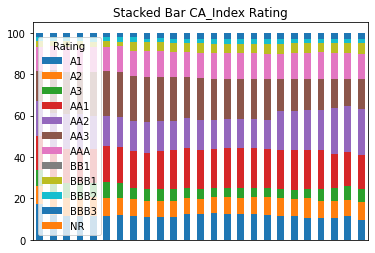

In [ ]:
def stacked_plots(data,label = 'Index',ind_lvl = 'Industry Lvl 3 Desc',val = 'CA'):
  
  data_ind_l3_ret = data[['As of Date',ind_lvl,'% Mkt Value']].copy() 
  data_ind_l3_ret_grp = data_ind_l3_ret.groupby(['As of Date',ind_lvl]).sum() 
  data_ind_l3_ret_grp = data_ind_l3_ret_grp.reset_index( level = [0,1] ) 
  data_ind_l3_ret_grp_stacked = data_ind_l3_ret_grp.set_index(['As of Date', ind_lvl]).unstack([ind_lvl]) 
  data_ind_l3_ret_grp_stacked = data_ind_l3_ret_grp_stacked.reindex(columns = sorted(data_ind_l3_ret_grp_stacked.columns, key = lambda x: x[::-1])) 
  data_ind_l3_ret_grp_stacked.columns = data_ind_l3_ret_grp_stacked.columns.droplevel() 
  data_ind_l3_ret_grp_stacked.reset_index(inplace = True) 
  data_ind_l3_ret_grp_stacked.plot(x = 'As of Date', kind = 'bar', stacked = True, title = 'Stacked Bar '+ val +'_'+ label + ind_lvl)  
  ax1 = plt.axes()
  x_axis = ax1.axes.get_xaxis()
  x_axis.set_visible(False)
  plt.show()
  return

stacked_plots(ICE_dataset_df_final,label = 'Index ',ind_lvl='Rating')


In [ ]:
ICE_dataset_df_final.columns 

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


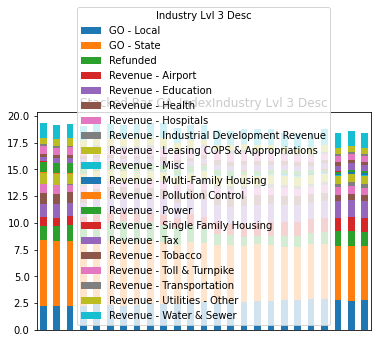

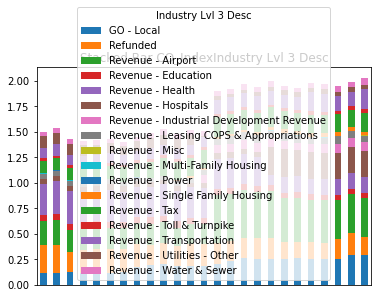

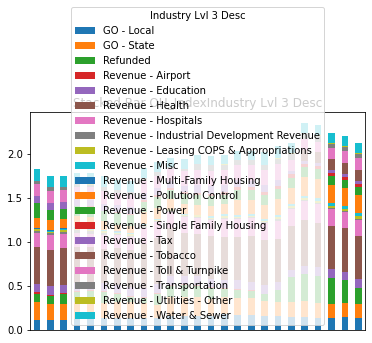

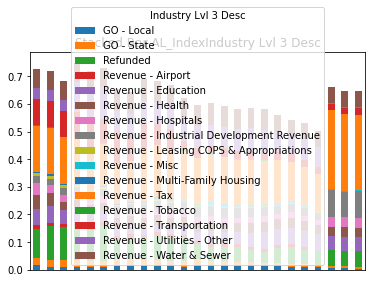

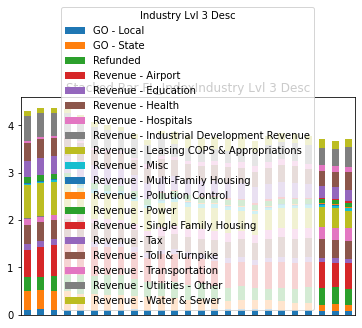

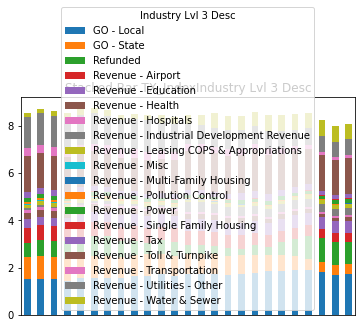

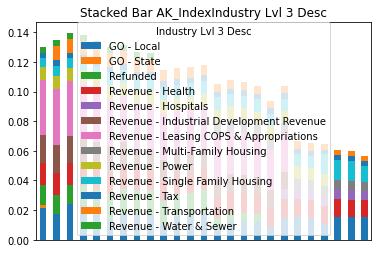

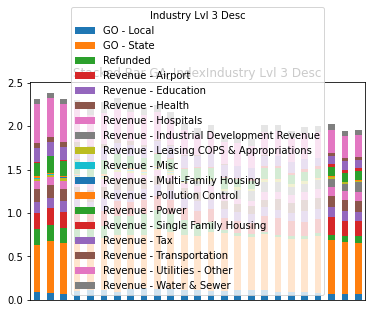

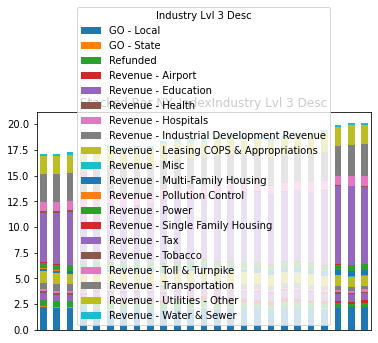

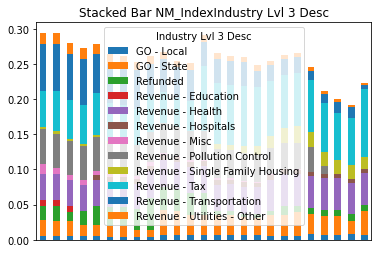

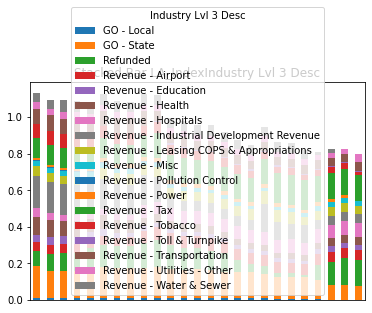

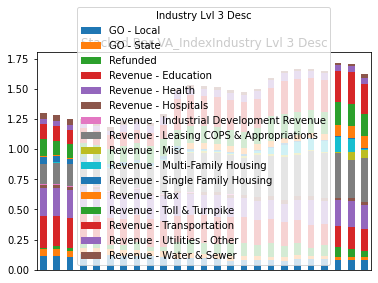

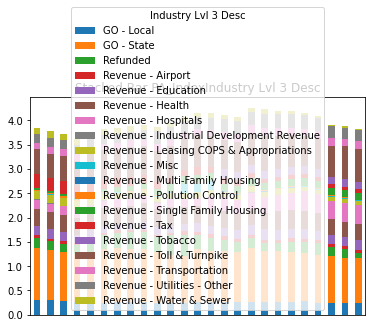

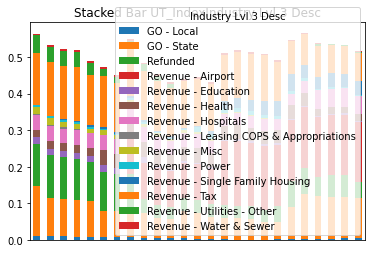

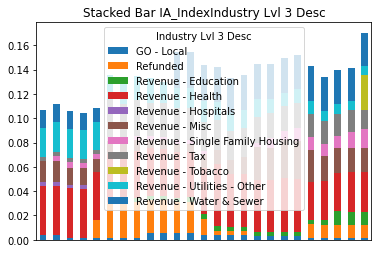

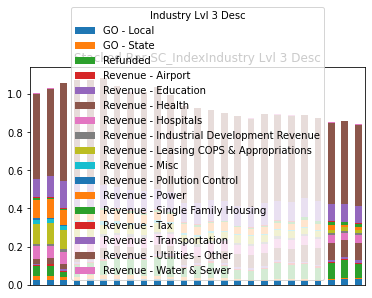

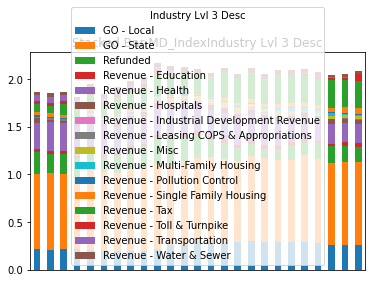

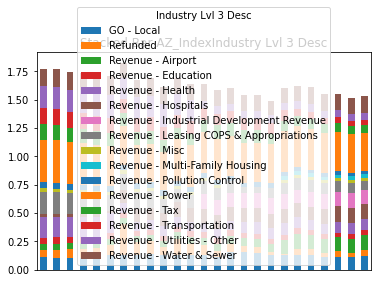

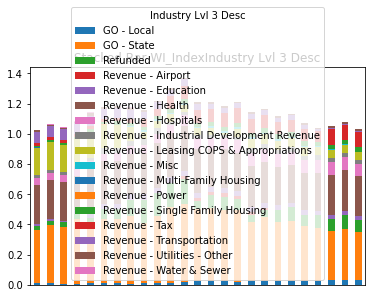

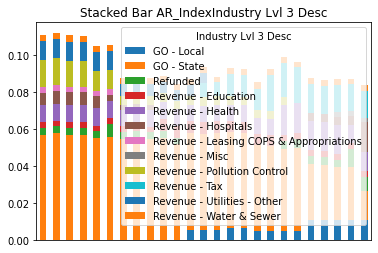

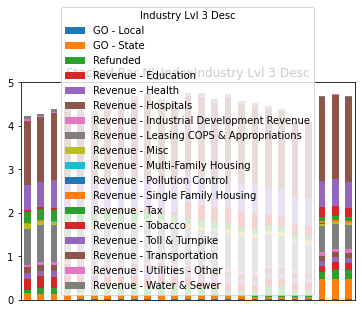

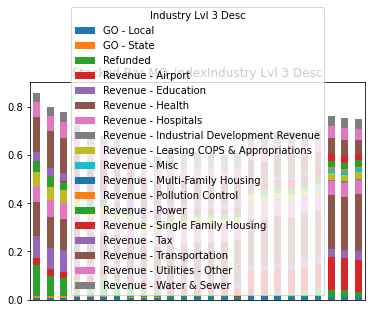

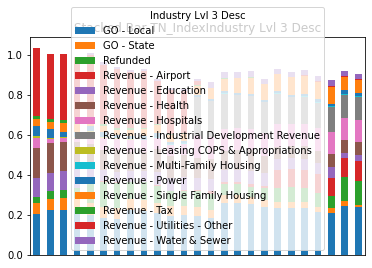

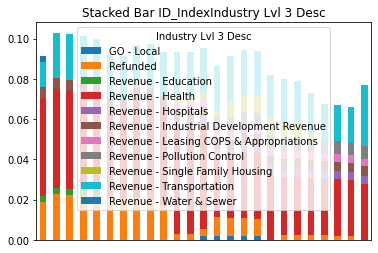

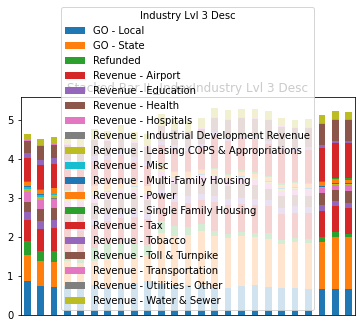

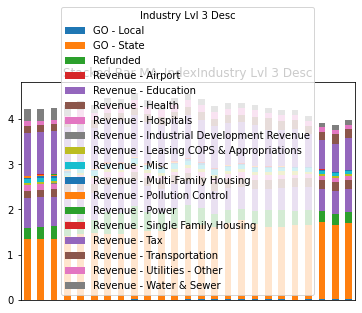

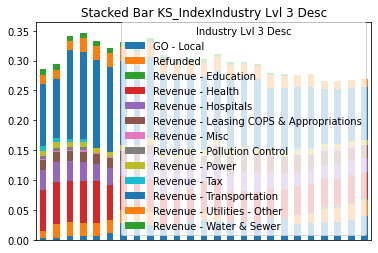

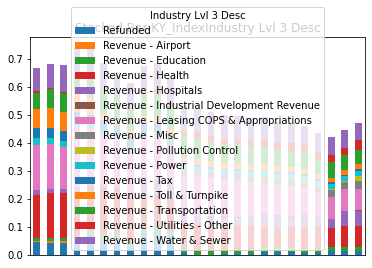

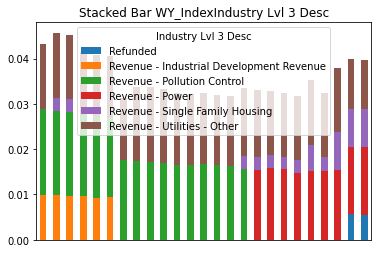

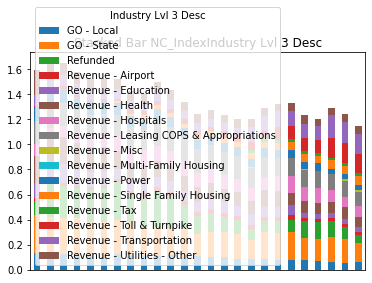

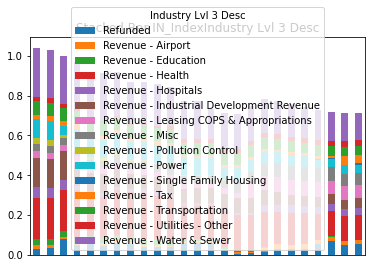

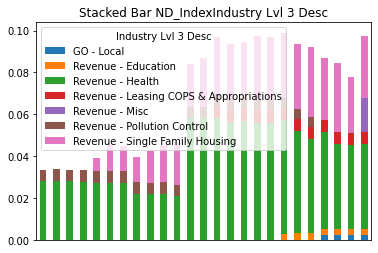

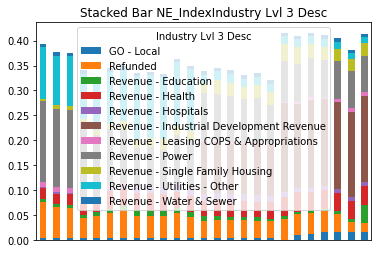

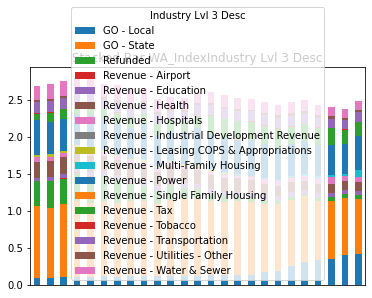

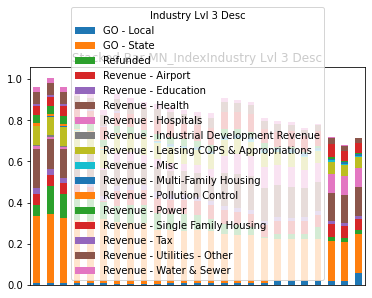

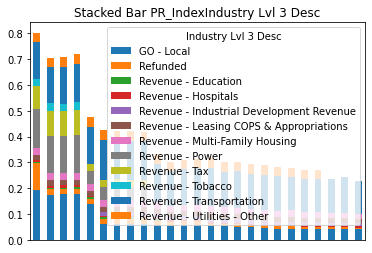

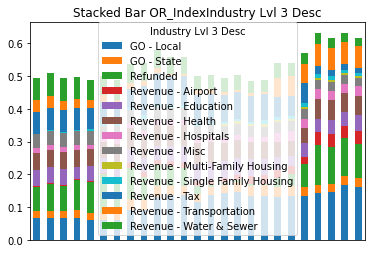

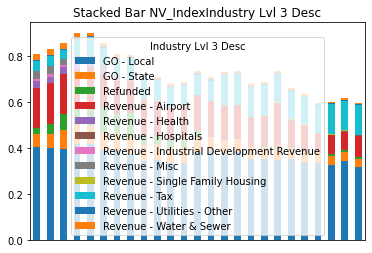

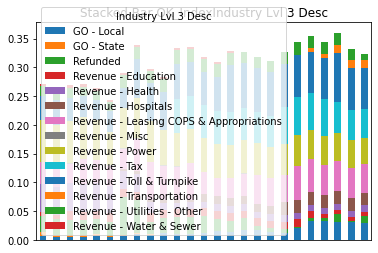

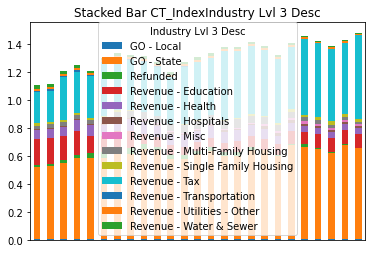

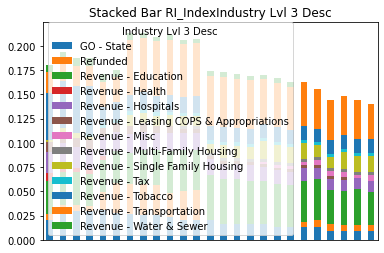

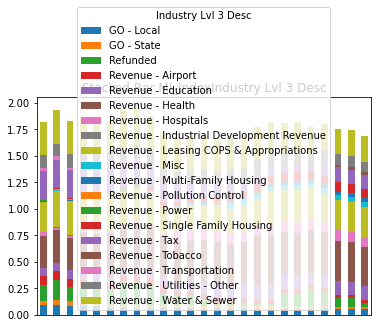

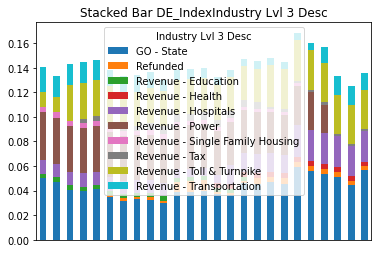

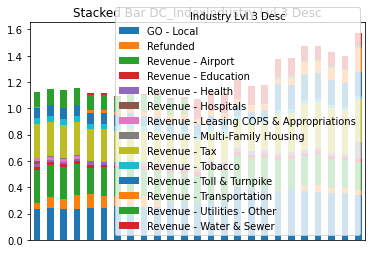

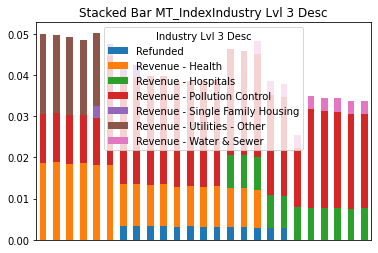

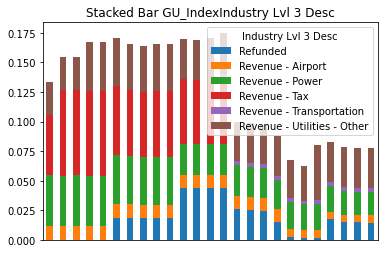

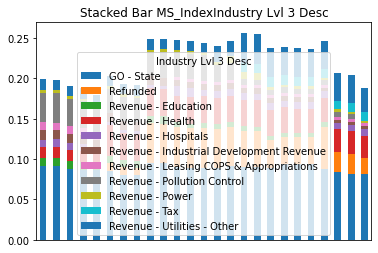

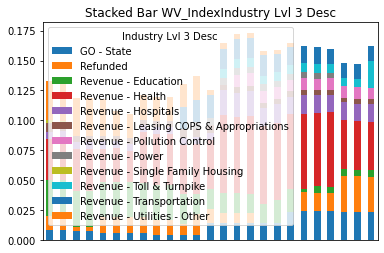

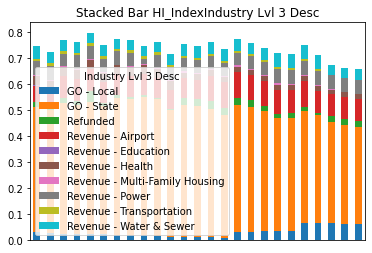

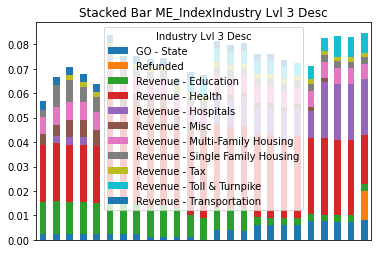

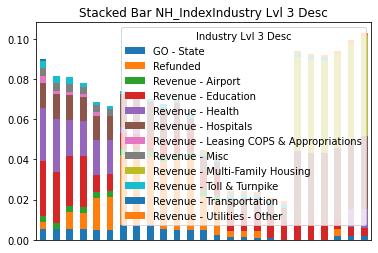

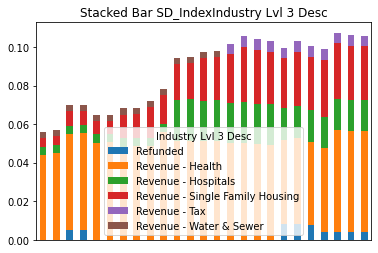

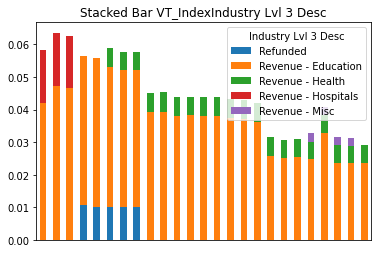

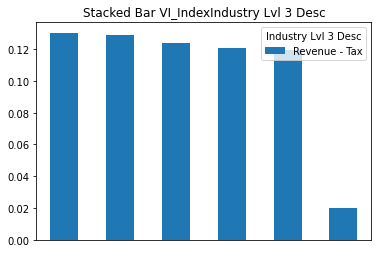

In [ ]:
ICE_dataset_df_final_state_unique = ICE_dataset_df_final['Muni State'].unique() 

for i,j in enumerate(ICE_dataset_df_final_state_unique):
  stacked_plots(ICE_dataset_df_final[ICE_dataset_df_final['Muni State'] == j ],ind_lvl = 'Industry Lvl 3 Desc',val = j) 

In [ ]:
ESG_ICE_dataset_df_final['Muni State'].unique()

array(['AZ', 'CA', 'IL', 'CT', 'FL', 'IN', 'IA', 'MA', 'TX', 'MI', 'NY',
       'OH', 'VA', 'WA', 'DC', 'MD', 'CO', 'VT', 'ND', 'WI', 'GA', 'MO',
       'NJ', 'NE', 'UT'], dtype=object)

In [ ]:
ESG_ICE_dataset_df_final_state_unique = ESG_ICE_dataset_df_final['Muni State'].unique() 

# for i in ESG_ICE_dataset_df_final_state_unique: 
#   stacked_plots(ESG_ICE_dataset_df_final[ESG_ICE_dataset_df_final['Muni State']==i], label = 'ESG', ind_lvl = 'Industry Lvl 3 Desc', val = i)  

In [ ]:
ICE_dataset_df_final.reset_index(inplace=True,drop=True)

In [ ]:
def get_returns(data):
  data_grp = data.groupby(['As of Date']) 
  returns = data_grp['return'].sum()/data_grp['% Mkt Value_3mon_prev'].sum() 
  cumsum_returns = returns.cumsum() 
  return returns, cumsum_returns

In [ ]:
ESG_ICE_dataset_df_final_state_grp = ESG_ICE_dataset_df_final.groupby(['Muni State'])
ESG_ICE_state_return = {}
ESG_ICE_state_cumsum_return = {}

for i in ESG_ICE_dataset_df_final_state_unique:
  ESG_ICE_state_return[i],ESG_ICE_state_cumsum_return[i] = get_returns(ESG_ICE_dataset_df_final_state_grp.get_group(i))

In [ ]:
pd.DataFrame(ESG_ICE_state_return).var() 

AZ    5.238800
CA    4.818393
IL    4.292610
CT    3.858873
FL    3.763816
IN    3.127536
IA    2.725901
MA    4.581077
TX    4.011224
MI    1.776793
NY    9.150268
OH    2.862561
VA    4.399322
WA    5.120858
DC    5.771083
MD    4.568492
CO    7.668971
VT    7.674430
ND    2.660243
WI    1.007980
GA    3.208451
MO    0.016422
NJ    4.081908
NE    0.002644
UT         NaN
dtype: float64

In [ ]:
ICE_dataset_df_final_state_grp = ICE_dataset_df_final.groupby(['Muni State']) 
ICE_state_return = {}
ICE_state_cumsum_return = {}

for i in ICE_dataset_df_final_state_unique:
  ICE_state_return[i],ICE_state_cumsum_return[i] = get_returns(ICE_dataset_df_final_state_grp.get_group(i))

In [ ]:
ICE_dataset_df_final['Muni State'].unique()

array(['CA', 'CO', 'OH', 'AL', 'FL', 'TX', 'AK', 'GA', 'NY', 'NM', 'LA',
       'VA', 'PA', 'UT', 'IA', 'SC', 'MD', 'AZ', 'WI', 'AR', 'NJ', 'MO',
       'TN', 'ID', 'IL', 'MA', 'KS', 'KY', 'WY', 'NC', 'IN', 'ND', 'NE',
       'WA', 'MN', 'PR', 'OR', 'NV', 'OK', 'CT', 'RI', 'MI', 'DE', 'DC',
       'MT', 'GU', 'MS', 'WV', 'HI', 'ME', 'NH', 'SD', 'VT', 'VI'],
      dtype=object)

In [ ]:
pd.DataFrame(ICE_state_return).var()

CA     2.415424
CO     2.883453
OH     2.224186
AL     3.177357
FL     1.989738
TX     2.313314
AK     0.882185
GA     1.969478
NY     2.242432
NM     0.993893
LA     1.869041
VA     1.766900
PA     2.078642
UT     2.213448
IA     1.657204
SC     3.084085
MD     1.544632
AZ     2.307268
WI     1.691644
AR     1.539230
NJ     4.918305
MO     2.054617
TN     2.060240
ID     1.420934
IL     4.204184
MA     2.234769
KS     1.882267
KY     1.930575
WY     1.710881
NC     1.356098
IN     1.935626
ND     1.895373
NE     3.055808
WA     1.767295
MN     1.283484
PR     5.149979
OR     1.780483
NV     1.311881
OK     1.241622
CT     2.006450
RI     1.567768
MI     1.857639
DE     1.558890
DC     2.144539
MT     1.294029
GU     8.160934
MS     1.984010
WV     2.312283
HI     2.074060
ME     4.167172
NH     2.434160
SD     3.201981
VT     1.749210
VI    24.369084
dtype: float64

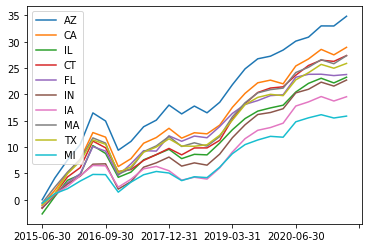

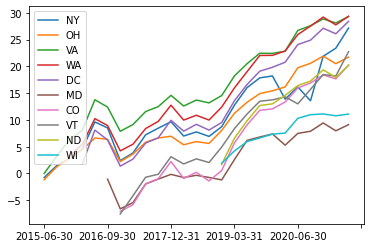

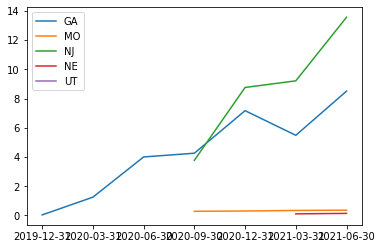

In [ ]:
for i in range(0,len(pd.DataFrame(ESG_ICE_state_cumsum_return).columns),10):
  pd.DataFrame(ESG_ICE_state_cumsum_return).iloc[:,i:i+10].plot()

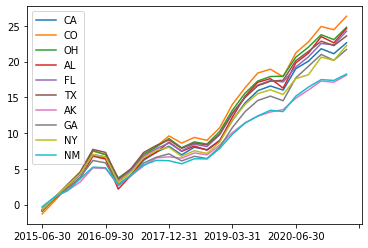

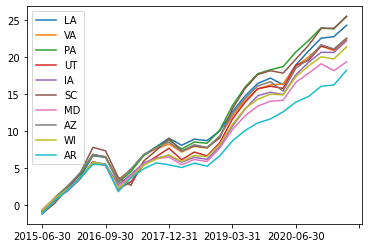

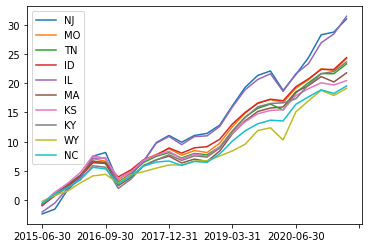

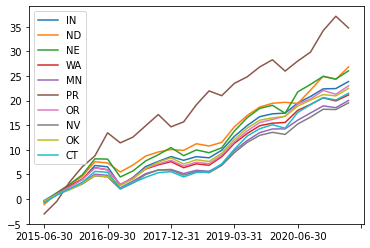

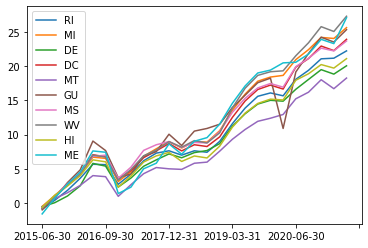

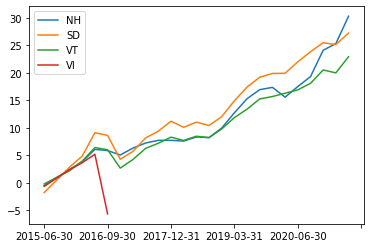

In [ ]:
#fig,axes = 
for i in range(0,len(pd.DataFrame(ICE_state_cumsum_return).columns),10): 
  pd.DataFrame(ICE_state_cumsum_return).iloc[:,i:i+10].plot() 

In [ ]:
ICE_dataset_df_final.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

# After Importing run from here

In [ ]:
ICE_dataset_df_final['ESG'] = 0 

In [ ]:
## 
#ICE_dataset_df_final['ESG'] = 0
ICE_dataset_df_final.loc[ICE_dataset_df_final[ICE_dataset_df_final['Cusip'].isin(CUSIP_list)].index,'ESG'] = np.ones(7468)

In [ ]:
ICE_dataset_df_final[['As of Date','Ticker','Muni State']].groupby(['As of Date','Ticker']).count() 

Muni State
As of Date Ticker            
2015-06-30 AAR              3
           ACASCD           1
           ADAPOL           1
           ADASCD           6
           AFAGEN          10
...                       ...
2021-06-30 WYSPWR           2
           YAMSCD           1
           YAVUTL           1
           YOSHGR           3
           YSLSCD           8

[38243 rows x 1 columns]

In [ ]:
ICE_dataset_df_final[['As of Date','Ticker','Muni State']].groupby(['As of Date','Ticker','Muni State'])['Muni State'].count()

As of Date  Ticker  Muni State
2015-06-30  AAR     MD            3
            ACASCD  CA            1
            ADAPOL  CO            1
            ADASCD  CA            2
                    CO            4
                                 ..
2021-06-30  WYSPWR  WY            2
            YAMSCD  OR            1
            YAVUTL  AZ            1
            YOSHGR  CA            3
            YSLSCD  TX            8
Name: Muni State, Length: 40100, dtype: int64

In [ ]:
ICE_dataset_df_final['% Mkt Value'].sum() 

2500.0005800000004

In [ ]:
sum(ICE_dataset_df_final['return']),sum(ICE_dataset_df_final['% Mkt Value']) 

(nan, 2500.000580001353)

In [ ]:
ICE_dataset_df_final_Issuer = ICE_dataset_df_final[['As of Date','Ticker','% Mkt Value','% Mkt Value_3mon_prev','return','ESG','Face Value_LOC']].groupby(['As of Date','Ticker']).agg(['sum','count']) 
ICE_dataset_df_final_Issuer.reset_index(level=[0,1],inplace = True) 
ICE_dataset_df_final_Issuer.columns = ['_'.join(col) for col in ICE_dataset_df_final_Issuer.columns] 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.set_index(['As of Date','Ticker']).unstack(['Ticker']) 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.reindex(columns=sorted(ICE_dataset_df_final_Issuer,key = lambda x: x[::-1])) 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.droplevel(1) 
ICE_dataset_df_final_Issuer['ESG_Ratio'] = ICE_dataset_df_final_Issuer['ESG_sum']/ICE_dataset_df_final_Issuer['ESG_count'] 
ICE_dataset_df_final_Issuer 
#ICE_dataset_df_final_Issuer.reset_index(inplace = True) 
#ICE_dataset_df_final_Issuer.head(20)

As of Date_ Ticker_  ...  Face Value_LOC_count  ESG_Ratio
0      2015-06-30     AAR  ...                     3        0.0
1      2015-06-30  ACASCD  ...                     1        0.0
2      2015-06-30  ADAPOL  ...                     1        0.0
3      2015-06-30  ADASCD  ...                     6        0.0
4      2015-06-30  AFAGEN  ...                    10        0.0
...           ...     ...  ...                   ...        ...
38238  2021-06-30  WYSPWR  ...                     2        0.0
38239  2021-06-30  YAMSCD  ...                     1        0.0
38240  2021-06-30  YAVUTL  ...                     1        0.0
38241  2021-06-30  YOSHGR  ...                     3        0.0
38242  2021-06-30  YSLSCD  ...                     8        0.0

[38243 rows x 13 columns]

In [ ]:
ESG_ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer[ICE_dataset_df_final_Issuer['ESG_sum']>0].copy()
len(ESG_ICE_dataset_df_final_Issuer)
ESG_ICE_dataset_df_final_Issuer.reset_index(inplace = True, drop = True)

In [ ]:
def ESG_Ratio_cuts(data):
  
  if(data['ESG_Ratio']>=0.8):
    return '1'
    
  if(0.8>data['ESG_Ratio']>=0.6):
    return '2'

  if(0.4<=data['ESG_Ratio']<0.6):
    return '3'

  if(0.2<=data['ESG_Ratio']<0.4):
    return '4'

  if(0<data['ESG_Ratio']<0.2):
    return '5'

  if(data['ESG_Ratio']==0):
    return 'N'

ICE_dataset_df_final_Issuer['ESG_Decile'] = ICE_dataset_df_final_Issuer.apply(lambda x: ESG_Ratio_cuts(x), axis = 1) 

In [ ]:
ICE_dataset_df_final_Issuer.to_csv('ICE_dataset_df_final_Issuer.csv')
files.download('ICE_dataset_df_final_Issuer.csv') 

NameError: ignored

In [ ]:
ICE_dataset_df_final_Issuer[ICE_dataset_df_final_Issuer['ESG_Decile'].isin(['1','2','3','4','5'])]['Ticker_'].unique() 

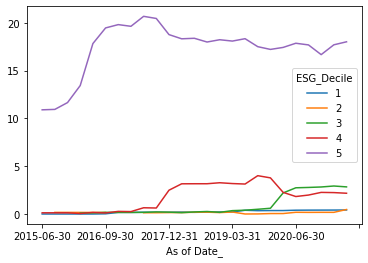

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile = ICE_dataset_df_final_Issuer[['As of Date_','ESG_Decile','% Mkt Value_sum']].groupby(['As of Date_','ESG_Decile']).sum() 
ICE_dataset_df_final_Issuer_grp_decile = ICE_dataset_df_final_Issuer_grp_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_Issuer_grp_decile_stacked = ICE_dataset_df_final_Issuer_grp_decile.set_index(['As of Date_','ESG_Decile']).unstack(['As of Date_']) 

ICE_dataset_df_final_Issuer_grp_decile_stacked = ICE_dataset_df_final_Issuer_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_Issuer_grp_decile_stacked.columns,key = lambda x: x[::-1])) 
ICE_dataset_df_final_Issuer_grp_decile_stacked.columns = ICE_dataset_df_final_Issuer_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_Issuer_grp_decile_stacked.T[['1','2','3','4','5']].plot() 

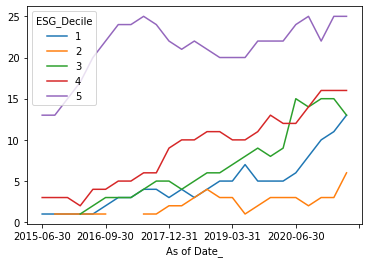

In [ ]:
ICE_dataset_df_final_Issuer_grp_cnt_decile = ICE_dataset_df_final_Issuer[['As of Date_','ESG_Decile','% Mkt Value_count']].groupby(['As of Date_','ESG_Decile']).count() 
ICE_dataset_df_final_Issuer_grp_cnt_decile = ICE_dataset_df_final_Issuer_grp_cnt_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked = ICE_dataset_df_final_Issuer_grp_cnt_decile.set_index(['As of Date_','ESG_Decile']).unstack(['As of Date_']) 

ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked = ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.columns,key = lambda x: x[::-1])) 
ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.columns = ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.T[['1','2','3','4','5']].plot() 

In [ ]:
def ESG_Ratio_cuts_upd(data,ESG_cuts):
  
  if(data['ESG_Ratio'] >= ESG_cuts[0.8]):
    return 1
    
  if(ESG_cuts[0.8] > data['ESG_Ratio'] >= ESG_cuts[0.6]):
    return 2

  if(ESG_cuts[0.4] <= data['ESG_Ratio'] < ESG_cuts[0.6]):
    return 3

  if(ESG_cuts[0.2]<=data['ESG_Ratio']<ESG_cuts[0.4]):
    return 4

  if(0<=data['ESG_Ratio']<ESG_cuts[0.2]):
    return 5

In [ ]:
dates_unique = ESG_ICE_dataset_df_final_Issuer['As of Date_'].unique() 
ESG_ICE_dataset_df_final_Issuer_group_date = ESG_ICE_dataset_df_final_Issuer.groupby(['As of Date_']) 
ESG_ICE_dataset_df_final_Issuer_df = pd.DataFrame() 

#ESG_ICE_dataset_df_final_Issuer_group_date = 
for i in dates_unique: 
  df = ESG_ICE_dataset_df_final_Issuer_group_date.get_group(i).copy()
  len(df)
  ESG_cuts = df['ESG_Ratio'].quantile([0.2, 0.4,0.6, 0.8,], interpolation = 'nearest') 
  df['ESG_Ratio_cut'] = df.apply(lambda x: ESG_Ratio_cuts_upd(x,ESG_cuts), axis = 1) 
  ESG_ICE_dataset_df_final_Issuer_df = pd.concat([ESG_ICE_dataset_df_final_Issuer_df,df], axis = 0) 

In [ ]:
dates_unique = ESG_ICE_dataset_df_final_Issuer['As of Date_'].unique() 
ESG_ICE_dataset_df_final_Issuer_group_date = ESG_ICE_dataset_df_final_Issuer.groupby(['As of Date_']) 
ESG_ICE_dataset_df_final_Issuer_df = pd.DataFrame() 

#ESG_ICE_dataset_df_final_Issuer_group_date = 
for i in dates_unique: 
  df = ESG_ICE_dataset_df_final_Issuer_group_date.get_group(i).copy() 
  ESG_cuts = df['ESG_Ratio'].quantile([0.2, 0.4,0.6, 0.8,], interpolation = 'nearest') 
  df['ESG_Ratio_cut'] = df.apply(lambda x: ESG_Ratio_cuts_upd(x,ESG_cuts), axis = 1) 
  ESG_ICE_dataset_df_final_Issuer_df = pd.concat([ESG_ICE_dataset_df_final_Issuer_df,df], axis = 0) 

ESG_ICE_dataset_df_final_Issuer_grp_decile = ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','ESG_Ratio_cut','% Mkt Value_sum']].groupby(['As of Date_','ESG_Ratio_cut']).sum() 
ESG_ICE_dataset_df_final_Issuer_grp_decile = ESG_ICE_dataset_df_final_Issuer_grp_decile.reset_index(level=[0,1]) 
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_decile.set_index(['As of Date_','ESG_Ratio_cut']).unstack(['As of Date_']) 

ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.reindex(columns = sorted(ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns = ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.T[['1','2','3','4','5']].plot() 

KeyError: ignored

In [ ]:
ICE_dataset_df_final_Issuer[['As of Date_','% Mkt Value_sum']].groupby(['As of Date_']).count()

% Mkt Value_sum
As of Date_                 
2015-06-30              1568
2015-09-30              1559
2015-12-31              1562
2016-03-31              1561
2016-06-30              1561
2016-09-30              1535
2016-12-31              1524
2017-03-31              1521
2017-06-30              1520
2017-09-30              1496
2017-12-31              1505
2018-04-02              1512
2018-06-30              1503
2018-09-30              1496
2018-12-31              1512
2019-03-31              1504
2019-06-30              1515
2019-09-30              1514
2019-12-31              1538
2020-03-31              1534
2020-06-30              1542
2020-09-30              1553
2020-12-31              1536
2021-03-31              1536
2021-06-30              1536

In [ ]:
ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','% Mkt Value_sum']].groupby(['As of Date_']).count()

% Mkt Value_sum
As of Date_                 
2015-06-30                17
2015-09-30                18
2015-12-31                20
2016-03-31                22
2016-06-30                28
2016-09-30                32
2016-12-31                35
2017-03-31                35
2017-06-30                40
2017-09-30                40
2017-12-31                41
2018-04-02                41
2018-06-30                43
2018-09-30                46
2018-12-31                45
2019-03-31                45
2019-06-30                46
2019-09-30                49
2019-12-31                51
2020-03-31                51
2020-06-30                60
2020-09-30                63
2020-12-31                66
2021-03-31                70
2021-06-30                73

In [ ]:
ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile = ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','ESG_Ratio_cut','% Mkt Value_count']].groupby(['As of Date_','ESG_Ratio_cut']).count() 
ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile = ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile.reset_index(level = [0,1] ) 
ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile.set_index(['As of Date_','ESG_Ratio_cut']).unstack(['As of Date_']) 

ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.reindex(columns = sorted(ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.columns, key = lambda x: x[::-1])) 
ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.columns = ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ESG_ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.T[['1','2','3','4','5']].plot() 

KeyError: ignored

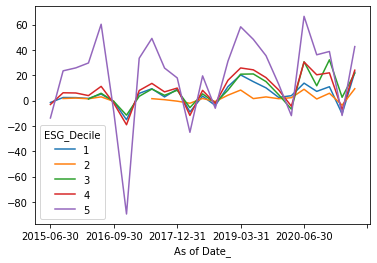

In [ ]:
ICE_dataset_df_final_Issuer['return_div_weight'] = ICE_dataset_df_final_Issuer['return_sum']/ICE_dataset_df_final_Issuer['% Mkt Value_3mon_prev_sum'] 

ICE_dataset_df_final_Issuer_grp_decile = ICE_dataset_df_final_Issuer[['As of Date_','ESG_Decile','return_div_weight']].groupby(['As of Date_','ESG_Decile']).sum() 
ICE_dataset_df_final_Issuer_grp_decile = ICE_dataset_df_final_Issuer_grp_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_Issuer_grp_decile_stacked = ICE_dataset_df_final_Issuer_grp_decile.set_index(['As of Date_','ESG_Decile']).unstack(['As of Date_']) 

ICE_dataset_df_final_Issuer_grp_decile_stacked = ICE_dataset_df_final_Issuer_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_Issuer_grp_decile_stacked.columns,key = lambda x: x[::-1])) 
ICE_dataset_df_final_Issuer_grp_decile_stacked.columns = ICE_dataset_df_final_Issuer_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_Issuer_grp_decile_stacked.T[['1','2','3','4','5']].plot() 

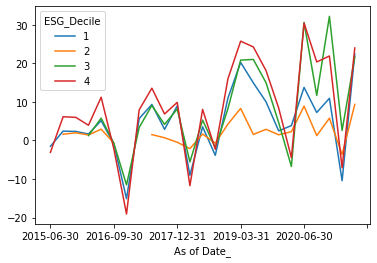

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked.T[['1','2','3','4']].plot()

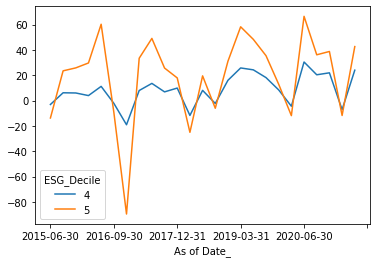

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked.T[['1','2','3','4']].plot() 
ICE_dataset_df_final_Issuer_grp_decile_stacked.T[['4','5']].plot() 

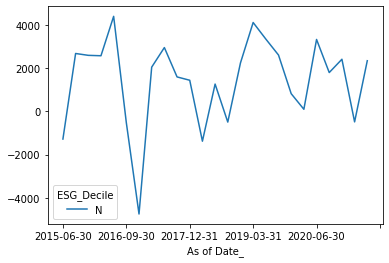

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked.T[['N']].plot()

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt = ICE_dataset_df_final_Issuer_grp_decile_stacked.T/ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.T

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked.T/ICE_dataset_df_final_Issuer_grp_cnt_decile_stacked.T

ESG_Decile          1         2         3         4         5         N
As of Date_                                                            
2015-06-30  -1.516000       NaN       NaN -1.026913 -1.056799 -0.823601
2015-09-30   2.426000  1.625925       NaN  2.052977  1.806407  1.740909
2015-12-31   2.349000  1.987107       NaN  2.001322  1.720987  1.684342
2016-03-31   1.684000  1.436775  1.262575  1.975881  1.746639  1.675014
2016-06-30   5.152000  2.933298  2.894560  2.803852  3.012892  2.871666
2016-09-30  -0.431500 -0.651611 -0.228085 -0.537896 -0.416025 -0.345231
2016-12-31  -5.031890       NaN -3.838281 -3.813660 -3.730505 -3.188023
2017-03-31   1.899540       NaN  1.124789  1.589216  1.392984  1.379978
2017-06-30   2.338517  1.522132  2.272885  2.260646  1.962838  1.998135
2017-09-30   0.721133  0.704958  0.834802  1.145972  1.070105  1.097534
2017-12-31   2.998152 -0.229313  1.632847  1.098404  0.812962  0.986205
2018-04-02  -2.250816 -1.054095 -1.388360 -1.171383 -1.192514 -0.936152
2018-06-30   1.185009  0.557227  1.060750  0.806452  0.886856  0.867727
2018-09-30  -0.962016 -0.173415 -0.314462 -0.207939 -0.287945 -0.339401
2018-12-31   2.205389  1.419733  1.380943  1.457117  1.555524  1.530771
2019-03-31   4.050137  2.771710  2.977460  2.576073  2.912010  2.821450
2019-06-30   2.136394  1.567879  2.627696  2.426599  2.416329  2.280541
2019-09-30   2.008332  1.447494  1.666871  1.649118  1.610683  1.781982
2019-12-31   0.497591  0.493975  0.579734  0.647332  0.585456  0.553181
2020-03-31   0.771810  0.757776 -0.749356 -0.370445 -0.539928  0.067640
2020-06-30   2.294899  2.973761  2.041005  2.537394  2.770865  2.248612
2020-09-30   0.907738  0.629255  0.834971  1.454786  1.445668  1.208433
2020-12-31   1.093817  1.927024  2.146651  1.369623  1.762187  1.643482
2021-03-31  -0.948345 -1.207321  0.173161 -0.444641 -0.470421 -0.329206
2021-06-30   1.727039  1.560376  1.664997  1.499147  1.704858  1.604558

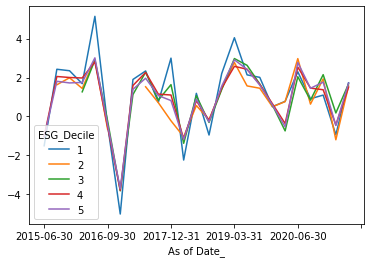

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt[['1','2','3','4','5']].plot() 

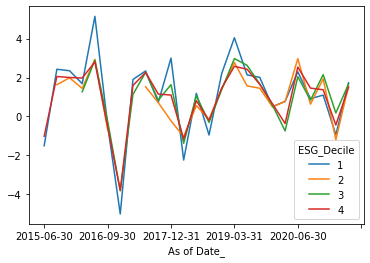

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt[['1','2','3','4']].plot()

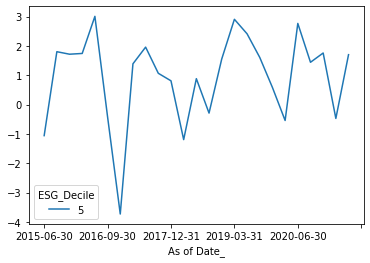

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt[['5']].plot() 

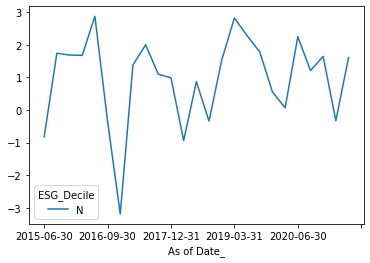

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt[['N']].plot() 

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt_cumsum = ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt.cumsum()
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt_cumsum

ESG_Decile           1          2          3          4          5          N
As of Date_                                                                  
2015-06-30   -1.516000        NaN        NaN  -1.026913  -1.056799  -0.823601
2015-09-30    0.910000   1.625925        NaN   1.026064   0.749609   0.917308
2015-12-31    3.259000   3.613032        NaN   3.027386   2.470596   2.601650
2016-03-31    4.943000   5.049807   1.262575   5.003267   4.217235   4.276664
2016-06-30   10.095000   7.983105   4.157135   7.807120   7.230127   7.148330
2016-09-30    9.663500   7.331495   3.929050   7.269224   6.814101   6.803099
2016-12-31    4.631610        NaN   0.090769   3.455563   3.083596   3.615076
2017-03-31    6.531150        NaN   1.215557   5.044779   4.476580   4.995054
2017-06-30    8.869667   8.853627   3.488442   7.305425   6.439418   6.993189
2017-09-30    9.590801   9.558584   4.323244   8.451397   7.509522   8.090723
2017-12-31   12.588953   9.329271   5.956091   9.549801   8.322485   9.076927
2018-04-02   10.338137   8.275176   4.567731   8.378418   7.129971   8.140776
2018-06-30   11.523146   8.832403   5.628481   9.184870   8.016827   9.008503
2018-09-30   10.561130   8.658987   5.314019   8.976931   7.728882   8.669103
2018-12-31   12.766519  10.078720   6.694962  10.434048   9.284406  10.199874
2019-03-31   16.816656  12.850430   9.672422  13.010121  12.196416  13.021325
2019-06-30   18.953050  14.418309  12.300118  15.436721  14.612745  15.301865
2019-09-30   20.961381  15.865803  13.966989  17.085839  16.223428  17.083848
2019-12-31   21.458972  16.359778  14.546723  17.733171  16.808884  17.637029
2020-03-31   22.230783  17.117555  13.797367  17.362726  16.268956  17.704669
2020-06-30   24.525682  20.091316  15.838372  19.900120  19.039821  19.953281
2020-09-30   25.433420  20.720572  16.673342  21.354906  20.485489  21.161714
2020-12-31   26.527237  22.647596  18.819993  22.724529  22.247677  22.805197
2021-03-31   25.578892  21.440275  18.993155  22.279888  21.777256  22.475991
2021-06-30   27.305931  23.000651  20.658151  23.779035  23.482114  24.080549

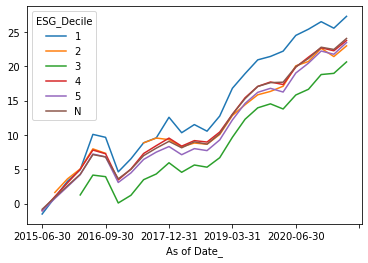

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt_cumsum[['1','2','3','4','5','N']].plot() 

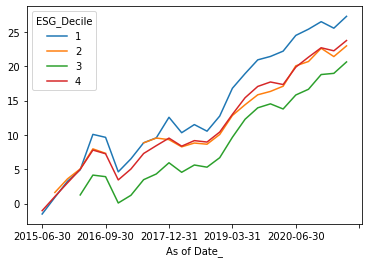

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt_cumsum[['1','2','3','4']].plot() 

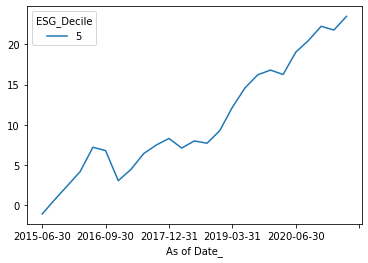

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt_cumsum[['5']].plot() 

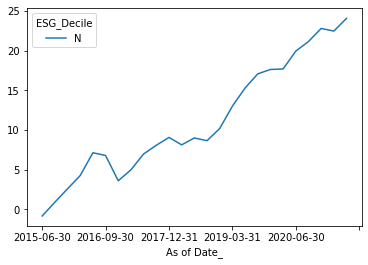

In [ ]:
ICE_dataset_df_final_Issuer_grp_decile_stacked_div_cnt_cumsum[['N']].plot() 

In [ ]:
ESG_ICE_dataset_df_final_Issuer_df.columns

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'ESG_sum', 'ESG_count',
       'Face Value_LOC_sum', 'Face Value_LOC_count', 'ESG_Ratio', 'ESG_Decile',
       'ESG_Ratio_cut'],
      dtype='object')

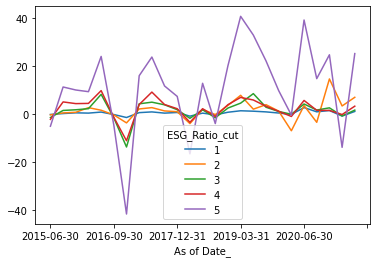

In [ ]:
dates_unique = ESG_ICE_dataset_df_final_Issuer['As of Date_'].unique() 
ESG_ICE_dataset_df_final_Issuer_group_date = ESG_ICE_dataset_df_final_Issuer.groupby(['As of Date_']) 
ESG_ICE_dataset_df_final_Issuer_df = pd.DataFrame() 

#ESG_ICE_dataset_df_final_Issuer_group_date = 
for i in dates_unique: 
  df = ESG_ICE_dataset_df_final_Issuer_group_date.get_group(i).copy() 
  ESG_cuts = df['ESG_Ratio'].quantile([0.2, 0.4,0.6, 0.8,], interpolation = 'nearest') 
  df['ESG_Ratio_cut'] = df.apply(lambda x: ESG_Ratio_cuts_upd(x,ESG_cuts), axis = 1) 
  ESG_ICE_dataset_df_final_Issuer_df = pd.concat([ESG_ICE_dataset_df_final_Issuer_df,df], axis = 0) 

ESG_ICE_dataset_df_final_Issuer_grp_decile = ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','ESG_Ratio_cut','% Mkt Value_sum']].groupby(['As of Date_','ESG_Ratio_cut']).sum() 
ESG_ICE_dataset_df_final_Issuer_grp_decile = ESG_ICE_dataset_df_final_Issuer_grp_decile.reset_index(level=[0,1]) 
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_decile.set_index(['As of Date_','ESG_Ratio_cut']).unstack(['As of Date_']) 

ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.reindex(columns = sorted(ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns = ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.T.plot() 

ESG_ICE_dataset_df_final_Issuer_df['return_div_weight'] = ESG_ICE_dataset_df_final_Issuer_df['return_sum']/ESG_ICE_dataset_df_final_Issuer_df['% Mkt Value_3mon_prev_sum']

ESG_ICE_dataset_df_final_Issuer_grp_decile = ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','ESG_Ratio_cut','return_sum']].groupby(['As of Date_','ESG_Ratio_cut']).sum() 
ESG_ICE_dataset_df_final_Issuer_grp_decile = ESG_ICE_dataset_df_final_Issuer_grp_decile.reset_index(level=[0,1]) 
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_decile.set_index(['As of Date_','ESG_Ratio_cut']).unstack(['As of Date_']) 

ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.reindex(columns = sorted(ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns = ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.T.plot() 

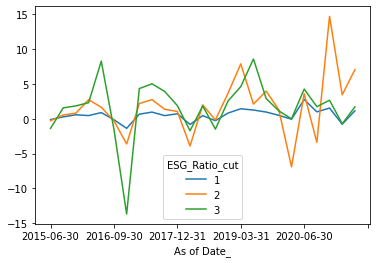

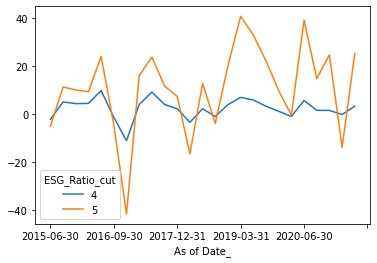

In [ ]:
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.T[[1,2,3]].plot() 
ESG_ICE_dataset_df_final_Issuer_grp_decile_stacked.T[[4,5]].plot() 

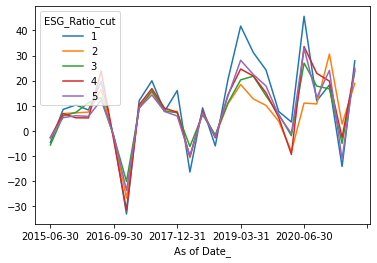

In [ ]:
ESG_ICE_dataset_df_final_Issuer_df['return_div_weight'] = ESG_ICE_dataset_df_final_Issuer_df['return_sum']/ESG_ICE_dataset_df_final_Issuer_df['% Mkt Value_3mon_prev_sum']

ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile = ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','ESG_Ratio_cut','return_div_weight']].groupby(['As of Date_','ESG_Ratio_cut']).sum() 
ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile = ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile.reset_index(level=[0,1]) 
ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile.set_index(['As of Date_','ESG_Ratio_cut']).unstack(['As of Date_']) 

ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked = ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked.reindex(columns = sorted(ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked.columns, key = lambda x: x[::-1])) 
ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked.columns = ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked.T.plot() 

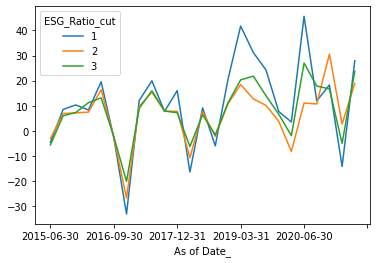

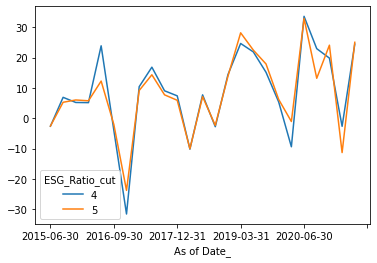

In [ ]:
ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked.T[[1,2,3]].plot() 
ESG_ICE_dataset_df_final_Issuer_grp_div_wgt_decile_stacked.T[[4,5]].plot() 

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'ESG_sum', 'ESG_count',
       'Face Value_LOC_sum', 'Face Value_LOC_count', 'ESG_Ratio', 'ESG_Decile',
       'ESG_Ratio_cut', 'return_div_weight'],
      dtype='object')

In [ ]:
# Creating a Transition Matrix
Transition_Tickers = ICE_dataset_df_final_Issuer[ICE_dataset_df_final_Issuer['ESG_Decile'].isin(['1','2','3','4','5'])]['Ticker_'].unique() 
ICE_dataset_df_final_Issuer_date_unique = pd.DataFrame(ICE_dataset_df_final_Issuer['As of Date_'].unique()) 

Transition_df = pd.DataFrame() 
Transition_df_1 = pd.DataFrame() 

for i in Transition_Tickers:
  Transition_df_1 = pd.concat([ICE_dataset_df_final_Issuer_date_unique,pd.Series([i]*len(ICE_dataset_df_final_Issuer_date_unique))],axis=1)
  Transition_df_1.columns = ['As of Date_', 'Ticker_']
  Transition_df = pd.concat([Transition_df,Transition_df_1],axis=0)

Transition_df.reset_index(inplace = True,drop = True)
# Transition_Tickers = pd.DataFrame(Transition_Tickers)
# ICE_dataset_df_final_Issuer_Transition = ICE_dataset_df_final_Issuer[['As of Date_','ESG_Decile','Ticker_']]
# ICE_dataset_df_final_Issuer_Transition = ICE_dataset_df_final_Issuer_Transition[ICE_dataset_df_final_Issuer_Transition['Ticker_'].isin(Transition_Tickers)]
# ICE_dataset_df_final_Issuer_Transition #

NameError: ignored

In [ ]:
Transition_df_decile = Transition_df.copy() 
Transition_df_decile = pd.merge(Transition_df_decile , ICE_dataset_df_final_Issuer[['As of Date_','ESG_Decile','Ticker_','ESG_count']], how = 'left' , on = ['As of Date_','Ticker_']) 
Transition_df_decile.columns 

Index(['As of Date_', 'Ticker_', 'ESG_Decile', 'ESG_count'], dtype='object')

In [ ]:
Transition_df_decile["ESG_Decile_temp"] = Transition_df_decile["ESG_Decile"] 
Transition_df_decile["ESG_Decile_temp"].fillna(999, inplace=True) 

In [ ]:
def convert_to_int(cell):
  if cell == "N":
    return 6
  else:
    return int(cell)

Transition_df_decile["ESG_Decile_temp"] = Transition_df_decile["ESG_Decile_temp"].apply(convert_to_int) 

In [ ]:
Transition_df_decile.columns 

Index(['As of Date_', 'Ticker_', 'ESG_Decile', 'ESG_count', 'ESG_Decile_temp'], dtype='object')

In [ ]:
Table_1 = Transition_df_decile.pivot_table(index="Ticker_", columns = "As of Date_", values="ESG_Decile_temp").reset_index( drop = False) 
Table_1.iloc[60:,:] 

As of Date_ Ticker_  2015-06-30  2015-09-30  ...  2020-12-31  2021-03-31  2021-06-30
60           SALPOL           6           6  ...           3           3           3
61           SDGSCD           6           6  ...           5           5           5
62           SDGTRN           6           6  ...           4           4           4
63           SDGWTR           6           6  ...           6           5           3
64           SEAPWR           6           6  ...           5           5           5
65           SFOCTF           6           6  ...           4           4           4
66           SFOTRN           6           6  ...           3           3           3
67           SFOUTL           6           6  ...           3           3           3
68           SFOWTR           6           6  ...           4           4           4
69           STNPWR           6           6  ...           4           4           4
70           SUNGEN         999         999  ...           1           1           1
71           TJPDEV         999         999  ...           1           1           1
72           TXSMFH         999         999  ...           3           3           4
73           UNIHGR           5           5  ...           5           5           5
74           UNVCTF         999         999  ...           1           1           1
75           VTSEDU           6           6  ...           3           3           3
76           WISENV         999         999  ...           1           1           1

[17 rows x 26 columns]

In [ ]:
Table_2 = Transition_df_decile.pivot_table(index = "Ticker_", columns = "As of Date_", values = "ESG_count").reset_index( drop = False)
Table_2.iloc[60:,:] 

As of Date_ Ticker_  2015-06-30  2015-09-30  ...  2020-12-31  2021-03-31  2021-06-30
60           SALPOL         1.0         1.0  ...         2.0         2.0         2.0
61           SDGSCD        44.0        43.0  ...        60.0        60.0        60.0
62           SDGTRN         9.0         9.0  ...        15.0        17.0        13.0
63           SDGWTR         6.0         8.0  ...        21.0        23.0        25.0
64           SEAPWR        21.0        21.0  ...        17.0        16.0        13.0
65           SFOCTF         2.0         2.0  ...         4.0         4.0         3.0
66           SFOTRN         8.0         6.0  ...        28.0        31.0        31.0
67           SFOUTL         2.0         2.0  ...         6.0         6.0         6.0
68           SFOWTR        36.0        36.0  ...        49.0        49.0        39.0
69           STNPWR        33.0        31.0  ...        14.0        14.0        14.0
70           SUNGEN         NaN         NaN  ...         2.0         2.0         2.0
71           TJPDEV         NaN         NaN  ...         3.0         3.0         3.0
72           TXSMFH         NaN         NaN  ...         2.0         2.0         4.0
73           UNIHGR        84.0        72.0  ...        95.0        95.0       106.0
74           UNVCTF         NaN         NaN  ...         2.0         2.0         2.0
75           VTSEDU         5.0         5.0  ...         5.0         5.0         5.0
76           WISENV         NaN         NaN  ...         3.0         3.0         2.0

[17 rows x 26 columns]

In [ ]:
ESG_ICE_dataset_df_final_Issuer_df.columns

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'ESG_sum', 'ESG_count',
       'Face Value_LOC_sum', 'Face Value_LOC_count', 'ESG_Ratio', 'ESG_Decile',
       'ESG_Ratio_cut', 'return_div_weight'],
      dtype='object')

In [ ]:
ESG_ICE_dataset_df_final_Issuer_df['ESG_Ratio_cut'] = ESG_ICE_dataset_df_final_Issuer_df['ESG_Ratio_cut'].astype(int) 
ESG_ICE_dataset_df_final_Issuer_df['ESG_Ratio_cut']

0       2
1       5
2       3
3       5
4       3
       ..
1072    3
1073    5
1074    1
1075    3
1076    1
Name: ESG_Ratio_cut, Length: 1077, dtype: int64

# Transition Matrix for ESG

In [ ]:
# Creating a Transition Matrix
Transition_Tickers = ESG_ICE_dataset_df_final_Issuer_df['Ticker_'].unique() 
ESG_ICE_dataset_df_final_Issuer_date_unique = pd.DataFrame(ESG_ICE_dataset_df_final_Issuer_df['As of Date_'].unique()) 

Transition_df = pd.DataFrame() 
Transition_df_1 = pd.DataFrame() 

for i in Transition_Tickers:
  Transition_df_1 = pd.concat([ESG_ICE_dataset_df_final_Issuer_date_unique,pd.Series([i]*len(ESG_ICE_dataset_df_final_Issuer_date_unique))],axis=1) 
  Transition_df_1.columns = ['As of Date_', 'Ticker_']
  Transition_df = pd.concat([Transition_df,Transition_df_1],axis=0)

Transition_df.reset_index(inplace = True,drop = True)

Transition_df_decile = Transition_df.copy() 
Transition_df_decile = pd.merge(Transition_df_decile , ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','ESG_Ratio_cut','Ticker_','ESG_count']], how = 'left' , on = ['As of Date_','Ticker_']) 
Transition_df_decile.columns 

Index(['As of Date_', 'Ticker_', 'ESG_Ratio_cut', 'ESG_count'], dtype='object')

In [ ]:
Table_1 = Transition_df_decile.pivot_table(index="Ticker_", columns = "As of Date_", values="ESG_Ratio_cut").reset_index( drop = False) 
Table_1.iloc[60:,:]

As of Date_ Ticker_  2015-06-30  2015-09-30  ...  2020-12-31  2021-03-31  2021-06-30
60           SALPOL         NaN         NaN  ...         2.0         2.0         2.0
61           SDGSCD         NaN         NaN  ...         5.0         5.0         5.0
62           SDGTRN         NaN         NaN  ...         3.0         3.0         3.0
63           SDGWTR         NaN         NaN  ...         NaN         4.0         2.0
64           SEAPWR         NaN         NaN  ...         4.0         4.0         4.0
65           SFOCTF         NaN         NaN  ...         3.0         3.0         3.0
66           SFOTRN         NaN         NaN  ...         2.0         2.0         2.0
67           SFOUTL         NaN         NaN  ...         2.0         2.0         2.0
68           SFOWTR         NaN         NaN  ...         4.0         3.0         3.0
69           STNPWR         NaN         NaN  ...         3.0         3.0         3.0
70           SUNGEN         NaN         NaN  ...         1.0         1.0         1.0
71           TJPDEV         NaN         NaN  ...         1.0         1.0         1.0
72           TXSMFH         NaN         NaN  ...         2.0         2.0         3.0
73           UNIHGR         4.0         4.0  ...         5.0         5.0         5.0
74           UNVCTF         NaN         NaN  ...         1.0         1.0         1.0
75           VTSEDU         NaN         NaN  ...         2.0         2.0         3.0
76           WISENV         NaN         NaN  ...         1.0         1.0         1.0

[17 rows x 26 columns]

# Dealing with ESG-Non ESG Bonds in ESG Issuers

In [ ]:
ESG_ICE_dataset_df_final_Issuer_df['Ticker_']

0       AZSHGR
1          CAS
2       CHIWTR
3       CTSGEN
4       EBYWTR
         ...  
1072    TXSMFH
1073    UNIHGR
1074    UNVCTF
1075    VTSEDU
1076    WISENV
Name: Ticker_, Length: 1077, dtype: object

In [ ]:
ESG_ICE_dataset_df_final_Issuer_df[['As of Date_','Ticker_']].drop_duplicates(subset=['As of Date_','Ticker_'])

As of Date_ Ticker_
0     2015-06-30  AZSHGR
1     2015-06-30     CAS
2     2015-06-30  CHIWTR
3     2015-06-30  CTSGEN
4     2015-06-30  EBYWTR
...          ...     ...
1072  2021-06-30  TXSMFH
1073  2021-06-30  UNIHGR
1074  2021-06-30  UNVCTF
1075  2021-06-30  VTSEDU
1076  2021-06-30  WISENV

[1077 rows x 2 columns]

In [ ]:
ESG_ICE_dataset_df_final_Issuer

As of Date_ Ticker_  ...  Face Value_LOC_count  ESG_Ratio
0     2015-06-30  AZSHGR  ...                     7   0.142857
1     2015-06-30     CAS  ...                   596   0.006711
2     2015-06-30  CHIWTR  ...                    38   0.026316
3     2015-06-30  CTSGEN  ...                    67   0.014925
4     2015-06-30  EBYWTR  ...                    35   0.028571
...          ...     ...  ...                   ...        ...
1072  2021-06-30  TXSMFH  ...                     4   0.250000
1073  2021-06-30  UNIHGR  ...                   106   0.047170
1074  2021-06-30  UNVCTF  ...                     2   1.000000
1075  2021-06-30  VTSEDU  ...                     5   0.400000
1076  2021-06-30  WISENV  ...                     2   1.000000

[1077 rows x 13 columns]

In [ ]:
ICE_dataset_df_final['% Mkt Value'].sum()

2500.0005800000004

In [ ]:
ESG_Issuers = ESG_ICE_dataset_df_final[['As of Date','Ticker']].drop_duplicates(subset=['As of Date','Ticker']) 
ICE_dataset_df_final_ESG_Issuers = pd.merge(ICE_dataset_df_final, ESG_Issuers, left_on = ['As of Date','Ticker'], right_on = ['As of Date','Ticker'], how = 'inner') 

#ICE_dataset_df_final_ESG_Issuers = ICE_dataset_df_final_ESG_Issuers[ICE_dataset_df_final_ESG_Issuers['ESG']>0].copy() 
ICE_dataset_df_final_ESG_Issuers.reset_index(inplace = True, drop = True) 
print(len(ICE_dataset_df_final),len(ICE_dataset_df_final_ESG_Issuers)) 

447677 82788


In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
#ICE_dataset_df_final_ESG_Issuers['return'] = ICE_dataset_df_final_ESG_Issuers['return']/ICE_dataset_df_final_ESG_Issuers['% Mkt Value_3mon_prev'] 
#ICE_dataset_df_final_ESG_Issuers = ICE_dataset_df_final.copy() 
ICE_dataset_df_final_ESG_Issuers['Excess_return'] = ICE_dataset_df_final_ESG_Issuers['Excess Return % MTD']*(1+ ICE_dataset_df_final_ESG_Issuers['Total Return % 3-mo_LOC']/100)*ICE_dataset_df_final_ESG_Issuers['% Mkt Value_3mon_prev'] 

ICE_dataset_df_final_ESG_Issuers['Non-ESG'] = 0 
index = ICE_dataset_df_final_ESG_Issuers[ICE_dataset_df_final_ESG_Issuers['ESG'] == 0].index 
ICE_dataset_df_final_ESG_Issuers.loc[index,'Non-ESG'] = np.ones(len(index)) 

ICE_dataset_df_final_ESG_Issuers['% Mkt Value_ESG'] = ICE_dataset_df_final_ESG_Issuers['ESG']*ICE_dataset_df_final_ESG_Issuers['% Mkt Value'] 
ICE_dataset_df_final_ESG_Issuers['% Mkt Value_3mon_prev_ESG'] = ICE_dataset_df_final_ESG_Issuers['ESG']*ICE_dataset_df_final_ESG_Issuers['% Mkt Value_3mon_prev'] 
ICE_dataset_df_final_ESG_Issuers['return_ESG'] = ICE_dataset_df_final_ESG_Issuers['ESG']*ICE_dataset_df_final_ESG_Issuers['return'] 
ICE_dataset_df_final_ESG_Issuers['Face Value_LOC_ESG'] = ICE_dataset_df_final_ESG_Issuers['ESG']*ICE_dataset_df_final_ESG_Issuers['Face Value_LOC'] 
ICE_dataset_df_final_ESG_Issuers['Excess_return_ESG'] = ICE_dataset_df_final_ESG_Issuers['ESG']*ICE_dataset_df_final_ESG_Issuers['Excess_return'] 


#['% Mkt Value_ESG','% Mkt Value_3mon_prev_ESG','return_ESG','Face Value_LOC_ESG','% Mkt Value_Non-ESG','% Mkt Value_3mon_prev_Non-ESG','return_Non-ESG','Face Value_LOC_Non-ESG'] 

ICE_dataset_df_final_ESG_Issuers['% Mkt Value_Non-ESG'] = ICE_dataset_df_final_ESG_Issuers['Non-ESG']*ICE_dataset_df_final_ESG_Issuers['% Mkt Value'] 
ICE_dataset_df_final_ESG_Issuers['% Mkt Value_3mon_prev_Non-ESG'] = ICE_dataset_df_final_ESG_Issuers['Non-ESG']*ICE_dataset_df_final_ESG_Issuers['% Mkt Value_3mon_prev'] 
ICE_dataset_df_final_ESG_Issuers['return_Non-ESG'] = ICE_dataset_df_final_ESG_Issuers['Non-ESG']*ICE_dataset_df_final_ESG_Issuers['return'] 
ICE_dataset_df_final_ESG_Issuers['Excess_return_Non-ESG'] = ICE_dataset_df_final_ESG_Issuers['Non-ESG']*ICE_dataset_df_final_ESG_Issuers['Excess_return'] 

ICE_dataset_df_final_ESG_Issuers['Face Value_LOC_Non-ESG'] = ICE_dataset_df_final_ESG_Issuers['Non-ESG']*ICE_dataset_df_final_ESG_Issuers['Face Value_LOC'] 

#ICE_dataset_df_final[['As of Date','Ticker','% Mkt Value','% Mkt Value_3mon_prev','return','ESG','Face Value_LOC']].groupby(['As of Date','Ticker']).agg(['sum','count']) 


In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd = ICE_dataset_df_final_ESG_Issuers[['As of Date','Ticker','% Mkt Value','% Mkt Value_3mon_prev','return','Excess_return','ESG','Face Value_LOC','Non-ESG','% Mkt Value_ESG','% Mkt Value_3mon_prev_ESG','return_ESG','Excess_return_ESG','Face Value_LOC_ESG','% Mkt Value_Non-ESG','% Mkt Value_3mon_prev_Non-ESG','return_Non-ESG','Excess_return_Non-ESG','Face Value_LOC_Non-ESG']].groupby(['As of Date','Ticker']).agg(['sum','count']) 
ICE_dataset_df_final_ESG_Issuer_upd.reset_index(level = [0,1], inplace = True) 
ICE_dataset_df_final_ESG_Issuer_upd.columns = ['_'.join(col) for col in ICE_dataset_df_final_ESG_Issuer_upd.columns] 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.set_index(['As of Date','Ticker']).unstack(['Ticker']) 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.reindex(columns=sorted(ICE_dataset_df_final_Issuer,key = lambda x: x[::-1])) 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.droplevel(1) 
ICE_dataset_df_final_ESG_Issuer_upd['ESG_Ratio'] = ICE_dataset_df_final_ESG_Issuer_upd['ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd['ESG_count'] 
ICE_dataset_df_final_ESG_Issuer_upd['ESG_Ratio_Face_Value'] = ICE_dataset_df_final_ESG_Issuer_upd['Face Value_LOC_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd['Face Value_LOC_sum'] 
len(ICE_dataset_df_final_ESG_Issuer_upd)

1077

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd['ESG_Ratio_Face_Value']

0      0.156
1      0.006
2      0.054
3      0.013
4      0.021
        ... 
1072   0.229
1073   0.047
1074   1.000
1075   0.325
1076   1.000
Name: ESG_Ratio_Face_Value, Length: 1077, dtype: float64

In [ ]:
ICE_dataset_df_final_ESG_Issuer_residual_returns = ICE_dataset_df_final_ESG_Issuers[['As of Date','% Mkt Value_3mon_prev','return','Excess_return','% Mkt Value_3mon_prev_ESG','return_ESG',
                                                                                     'Excess_return_ESG','Face Value_LOC_ESG','% Mkt Value_3mon_prev_Non-ESG',
                                                                                     'return_Non-ESG','Excess_return_Non-ESG']].groupby(['As of Date']).agg(['sum'])

In [ ]:
y = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return_ESG']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev_ESG'] 
y1 = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return_Non-ESG']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev_Non-ESG'] 
X = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev'] 
index = y.dropna().index 
y = y.loc[index] 
X = X.loc[index] 
# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 
X = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev'] 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary()) 


NameError: ignored

In [ ]:
k = (model.params['const'],model.params['sum'])
print(k)
#k.plot() 

(0.11188976260292723, 1.429388247965743)


In [ ]:
X = sm.add_constant(X)
# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     967.7
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.68e-20
Time:                        16:55:17   Log-Likelihood:                -3.0368
No. Observations:                  25   AIC:                             10.07
Df Residuals:                      23   BIC:                             12.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1119      0.057      1.964      0.0

In [ ]:
X = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev'] 

# Note the difference in argument order 
model = sm.OLS(y1, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    sum   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.717e+05
Date:                Thu, 21 Oct 2021   Prob (F-statistic):                    8.30e-57
Time:                        22:13:30   Log-Likelihood:                          90.256
No. Observations:                  25   AIC:                                     -178.5
Df Residuals:                      24   BIC:                                     -177.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As of Date
2015-06-30    0.00414563450418137247
2015-09-30   -0.00102564907091871882
2015-12-31    0.00384538752460739097
2016-03-31    0.00043791854087421589
2016-06-30   -0.00153171884448322082
2016-09-30   -0.00137492967077323947
2016-12-31   -0.00134431157019077041
2017-03-31    0.00137573128335727324
2017-06-30    0.00020729494909762364
2017-09-30    0.00265080283170621156
2017-12-31   -0.00190882802799474671
2018-04-02   -0.00011303593069813406
2018-06-30    0.00468941213069285628
2018-09-30    0.00004615790074320725
2018-12-31   -0.00298390884879651264
2019-03-31   -0.00310473961240802579
2019-06-30    0.00052183288121593341
2019-09-30    0.00193946820176432722
2019-12-31    0.00237529362251298615
2020-03-31   -0.00479266894081309403
2020-06-30   -0.01004512351405228987
2020-09-30    0.02129795190145397643
2020-12-31   -0.01888365358725307974
2021-03-31   -0.00561905926576033998
2021-06-30   -0.00171056721913248611
dtype: float64


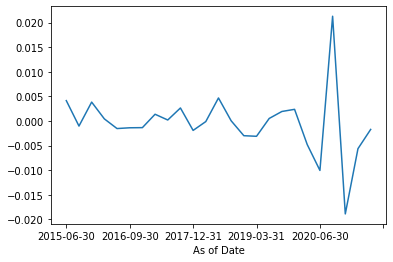

In [ ]:
k = model.resid
print(k)
k.plot() 

In [ ]:
model = sm.OLS(y1, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.353e+05
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           1.62e-54
Time:                        22:11:49   Log-Likelihood:                 90.312
No. Observations:                  25   AIC:                            -176.6
Df Residuals:                      23   BIC:                            -174.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.320      0.7

In [ ]:
# Checking for Excess Returns

In [ ]:
y = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return_ESG']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev_ESG'] 
y1 = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return_Non-ESG']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev_Non-ESG'] 
X = ICE_dataset_df_final_ESG_Issuer_residual_returns['Excess_return']/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev'] 
index = y.dropna().index 
y = y.loc[index] 
X = X.loc[index] 
# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                    sum   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              864.4
Date:                Thu, 21 Oct 2021   Prob (F-statistic):                    2.46e-20
Time:                        21:57:05   Log-Likelihood:                         -4.9747
No. Observations:                  25   AIC:                                      11.95
Df Residuals:                      24   BIC:                                      13.17
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As of Date
2015-06-30   -0.23423610832151942063
2015-09-30    0.10846153234667209320
2015-12-31    0.37709564895543601359
2016-03-31    0.44754151820565640785
2016-06-30    0.30370595347148865439
2016-09-30    0.03283882621490663567
2016-12-31    0.69522410744821327988
2017-03-31   -0.02431712287835224862
2017-06-30    0.02389837677819162121
2017-09-30   -0.05773872119959500004
2017-12-31    0.20701316048042461837
2018-04-02    0.00388929489104056572
2018-06-30   -0.20939241047428763798
2018-09-30    0.04417311523107152194
2018-12-31    0.22664649816495019419
2019-03-31    0.18966106797242221482
2019-06-30    0.07222171447569769587
2019-09-30    0.00915632845920444360
2019-12-31   -0.15904120152099487928
2020-03-31    0.33170744112645245139
2020-06-30    0.50674265124951034522
2020-09-30   -0.60941862607375285599
2020-12-31    0.48481411424919196307
2021-03-31   -0.05291232990648708778
2021-06-30    0.07948518489105520224
dtype: float64


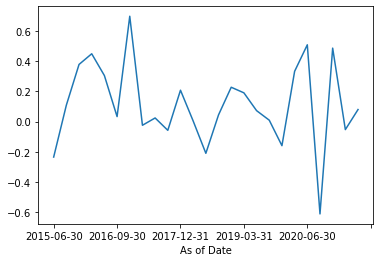

In [ ]:
k = model.resid
print(k)
k.plot()

In [ ]:
X = sm.add_constant(X)
# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     967.7
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           2.68e-20
Time:                        21:48:49   Log-Likelihood:                -3.0368
No. Observations:                  25   AIC:                             10.07
Df Residuals:                      23   BIC:                             12.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1119      0.057      1.964      0.0

                                 OLS Regression Results                                
Dep. Variable:                    sum   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.992e+04
Date:                Thu, 21 Oct 2021   Prob (F-statistic):                    3.56e-40
Time:                        21:57:19   Log-Likelihood:                          52.932
No. Observations:                  25   AIC:                                     -103.9
Df Residuals:                      24   BIC:                                     -102.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

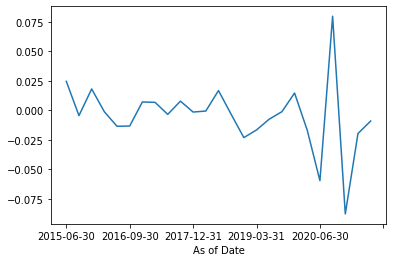

In [ ]:
index = y1.dropna().index 
y1 = y1.loc[index] 
X = X.loc[index] 

# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y1, X).fit() ## sm.OLS(output, input) 
predictions = model.predict(X) 

# Print out the statistics 
print(model.summary())

k = model.resid
k.plot() 

In [ ]:
k

As of Date
2015-06-30    0.02469300277176988967
2015-09-30   -0.00434711392144752906
2015-12-31    0.01827502594606800201
2016-03-31   -0.00105707866575632803
2016-06-30   -0.01338413924983877790
2016-09-30   -0.01315193691560806455
2016-12-31    0.00724213952666019622
2017-03-31    0.00690952055436627743
2017-06-30   -0.00328472398178247804
2017-09-30    0.00790514694110155958
2017-12-31   -0.00131568027661932430
2018-04-02   -0.00047560321647653614
2018-06-30    0.01688830342190075079
2018-09-30   -0.00323135489700539930
2018-12-31   -0.02298576951049080552
2019-03-31   -0.01649457522216606076
2019-06-30   -0.00736839618642853855
2019-09-30   -0.00103164142511724677
2019-12-31    0.01477319530313481177
2020-03-31   -0.01674584352420538380
2020-06-30   -0.05948066118912753719
2020-09-30    0.07987787866036416551
2020-12-31   -0.08765320048047187118
2021-03-31   -0.01953237645968020075
2021-06-30   -0.00892207842321360300
dtype: float64

# Checking for Total Returns

In [ ]:
import statsmodels.api as sm 

y = ICE_dataset_df_final_ESG_Issuer_residual_returns['return_ESG'].values/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev_ESG'].values
y1 = ICE_dataset_df_final_ESG_Issuer_residual_returns['return_Non-ESG'].values/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev_Non-ESG'].values 
X = ICE_dataset_df_final_ESG_Issuer_residual_returns['return'].values/ICE_dataset_df_final_ESG_Issuer_residual_returns['% Mkt Value_3mon_prev'].values
# index = y.dropna().index 
# y = y.loc[index] 
# X = X.loc[index] 
# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary())

k = model.resid
print(k)
#k.plot()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     303.9
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           9.45e-15
Time:                        17:15:21   Log-Likelihood:                -22.019
No. Observations:                  25   AIC:                             48.04
Df Residuals:                      23   BIC:                             50.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1700      0.142     -1.194      0.2

In [ ]:
X = sm.add_constant(X)
# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# Print out the statistics 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     303.9
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           9.45e-15
Time:                        21:40:40   Log-Likelihood:                -22.019
No. Observations:                  25   AIC:                             48.04
Df Residuals:                      23   BIC:                             50.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1700      0.142     -1.194      0.2

                                 OLS Regression Results                                
Dep. Variable:                    sum   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.307e+04
Date:                Thu, 21 Oct 2021   Prob (F-statistic):                    2.33e-34
Time:                        21:41:44   Log-Likelihood:                          30.890
No. Observations:                  25   AIC:                                     -59.78
Df Residuals:                      24   BIC:                                     -58.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

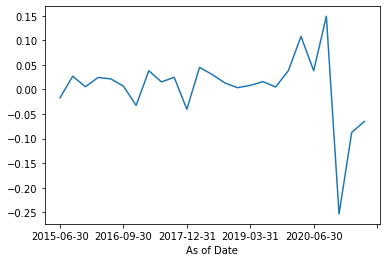

In [ ]:
index = y1.dropna().index 
y1 = y1.loc[index] 
X = X.loc[index] 

# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y1, X).fit() ## sm.OLS(output, input) 
predictions = model.predict(X) 

# Print out the statistics 
print(model.summary())

k = model.resid
k.plot()

In [ ]:
def ESG_Ratio_cuts_upd(data,ESG_cuts):
  
  if(data['ESG_Ratio'] >= ESG_cuts[0.8]):
    return 1
    
  if(ESG_cuts[0.8] > data['ESG_Ratio'] >= ESG_cuts[0.6]):
    return 2

  if(ESG_cuts[0.4] <= data['ESG_Ratio'] < ESG_cuts[0.6]):
    return 3

  if(ESG_cuts[0.2]<=data['ESG_Ratio']<ESG_cuts[0.4]):
    return 4

  if(0<=data['ESG_Ratio']<ESG_cuts[0.2]):
    return 5

def ESG_Ratio_FV_cuts_upd(data,ESG_cuts):
  
  if(data['ESG_Ratio_Face_Value'] >= ESG_cuts[0.8]):
    return 1
    
  if(ESG_cuts[0.8] > data['ESG_Ratio_Face_Value'] >= ESG_cuts[0.6]):
    return 2

  if(ESG_cuts[0.4] <= data['ESG_Ratio_Face_Value'] < ESG_cuts[0.6]):
    return 3

  if(ESG_cuts[0.2]<=data['ESG_Ratio_Face_Value']<ESG_cuts[0.4]):
    return 4

  if(0<=data['ESG_Ratio_Face_Value']<ESG_cuts[0.2]):
    return 5

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd['ESG_Ratio_Face_Value']

0      0.156
1      0.006
2      0.054
3      0.013
4      0.021
        ... 
1072   0.229
1073   0.047
1074   1.000
1075   0.325
1076   1.000
Name: ESG_Ratio_Face_Value, Length: 1077, dtype: float64

In [ ]:
dates_unique = ICE_dataset_df_final_ESG_Issuer_upd['As of Date_'].unique() 
ICE_dataset_df_final_ESG_Issuer_upd_group_date = ICE_dataset_df_final_ESG_Issuer_upd.groupby(['As of Date_']) 
ICE_dataset_df_final_ESG_Issuer_upd_df = pd.DataFrame() 

#ESG_ICE_dataset_df_final_Issuer_group_date = 
for i in dates_unique: 
  df = ICE_dataset_df_final_ESG_Issuer_upd_group_date.get_group(i).copy() 
  ESG_cuts = df['ESG_Ratio'].quantile([0.2, 0.4,0.6, 0.8,]) 
  ESG_FV_cuts = df['ESG_Ratio_Face_Value'].quantile([0.2, 0.4,0.6, 0.8,]) 
  
  df['ESG_Ratio_cut'] = df.apply(lambda x: ESG_Ratio_cuts_upd(x,ESG_cuts), axis = 1) 
  df['ESG_Ratio_FV_cut'] = df.apply(lambda x: ESG_Ratio_FV_cuts_upd(x,ESG_FV_cuts), axis = 1) 
  
  print(ESG_FV_cuts) 
  print(df['ESG_Ratio_FV_cut'].value_counts()) 
  ICE_dataset_df_final_ESG_Issuer_upd_df = pd.concat([ICE_dataset_df_final_ESG_Issuer_upd_df,df], axis = 0) 

0.200   0.015
0.400   0.025
0.600   0.066
0.800   0.191
Name: ESG_Ratio_Face_Value, dtype: float64
5    4
1    4
4    3
3    3
2    3
Name: ESG_Ratio_FV_cut, dtype: int64
0.200   0.016
0.400   0.030
0.600   0.090
0.800   0.264
Name: ESG_Ratio_Face_Value, dtype: float64
5    4
3    4
1    4
4    3
2    3
Name: ESG_Ratio_FV_cut, dtype: int64
0.200   0.012
0.400   0.024
0.600   0.065
0.800   0.217
Name: ESG_Ratio_Face_Value, dtype: float64
5    4
4    4
3    4
2    4
1    4
Name: ESG_Ratio_FV_cut, dtype: int64
0.200   0.014
0.400   0.026
0.600   0.061
0.800   0.191
Name: ESG_Ratio_Face_Value, dtype: float64
5    5
1    5
4    4
3    4
2    4
Name: ESG_Ratio_FV_cut, dtype: int64
0.200   0.014
0.400   0.029
0.600   0.089
0.800   0.279
Name: ESG_Ratio_Face_Value, dtype: float64
5    6
3    6
1    6
4    5
2    5
Name: ESG_Ratio_FV_cut, dtype: int64
0.200   0.018
0.400   0.035
0.600   0.090
0.800   0.338
Name: ESG_Ratio_Face_Value, dtype: float64
5    7
1    7
4    6
3    6
2    6
Name: ESG_R

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df['ESG_Ratio_FV_cut'].value_counts()

1    225
5    218
3    214
4    210
2    210
Name: ESG_Ratio_FV_cut, dtype: int64

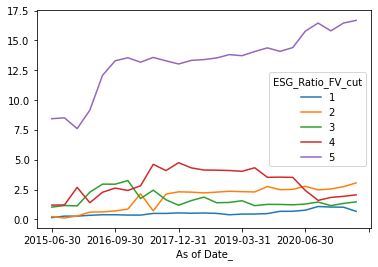

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','% Mkt Value_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.T.plot() 

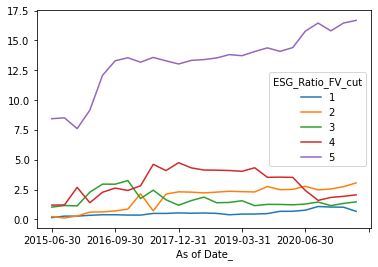

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','% Mkt Value_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.T.plot() 

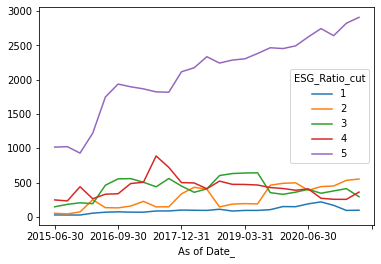

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_cut','% Mkt Value_count']].groupby(['As of Date_','ESG_Ratio_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.set_index(['As of Date_','ESG_Ratio_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.T.plot() 

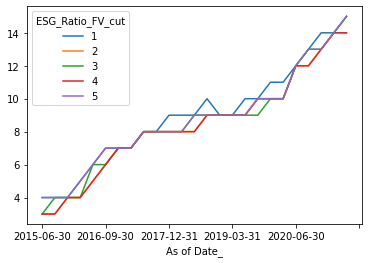

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','% Mkt Value_count']].groupby(['As of Date_','ESG_Ratio_FV_cut']).count() 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.T.plot() 

# ESG Issuer Face Value only ESG mkt value

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df.columns

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'Excess_return_sum',
       'Excess_return_count', 'ESG_sum', 'ESG_count', 'Face Value_LOC_sum',
       'Face Value_LOC_count', 'Non-ESG_sum', 'Non-ESG_count',
       '% Mkt Value_ESG_sum', '% Mkt Value_ESG_count',
       '% Mkt Value_3mon_prev_ESG_sum', '% Mkt Value_3mon_prev_ESG_count',
       'return_ESG_sum', 'return_ESG_count', 'Excess_return_ESG_sum',
       'Excess_return_ESG_count', 'Face Value_LOC_ESG_sum',
       'Face Value_LOC_ESG_count', '% Mkt Value_Non-ESG_sum',
       '% Mkt Value_Non-ESG_count', '% Mkt Value_3mon_prev_Non-ESG_sum',
       '% Mkt Value_3mon_prev_Non-ESG_count', 'return_Non-ESG_sum',
       'return_Non-ESG_count', 'Excess_return_Non-ESG_sum',
       'Excess_return_Non-ESG_count', 'Face Value_LOC_Non-ESG_sum',
       'Face Value_LOC_Non-ESG_count', 'ESG_Ratio', 'ESG_Ratio_Face_Valu

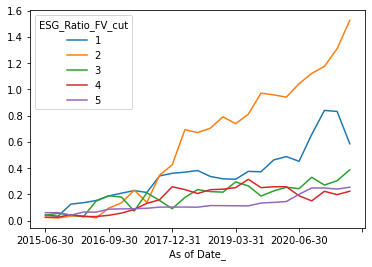

In [ ]:
# ESG Companies Market Value
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','% Mkt Value_3mon_prev_ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.T.plot() 

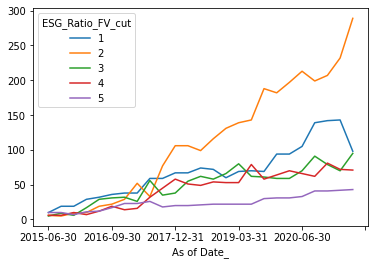

In [ ]:
# ESG Companies Count 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.reset_index(level=[0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_grp_decile_stacked.T.plot() 

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['return_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_sum'] 

ICE_dataset_df_final_ESG_Issuer_Index = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','return_div_weight']].groupby(['As of Date_']).sum() 
ICE_dataset_df_final_ESG_Issuer_Index 

return_div_weight
As of Date_                          
2015-06-30   -18.33511872407151344078
2015-09-30    33.69415173242425254330
2015-12-31    36.15488232959834391522
2016-03-31    38.02796818586262617146
2016-06-30    85.34766492149572059134
2016-09-30   -13.50301071293594290523
2016-12-31  -135.21093286308223468950
2017-03-31    50.45067499531679544589
2017-06-30    82.60255597807284289047
2017-09-30    40.32184689267627675235
2017-12-31    44.47087984526068282776
2018-04-02   -53.42151976747344122032
2018-06-30    38.10581798616184556749
2018-09-30   -14.76267227815350580045
2018-12-31    70.71056462578998491608
2019-03-31   133.40896982256495562069
2019-06-30   110.13677082888962388552
2019-09-30    81.51381396593806982764
2019-12-31    29.90309278387294611434
2020-03-31   -16.93556806372810186190
2020-06-30   150.25524054311441091158
2020-09-30    76.71871507671627909986
2020-12-31   109.60108946055463263747
2021-03-31   -30.33111867034142150601
2021-06-30   120.06651579858015566060

# Return for all ESG Issuers only

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_sum','% Mkt Value_3mon_prev_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile 

return_sum  % Mkt Value_3mon_prev_sum
As of Date_ ESG_Ratio_FV_cut                                       
2015-06-30  1                     -0.094                      0.144
            2                     -0.299                      0.236
            3                     -1.533                      1.024
            4                     -1.041                      1.191
            5                     -5.963                      8.437
...                                  ...                        ...
2021-06-30  1                      1.345                      0.665
            2                      6.830                      2.888
            3                      1.809                      1.457
            4                      3.742                      1.994
            5                     24.755                     16.337

[125 rows x 2 columns]

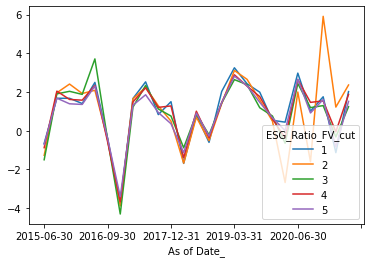

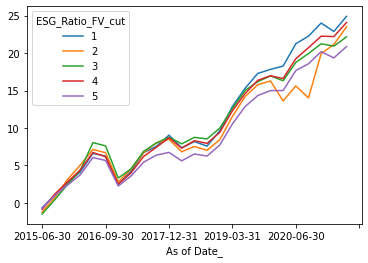

In [ ]:
# Return for all ESG Issuers Total Return only
#ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['return_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_sum','% Mkt Value_3mon_prev_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_decile['return_sum']/ICE_dataset_df_final_ESG_Issuer_upd_decile['% Mkt Value_3mon_prev_sum'] 
ICE_dataset_df_final_ESG_Issuer_upd_decile.drop(columns = ['return_sum','% Mkt Value_3mon_prev_sum'], inplace = True)
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()


In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked

As of Date_       2015-06-30  2015-09-30  ...  2021-03-31  2021-06-30
ESG_Ratio_FV_cut                          ...                        
1                     -0.653       1.679  ...      -1.130       2.023
2                     -1.269       1.963  ...       1.224       2.365
3                     -1.497       1.906  ...      -0.317       1.241
4                     -0.874       2.047  ...      -0.052       1.877
5                     -0.707       1.685  ...      -0.837       1.515

[5 rows x 25 columns]

In [ ]:
"""
Total Return
Total Vol
Sharpe Ratio
Active Return
Tracking Error
Alpha
Beta
Beta Adjusted IR
DTW
YTW
"""

'\nTotal Return\nTotal Vol\nSharpe Ratio\nActive Return\nTracking Error\nAlpha\nBeta\nBeta Adjusted IR\nDTW\nYTW\n'

In [ ]:
import statsmodels.api as sm 
from collections import defaultdict 

ICE_dataset_df_final_ESG_Issuer_Index = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','return_sum','Excess_return_sum','% Mkt Value_3mon_prev_sum']].groupby(['As of Date_']).sum() 
ICE_dataset_df_final_ESG_Issuer_Index['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_Index['return_sum']/ICE_dataset_df_final_ESG_Issuer_Index['% Mkt Value_3mon_prev_sum'] 
ICE_dataset_df_final_ESG_Issuer_Index['Excess_return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_Index['Excess_return_sum']/ICE_dataset_df_final_ESG_Issuer_Index['% Mkt Value_3mon_prev_sum'] 

def run_reg(data,ret): 
  columns = ['Total Return %','Total Vol %','Sharpe Ratio','Alpha','Beta','Beta Adjusted IR'] 
  Comb_dict = defaultdict(list) 
  Comb_dict_resid_ret = pd.DataFrame(index = ICE_dataset_df_final_ESG_Issuer_Index.index) 
  for i in data.T.columns: 
    Reg_dict = dict.fromkeys(columns, None) 
    Reg_dict_resid = dict.fromkeys(columns, None) 

    y = data.T[i] 
    if(ret=='index'):
      X = ICE_dataset_df_final_ESG_Issuer_Index['return_div_weight'] 
    else:
      X = ICE_dataset_df_final_ESG_Issuer_Index['Excess_return_div_weight'] 
      
    # X = sm.add_constant(X) 
    # index = y.dropna().index 
    # y = y.loc[index] 
    # X = X.loc[index] 

    # Note the difference in argument order 
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
    # Print out the statistics
    Reg_dict['Total Return %'] = 4*data.T[i].mean() 
    Reg_dict['Total Vol %'] = 2*(data.T[i].std()) 
    Reg_dict['Sharpe Ratio'] = Reg_dict['Total Return %']/Reg_dict['Total Vol %'] 
    Reg_dict['Alpha'] = 4*np.mean(model.resid) 
    Reg_dict['Beta'] = model.params[0] 
    Reg_dict['Beta Adjusted IR'] = 4*np.mean(model.resid)/2*np.std(model.resid) 
    Comb_dict_resid_ret[i] = model.resid.cumsum() 
    for keys, value in Reg_dict.items(): 
      Comb_dict[keys].append(value) 

  return  Comb_dict, Comb_dict_resid_ret 

ESG_Ratio_FV_cut     1      2      3     4     5
Total Return %   3.985  3.762  3.547 3.853 3.339
Total Vol %      3.238  4.143  3.282 3.000 2.794
Sharpe Ratio     1.231  0.908  1.081 1.284 1.195
Alpha            0.172 -0.295 -0.166 0.254 0.031
Beta             1.091  1.161  1.063 1.030 0.947
Beta Adjusted IR 0.031 -0.160 -0.034 0.034 0.002


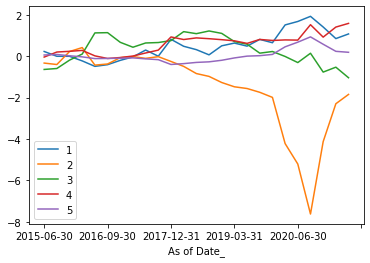

In [ ]:
data_df, Cum_return_data = run_reg(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked,'index')
Final_df = pd.DataFrame(data = data_df).T
Final_df.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.columns
print(Final_df)

# for keys, value in Cum_return_data.items():
#       final_cum_ret[keys].append(value) 
Cum_return_data.plot()

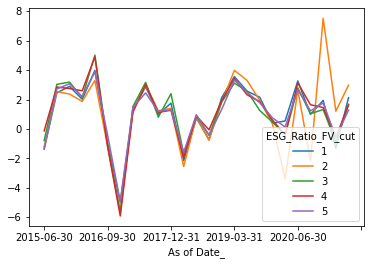

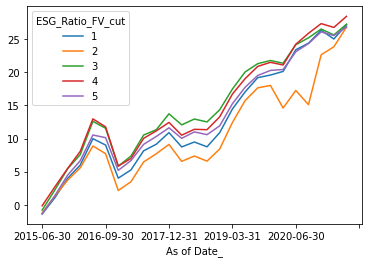

In [ ]:
# Return for all ESG Issuers Excess Return ESG only 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_ESG_sum','% Mkt Value_3mon_prev_ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_decile['return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_decile['% Mkt Value_3mon_prev_ESG_sum'] 
ICE_dataset_df_final_ESG_Issuer_upd_decile.drop(columns = ['return_ESG_sum','% Mkt Value_3mon_prev_ESG_sum'], inplace = True) 

#ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_ESG_sum'] 

#ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','Excess_return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot() 

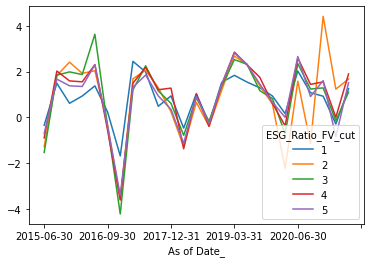

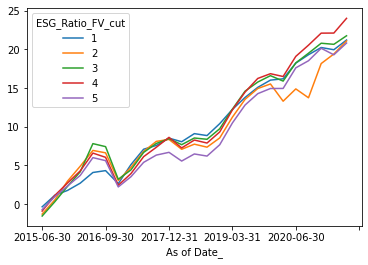

In [ ]:
# Return for all ESG Issuers Excess Return ESG only 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_Non-ESG_sum','% Mkt Value_3mon_prev_Non-ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_decile['return_Non-ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_decile['% Mkt Value_3mon_prev_Non-ESG_sum'] 
ICE_dataset_df_final_ESG_Issuer_upd_decile.drop(columns = ['return_Non-ESG_sum','% Mkt Value_3mon_prev_Non-ESG_sum'], inplace = True) 

#ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_ESG_sum'] 

#ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','Excess_return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df.columns

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'Excess_return_sum',
       'Excess_return_count', 'ESG_sum', 'ESG_count', 'Face Value_LOC_sum',
       'Face Value_LOC_count', 'Non-ESG_sum', 'Non-ESG_count',
       '% Mkt Value_ESG_sum', '% Mkt Value_ESG_count',
       '% Mkt Value_3mon_prev_ESG_sum', '% Mkt Value_3mon_prev_ESG_count',
       'return_ESG_sum', 'return_ESG_count', 'Excess_return_ESG_sum',
       'Excess_return_ESG_count', 'Face Value_LOC_ESG_sum',
       'Face Value_LOC_ESG_count', '% Mkt Value_Non-ESG_sum',
       '% Mkt Value_Non-ESG_count', '% Mkt Value_3mon_prev_Non-ESG_sum',
       '% Mkt Value_3mon_prev_Non-ESG_count', 'return_Non-ESG_sum',
       'return_Non-ESG_count', 'Excess_return_Non-ESG_sum',
       'Excess_return_Non-ESG_count', 'Face Value_LOC_Non-ESG_sum',
       'Face Value_LOC_Non-ESG_count', 'ESG_Ratio', 'ESG_Ratio_Face_Valu

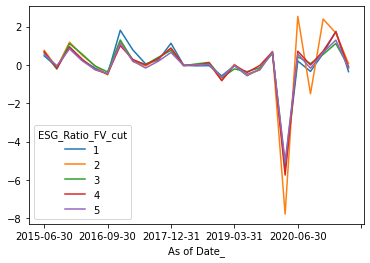

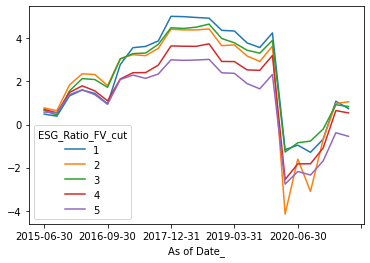

In [ ]:
# Return for all ESG Issuers Excess Return only 

#ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','Excess_return_sum','% Mkt Value_3mon_prev_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_decile['Excess_return_sum']/ICE_dataset_df_final_ESG_Issuer_upd_decile['% Mkt Value_3mon_prev_sum'] 
ICE_dataset_df_final_ESG_Issuer_upd_decile.drop(columns = ['Excess_return_sum','% Mkt Value_3mon_prev_sum'], inplace = True) 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()

In [ ]:
data_df, Cum_return_data = run_reg(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked,'Excess')
Final_df = pd.DataFrame(data = data_df).T
Final_df.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.columns
print(Final_df)


ESG_Ratio_FV_cut     1     2     3     4      5
Total Return %   0.118 0.168 0.133 0.086 -0.088
Total Vol %      2.607 3.744 2.387 2.649  2.330
Sharpe Ratio     0.045 0.045 0.056 0.032 -0.038
Alpha            0.132 0.189 0.147 0.101 -0.074
Beta             1.010 1.434 0.934 1.042  0.919
Beta Adjusted IR 0.016 0.042 0.012 0.006 -0.002


In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)

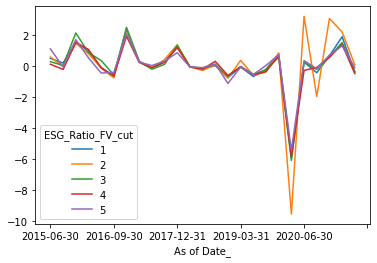

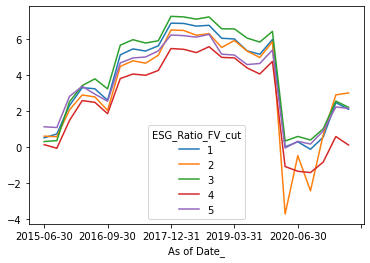

In [ ]:
# Return for all ESG Issuers Excess Return ESG only 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','Excess_return_ESG_sum','% Mkt Value_3mon_prev_ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_decile['Excess_return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_decile['% Mkt Value_3mon_prev_ESG_sum'] 
ICE_dataset_df_final_ESG_Issuer_upd_decile.drop(columns = ['Excess_return_ESG_sum','% Mkt Value_3mon_prev_ESG_sum'], inplace = True) 

#ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_ESG_sum'] 

#ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','Excess_return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()

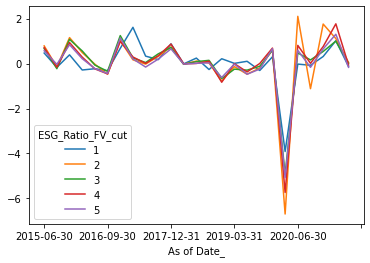

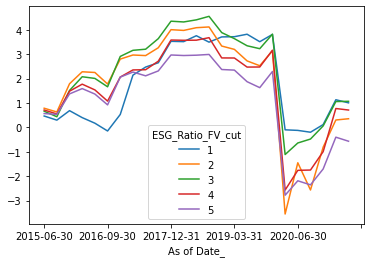

In [ ]:
# Return for all ESG Issuers Excess Return Non- ESG only 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','Excess_return_Non-ESG_sum','% Mkt Value_3mon_prev_Non-ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_decile['Excess_return_Non-ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_decile['% Mkt Value_3mon_prev_Non-ESG_sum'] 
ICE_dataset_df_final_ESG_Issuer_upd_decile.drop(columns = ['Excess_return_Non-ESG_sum','% Mkt Value_3mon_prev_Non-ESG_sum'], inplace = True) 

#ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_ESG_sum'] 

#ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','Excess_return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()

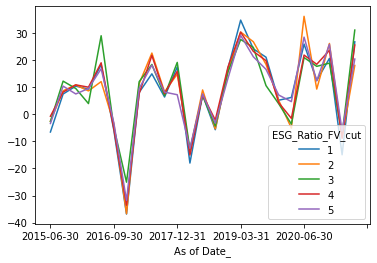

In [ ]:
# Return for ESG firms only

ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_ESG_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

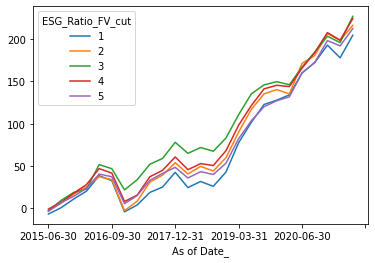

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()

In [ ]:
round(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.mean()/ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.std(),3)

ESG_Ratio_FV_cut
1   0.51200000000000001066
2   0.55500000000000004885
3   0.65000000000000002220
4   0.61199999999999998845
5   0.62700000000000000178
dtype: float64

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df.columns

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'Excess_return_sum',
       'Excess_return_count', 'ESG_sum', 'ESG_count', 'Face Value_LOC_sum',
       'Face Value_LOC_count', 'Non-ESG_sum', 'Non-ESG_count',
       '% Mkt Value_ESG_sum', '% Mkt Value_ESG_count',
       '% Mkt Value_3mon_prev_ESG_sum', '% Mkt Value_3mon_prev_ESG_count',
       'return_ESG_sum', 'return_ESG_count', 'Excess_return_ESG_sum',
       'Excess_return_ESG_count', 'Face Value_LOC_ESG_sum',
       'Face Value_LOC_ESG_count', '% Mkt Value_Non-ESG_sum',
       '% Mkt Value_Non-ESG_count', '% Mkt Value_3mon_prev_Non-ESG_sum',
       '% Mkt Value_3mon_prev_Non-ESG_count', 'return_Non-ESG_sum',
       'return_Non-ESG_count', 'Excess_return_Non-ESG_sum',
       'Excess_return_Non-ESG_count', 'Face Value_LOC_Non-ESG_sum',
       'Face Value_LOC_Non-ESG_count', 'ESG_Ratio', 'ESG_Ratio_Face_Valu

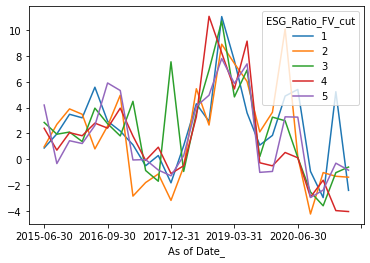

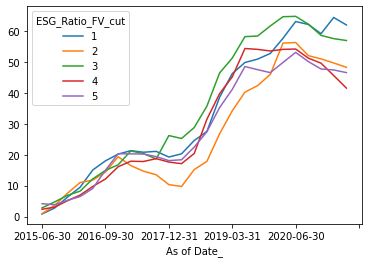

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_ESG_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()


In [ ]:
round(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.mean()/ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.std(),3)

ESG_Ratio_FV_cut
1   0.77500000000000002220
2   0.50700000000000000622
3   0.66300000000000003375
4   0.44200000000000000400
5   0.59199999999999997069
dtype: float64

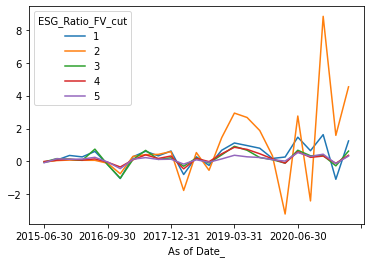

In [ ]:
# Return for ESG firms only

ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_ESG_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df.columns

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'ESG_sum', 'ESG_count',
       'Face Value_LOC_sum', 'Face Value_LOC_count', 'Non-ESG_sum',
       'Non-ESG_count', '% Mkt Value_ESG_sum', '% Mkt Value_ESG_count',
       '% Mkt Value_3mon_prev_ESG_sum', '% Mkt Value_3mon_prev_ESG_count',
       'return_ESG_sum', 'return_ESG_count', 'Face Value_LOC_ESG_sum',
       'Face Value_LOC_ESG_count', '% Mkt Value_Non-ESG_sum',
       '% Mkt Value_Non-ESG_count', '% Mkt Value_3mon_prev_Non-ESG_sum',
       '% Mkt Value_3mon_prev_Non-ESG_count', 'return_Non-ESG_sum',
       'return_Non-ESG_count', 'Face Value_LOC_Non-ESG_sum',
       'Face Value_LOC_Non-ESG_count', 'ESG_Ratio', 'ESG_Ratio_Face_Value',
       'ESG_Ratio_cut', 'ESG_Ratio_FV_cut', 'return_div_weight'],
      dtype='object')

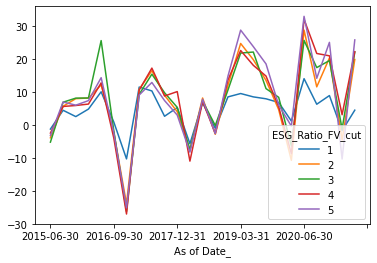

In [ ]:
# Returns for Non-ESG firms 
ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['return_Non-ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_Non-ESG_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

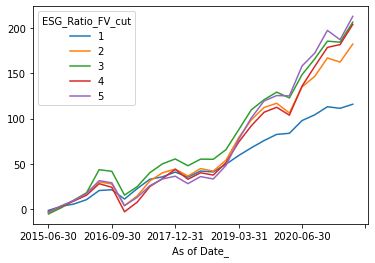

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()

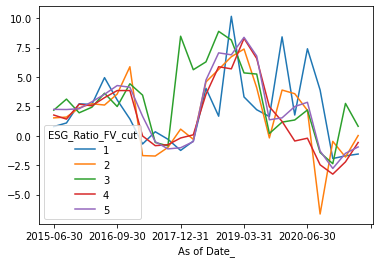

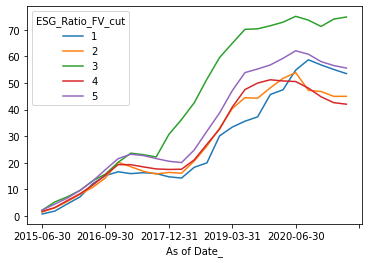

In [ ]:
# Returns for Non-ESG firms 
ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['Excess_return_Non-ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_Non-ESG_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot() 

In [ ]:
round(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.mean()/ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.std(),3)

ESG_Ratio_FV_cut
1   0.68799999999999994493
2   0.56100000000000005418
3   0.98999999999999999112
4   0.56899999999999995026
5   0.73599999999999998757
dtype: float64

In [ ]:
round(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.mean()/ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.std(),2)

ESG_Ratio_FV_cut
1   0.81999999999999995115
2   0.60999999999999998668
3   0.68000000000000004885
4   0.64000000000000001332
5   0.63000000000000000444
dtype: float64

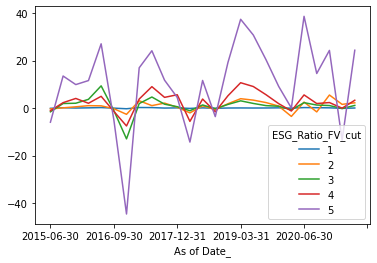

In [ ]:
# Returns for Non-ESG firms 
ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['return_Non-ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_Non-ESG_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_Non-ESG_sum']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

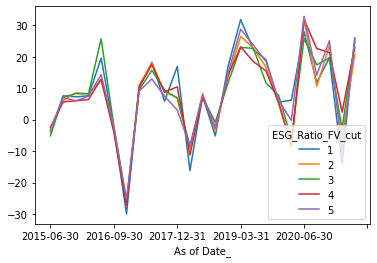

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df['return_div_weight'] = ICE_dataset_df_final_ESG_Issuer_upd_df['return_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df['% Mkt Value_3mon_prev_sum'] 

ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_df[['As of Date_','ESG_Ratio_FV_cut','return_div_weight']].groupby(['As of Date_','ESG_Ratio_FV_cut']).sum() 
ICE_dataset_df_final_ESG_Issuer_upd_decile = ICE_dataset_df_final_ESG_Issuer_upd_decile.reset_index(level = [0,1]) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile.set_index(['As of Date_','ESG_Ratio_FV_cut']).unstack(['As of Date_']) 

ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.reindex(columns = sorted(ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns, key = lambda x: x[::-1])) 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns = ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.columns.droplevel() 
#ICE_dataset_df_final_Issuer_grp_decile_stacked.reset_index(inplace=True)
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.plot() 

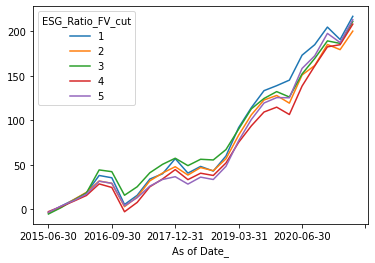

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T.cumsum().plot()

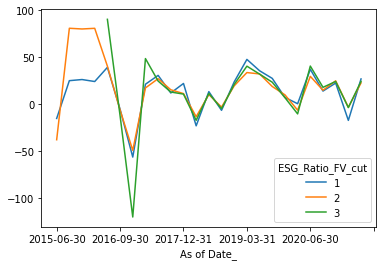

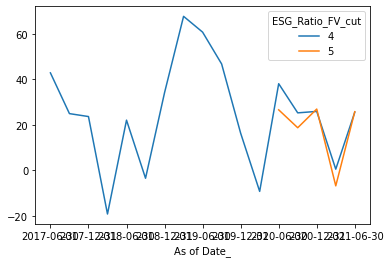

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T[[1,2,3]].plot() 
ICE_dataset_df_final_ESG_Issuer_upd_decile_stacked.T[[4,5]].plot() 

In [ ]:
def ESG_Ratio_cuts_upd(data,ESG_cuts):
  
  if(data['ESG_Ratio'] >= ESG_cuts[0.8]):
    return 1
    
  if(ESG_cuts[0.8] > data['ESG_Ratio'] >= ESG_cuts[0.6]):
    return 2

  if(ESG_cuts[0.4] <= data['ESG_Ratio'] < ESG_cuts[0.6]):
    return 3

  if(ESG_cuts[0.2]<=data['ESG_Ratio']<ESG_cuts[0.4]):
    return 4

  if(0<=data['ESG_Ratio']<ESG_cuts[0.2]):
    return 5

def ESG_Ratio_FV_cuts_upd(data,ESG_cuts):
  
  if(data['ESG_Ratio_Face_Value'] >= ESG_cuts[0.8]):
    return 1
    
  if(ESG_cuts[0.8] > data['ESG_Ratio_Face_Value'] >= ESG_cuts[0.6]):
    return 2

  if(ESG_cuts[0.4] <= data['ESG_Ratio_Face_Value'] < ESG_cuts[0.6]):
    return 3

  if(ESG_cuts[0.2]<=data['ESG_Ratio_Face_Value']<ESG_cuts[0.4]):
    return 4

  if(0<=data['ESG_Ratio_Face_Value']<ESG_cuts[0.2]):
    return 5

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df.columns

Index(['As of Date_', 'Ticker_', '% Mkt Value_sum', '% Mkt Value_count',
       '% Mkt Value_3mon_prev_sum', '% Mkt Value_3mon_prev_count',
       'return_sum', 'return_count', 'ESG_sum', 'ESG_count',
       'Face Value_LOC_sum', 'Face Value_LOC_count', 'Non-ESG_sum',
       'Non-ESG_count', '% Mkt Value_ESG_sum', '% Mkt Value_ESG_count',
       '% Mkt Value_3mon_prev_ESG_sum', '% Mkt Value_3mon_prev_ESG_count',
       'return_ESG_sum', 'return_ESG_count', 'Face Value_LOC_ESG_sum',
       'Face Value_LOC_ESG_count', '% Mkt Value_Non-ESG_sum',
       '% Mkt Value_Non-ESG_count', '% Mkt Value_3mon_prev_Non-ESG_sum',
       '% Mkt Value_3mon_prev_Non-ESG_count', 'return_Non-ESG_sum',
       'return_Non-ESG_count', 'Face Value_LOC_Non-ESG_sum',
       'Face Value_LOC_Non-ESG_count', 'ESG_Ratio', 'ESG_Ratio_Face_Value',
       'ESG_Ratio_cut', 'ESG_Ratio_FV_cut', 'return_div_weight'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
one_hot_encoder = OneHotEncoder(sparse = False) 

ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final = pd.DataFrame() 
Test_df_encoded = ICE_dataset_df_final_ESG_Issuer_upd_df[['ESG_Ratio_FV_cut']].copy() 
one_hot_encoder.fit(Test_df_encoded) 
Test_df_encoded = one_hot_encoder.transform(Test_df_encoded) 
Test_df_encoded = pd.DataFrame(data=Test_df_encoded, columns=one_hot_encoder.categories_) 
print('\nAfter One Hot Encoding:') 
display(Test_df_encoded) 
ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final = pd.concat([ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final, Test_df_encoded], axis = 1) 
ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final = pd.DataFrame(data = np.array(ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final),columns = ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final.columns.get_level_values(0)) 
ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final.head() 


ICE_dataset_df_final_Issuer_reg_merged_factor_drop_cols = ICE_dataset_df_final_ESG_Issuer_upd_df.drop(['ESG_Ratio_FV_cut'], axis = 1).copy() 

ICE_dataset_df_final_ESG_Issuer_upd_df_updated = pd.concat([ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final, ICE_dataset_df_final_Issuer_reg_merged_factor_drop_cols], axis = 1) 
ICE_dataset_df_final_ESG_Issuer_upd_df_updated.tail() 



After One Hot Encoding:


1    2    3    4    5
0     0.0  1.0  0.0  0.0  0.0
1     0.0  1.0  0.0  0.0  0.0
2     1.0  0.0  0.0  0.0  0.0
3     0.0  1.0  0.0  0.0  0.0
4     0.0  1.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...
1682  0.0  0.0  1.0  0.0  0.0
1683  0.0  0.0  0.0  0.0  1.0
1684  1.0  0.0  0.0  0.0  0.0
1685  0.0  0.0  1.0  0.0  0.0
1686  1.0  0.0  0.0  0.0  0.0

[1687 rows x 5 columns]

1    2    3  ...  ESG_Ratio_Face_Value  ESG_Ratio_cut return_div_weight
1682  0.0  0.0  1.0  ...              0.228856              3          2.158000
1683  0.0  0.0  0.0  ...              0.046868              5          0.896397
1684  1.0  0.0  0.0  ...              1.000000              1          2.271225
1685  0.0  0.0  1.0  ...              0.324525              2          4.526227
1686  1.0  0.0  0.0  ...              1.000000              1          0.320498

[5 rows x 39 columns]

In [ ]:
ICE_dataset_df_final_ESG_Issuer_upd_df_updated.columns

Index([                                    1,
                                           2,
                                           3,
                                           4,
                                           5,
                               'As of Date_',
                                   'Ticker_',
                           '% Mkt Value_sum',
                         '% Mkt Value_count',
                 '% Mkt Value_3mon_prev_sum',
               '% Mkt Value_3mon_prev_count',
                                'return_sum',
                              'return_count',
                                   'ESG_sum',
                                 'ESG_count',
                        'Face Value_LOC_sum',
                      'Face Value_LOC_count',
                               'Non-ESG_sum',
                             'Non-ESG_count',
                       '% Mkt Value_ESG_sum',
                     '% Mkt Value_ESG_count',
             '% Mkt Value_3mon_pre

In [ ]:
# Running the regression for ESG returns
# import statsmodels 
import statsmodels.api as sm 

y = pd.Series(ICE_dataset_df_final_ESG_Issuer_upd_df_updated['return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df_updated['% Mkt Value_3mon_prev_ESG_sum']) 
index = y.dropna().index 
y = y.iloc[index] 
X = ICE_dataset_df_final_ESG_Issuer_upd_df_updated.loc[index,[1,2,3,4,5,'% Mkt Value_3mon_prev_sum','% Mkt Value_3mon_prev_count','ESG_sum','Face Value_LOC_sum','Face Value_LOC_ESG_sum','ESG_Ratio','ESG_Ratio_Face_Value']] 
print(X.corr()) 

# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
predictions = model.predict(X) 

# Print out the statistics 
print(model.summary())


In [ ]:
y = pd.Series(ICE_dataset_df_final_ESG_Issuer_upd_df_updated['return_Non-ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df_updated['% Mkt Value_3mon_prev_Non-ESG_sum']) 
index = y.dropna().index 
y = y.iloc[index] 
X = ICE_dataset_df_final_ESG_Issuer_upd_df_updated.loc[index,[1,2,3,4,5,'% Mkt Value_3mon_prev_sum','% Mkt Value_3mon_prev_count','ESG_sum','Face Value_LOC_sum','Face Value_LOC_Non-ESG_sum','ESG_Ratio','ESG_Ratio_Face_Value']] 
print(X.corr())

# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
predictions = model.predict(X) 

# Print out the statistics 
print(model.summary())


In [ ]:
y1 = pd.Series(ICE_dataset_df_final_ESG_Issuer_upd_df_updated['return_ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df_updated['% Mkt Value_3mon_prev_ESG_sum'])
y2 = pd.Series(ICE_dataset_df_final_ESG_Issuer_upd_df_updated['return_Non-ESG_sum']/ICE_dataset_df_final_ESG_Issuer_upd_df_updated['% Mkt Value_3mon_prev_Non-ESG_sum']) 
y = y1-y2
index = y.dropna().index 
y = y.iloc[index] 
X = ICE_dataset_df_final_ESG_Issuer_upd_df_updated.loc[index,[1,2,3,4,5,'% Mkt Value_3mon_prev_sum','% Mkt Value_3mon_prev_count','ESG_sum','Face Value_LOC_ESG_sum','Face Value_LOC_sum','Face Value_LOC_Non-ESG_sum','ESG_Ratio','ESG_Ratio_Face_Value']] 
print(X.corr()) 

# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
predictions = model.predict(X) 

# Print out the statistics 
print(model.summary()) 

In [ ]:
def run_lin_reg(data):
  import statsmodels.api as sm # import statsmodels 

  # ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated[~ICE_dataset_df_final_merged_factor_updated['return'].isna()].copy()
  # ICE_dataset_df_final_merged_factor_updated.reset_index(drop = True, inplace = True) 
#  data = ICE_dataset_df_final_Issuer

  y = pd.Series(data['return_sum']/data['% Mkt Value_3mon_prev_sum']) 
  index = y.dropna().index 
  y = y.iloc[index] 
  X = data.iloc[index,:].drop(['return_sum','% Mkt Value_3mon_prev_sum'], axis = 1)
  print(X.corr())

  # y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
  # X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
  # X = ICE_dataset_df_final_merged_factor_updated[] 
  #X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

  # Note the difference in argument order 
  model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
  predictions = model.predict(X) 

  # Print out the statistics 
  print(model.summary())

# ESG_ICE_dataset_df_final_merged_factor['Diff_years'] = (ESG_ICE_dataset_df_final_merged_factor['Maturity Date'] -  ESG_ICE_dataset_df_final_merged_factor['As of Date'])/365 
# ESG_ICE_dataset_df_final_merged_factor['Diff_years'] = ESG_ICE_dataset_df_final_merged_factor['Diff_years'].dt.days 

# def diff_org_years(x):
#   if(0<=x<10):
#     return '1-10'
#   elif(10<=x<15):
#     return '10-15'
#   elif(15<=x<20):
#     return '15-20'
#   elif(20<=x<25):
#     return '20-25'
#   elif(25<=x<30):
#     return '25-30'
#   elif(30<=x<35):
#     return '30-35'
#   elif(35<=x<40):
#     return '35-40'
#   elif(40<=x<45):
#     return '40-45'
#   elif(45<=x<50):
#     return '45-50'
#   elif(50<=x<55):
#     return '50-55'

# ESG_ICE_dataset_df_final_merged_factor['Diff_years_interval'] = ESG_ICE_dataset_df_final_merged_factor['Diff_years'].apply(lambda x : diff_org_years(x)) 
run_lin_reg(ICE_dataset_df_final_Issuer[['return_sum','ESG_sum','ESG_Ratio','ESG_count','% Mkt Value_3mon_prev_sum']])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


            ESG_sum  ESG_Ratio  ESG_count
ESG_sum    1.000000   0.419827   0.220356
ESG_Ratio  0.419827   1.000000   0.039759
ESG_count  0.220356   0.039759   1.000000
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              224.9
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                   1.37e-144
Time:                        15:51:33   Log-Likelihood:                         -84390.
No. Observations:               37525   AIC:                                  1.688e+05
Df Residuals:                   37522   BIC:                                  1.688e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust   

In [ ]:
ICE_dataset_df_final_Issuer['return_sum_actual'] = ICE_dataset_df_final_Issuer['return_sum']/ICE_dataset_df_final_Issuer['% Mkt Value_sum']
ICE_dataset_df_final_Issuer[['return_sum_actual','ESG_sum','ESG_count','ESG_Ratio']].corr()

return_sum_actual   ESG_sum  ESG_count  ESG_Ratio
return_sum_actual           1.000000  0.002221  -0.006201   0.002671
ESG_sum                     0.002221  1.000000   0.220505   0.410843
ESG_count                  -0.006201  0.220505   1.000000   0.038133
ESG_Ratio                   0.002671  0.410843   0.038133   1.000000

In [ ]:
ICE_dataset_df_final_Issuer[ICE_dataset_df_final_Issuer['ESG_sum']!=0][['return_sum_actual','ESG_sum','ESG_count','ESG_Ratio']].corr()

return_sum_actual   ESG_sum  ESG_count  ESG_Ratio
return_sum_actual           1.000000  0.020775  -0.022749   0.032007
ESG_sum                     0.020775  1.000000   0.146799   0.145279
ESG_count                  -0.022749  0.146799   1.000000  -0.400485
ESG_Ratio                   0.032007  0.145279  -0.400485   1.000000

In [ ]:
#print(len(ICE_dataset_df_final[['Ticker','Muni Issuer Name']])) 
ICE_dataset_df_final_Tic_Issuer = ICE_dataset_df_final[['Ticker','Muni Issuer Name', 'return']].groupby(['Ticker','Muni Issuer Name'],dropna= False).sum() 
ICE_dataset_df_final_Tic_Issuer.reset_index(level=[0,1],inplace = True) 
#ICE_dataset_df_final_Tic_Issuer.columns = ['_'.join(col) for col in ICE_dataset_df_final_Issuer.columns] 
print(len(ICE_dataset_df_final_Tic_Issuer)) 
print(len(ICE_dataset_df_final_Tic_Issuer.dropna(subset = ['Muni Issuer Name']))) 

2094
0


In [ ]:
!pip install imblearn

In [ ]:
def get_deciles(x):
  if(0<x<=0.2):
    return 1
  elif(0.2<x<=0.4):
    return 2
  elif(0.4<x<=0.6):
    return 3
  elif(0.6<x<=0.8):
    return 4
  elif(0.8<x<=1):
    return 5
  else:
    return 0

X = np.array(ICE_dataset_df_final_Issuer[['return_sum','ESG_sum','ESG_Ratio','ESG_count','% Mkt Value_3mon_prev_sum']])
y = np.array(ICE_dataset_df_final_Issuer['ESG_Ratio'].apply(lambda x : get_deciles(x)))

from collections import Counter
counter = Counter(y)
print(counter)

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline 

def sampling(X,y):
  over_strategy = {0:38000, 1:1000, 2:500, 3:250, 4:100, 5:250} 
  under_strategy = {0:1000, 1:100, 2:50, 3:25, 4:10, 5:25} 
  over = SMOTE(sampling_strategy = over_strategy) 
  under = RandomUnderSampler(sampling_strategy = under_strategy) 
  steps = [('o', over), ('u', under)] 
  pipeline = Pipeline(steps = steps) 

  # transform the dataset

  X, y = pipeline.fit_resample(X, y) 
  # summarize the new class distribution
  counter = Counter(y) 
  print(counter) 

Counter({0: 37166, 1: 548, 2: 228, 3: 140, 5: 113, 4: 48})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
print(counter)

Counter({0: 37166, 1: 548, 2: 228, 3: 140, 5: 113, 4: 48})


In [ ]:
ICE_dataset_df_final_Issuer_resampled = pd.DataFrame(X,columns=['return_sum','ESG_sum','ESG_Ratio','ESG_count','% Mkt Value_3mon_prev_sum']) 
run_lin_reg(ICE_dataset_df_final_Issuer_resampled) 

            ESG_sum  ESG_Ratio  ESG_count
ESG_sum    1.000000   0.419827   0.220356
ESG_Ratio  0.419827   1.000000   0.039759
ESG_count  0.220356   0.039759   1.000000
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              224.9
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                   1.37e-144
Time:                        15:51:49   Log-Likelihood:                         -84390.
No. Observations:               37525   AIC:                                  1.688e+05
Df Residuals:                   37522   BIC:                                  1.688e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust   

In [ ]:
ICE_dataset_df_final.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

In [ ]:
ICE_dataset_df_final_Issuer_reg = ICE_dataset_df_final[['Par Wtd Coupon','% Mkt Value','% Mkt Value_3mon_prev','return','ESG','Cash', 'OAS','Asset Swap Spread','Effective Yield', 
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)','Rating','Effective Duration','Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)','Effective Convexity', 'Convexity to Worst (s.a.)', 
       'Convexity (s.a.)','Industry Lvl 3 Desc']].copy() 

# ICE_dataset_df_final_Issuer_reg.to_csv('ICE_dataset_df_final_Issuer_reg.csv')
# ICE_dataset_df_final_Issuer.to_csv('ICE_dataset_df_final_Issuer.csv')

# files.download('ICE_dataset_df_final_Issuer_reg.csv')
# files.download('ICE_dataset_df_final_Issuer.csv')

In [ ]:
# Adding all the variables in the analysis 
from sklearn.preprocessing import OneHotEncoder 
one_hot_encoder = OneHotEncoder(sparse = False) 

ICE_dataset_df_final_Issuer_reg = ICE_dataset_df_final[['As of Date','Ticker','Par Wtd Coupon','% Mkt Value','% Mkt Value_3mon_prev','return','ESG','Cash', 'OAS','Asset Swap Spread','Effective Yield', 
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)','Rating','Effective Duration','Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)','Effective Convexity', 'Convexity to Worst (s.a.)', 
       'Convexity (s.a.)','Industry Lvl 3 Desc']].copy() 

mul_column = ['Par Wtd Coupon','OAS','Asset Swap Spread','Effective Yield','Yield to Worst (s.a.)','Yield to Maturity (s.a.)','Effective Duration','Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)','Effective Convexity', 
              'Convexity to Worst (s.a.)', 'Convexity (s.a.)'] 

ICE_dataset_df_final_Issuer_reg['Par Wtd Coupon'] = ICE_dataset_df_final_Issuer_reg['Par Wtd Coupon']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['OAS'] = ICE_dataset_df_final_Issuer_reg['OAS']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Asset Swap Spread'] = ICE_dataset_df_final_Issuer_reg['Asset Swap Spread']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Effective Yield'] = ICE_dataset_df_final_Issuer_reg['Effective Yield']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Yield to Worst (s.a.)'] = ICE_dataset_df_final_Issuer_reg['Yield to Worst (s.a.)']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Yield to Maturity (s.a.)'] = ICE_dataset_df_final_Issuer_reg['Yield to Maturity (s.a.)']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Effective Duration'] = ICE_dataset_df_final_Issuer_reg['Effective Duration']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']

ICE_dataset_df_final_Issuer_reg['Mod. Dur to Worst (s.a.)'] = ICE_dataset_df_final_Issuer_reg['Mod. Dur to Worst (s.a.)']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Modified Duration (s.a.)'] = ICE_dataset_df_final_Issuer_reg['Modified Duration (s.a.)']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Effective Convexity'] = ICE_dataset_df_final_Issuer_reg['Effective Convexity']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Convexity to Worst (s.a.)'] = ICE_dataset_df_final_Issuer_reg['Convexity to Worst (s.a.)']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']
ICE_dataset_df_final_Issuer_reg['Convexity (s.a.)'] = ICE_dataset_df_final_Issuer_reg['Convexity (s.a.)']*ICE_dataset_df_final_Issuer_reg['% Mkt Value']

Qualtitative_cols = ICE_dataset_df_final_Issuer_reg[['Rating','Industry Lvl 3 Desc']] 

ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final = pd.DataFrame() 

for i in Qualtitative_cols.columns: 
  # ICE_dataset_df_final_merged_factor_qualitative[[i]] 
  Test_df_encoded = Qualtitative_cols[[i]].copy() 
  one_hot_encoder.fit(Test_df_encoded) 
  Test_df_encoded = one_hot_encoder.transform(Test_df_encoded) 
  Test_df_encoded = pd.DataFrame(data=Test_df_encoded, columns=one_hot_encoder.categories_) 
  print('\nAfter One Hot Encoding:') 
  display(Test_df_encoded) 
  ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final = pd.concat([ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final, Test_df_encoded], axis = 1) 
ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final = pd.DataFrame(data = np.array(ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final),columns = ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final.columns.get_level_values(0)) 
ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final.head() 

ICE_dataset_df_final_Issuer_reg_merged_factor_drop_cols = ICE_dataset_df_final_Issuer_reg.drop(['Industry Lvl 3 Desc','Rating'], axis = 1).copy() 

# ICE_dataset_df_final_merged_factor.drop(['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'], axis = 1) 
# del ICE_dataset_df_final_merged_factor['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'] 

ICE_dataset_df_final_Issuer_reg_merged_factor_updated = pd.concat([ICE_dataset_df_final_Issuer_reg_merged_factor_qualitative_final,ICE_dataset_df_final_Issuer_reg_merged_factor_drop_cols], axis = 1) 
ICE_dataset_df_final_Issuer_reg_merged_factor_updated.tail() 


After One Hot Encoding:


A1   A2   A3  AA1  AA2  AA3  AAA  BB1 BBB1 BBB2 BBB3   NR
0       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
447672  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447673  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447674  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447675  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447676  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0

[447677 rows x 12 columns]


After One Hot Encoding:


GO - Local  ... Revenue - Water & Sewer
0             0.0  ...                     0.0
1             0.0  ...                     0.0
2             0.0  ...                     0.0
3             0.0  ...                     0.0
4             0.0  ...                     0.0
...           ...  ...                     ...
447672        0.0  ...                     0.0
447673        1.0  ...                     0.0
447674        1.0  ...                     0.0
447675        1.0  ...                     0.0
447676        1.0  ...                     0.0

[447677 rows x 20 columns]

A1   A2  ...  Convexity to Worst (s.a.)  Convexity (s.a.)
447672  0.0  0.0  ...                   0.001440          0.001440
447673  0.0  0.0  ...                   0.001382          0.017088
447674  0.0  0.0  ...                   0.000935          0.012828
447675  0.0  0.0  ...                   0.004657          0.038317
447676  0.0  0.0  ...                   0.006851          0.049763

[5 rows x 51 columns]

In [ ]:
ICE_dataset_df_final_Issuer_reg_merged_factor_updated.head()

A1   A2  ...  Convexity to Worst (s.a.)  Convexity (s.a.)
0  0.0  0.0  ...                   0.000183          0.005234
1  0.0  0.0  ...                   0.002056          0.031483
2  0.0  1.0  ...                   0.001082          0.010328
3  1.0  0.0  ...                   0.000849          0.010113
4  0.0  0.0  ...                   0.001814          0.007711

[5 rows x 51 columns]

In [ ]:
ICE_dataset_df_final_Issuer_reg_all = ICE_dataset_df_final_Issuer_reg_merged_factor_updated.groupby(['As of Date','Ticker']).agg(['sum']) 
ICE_dataset_df_final_Issuer_reg_all_ESG_cnt = ICE_dataset_df_final_Issuer_reg_merged_factor_updated.groupby(['As of Date','Ticker'])['ESG'].count() 
ICE_dataset_df_final_Issuer_reg_all = pd.concat([ICE_dataset_df_final_Issuer_reg_all,ICE_dataset_df_final_Issuer_reg_all_ESG_cnt],axis = 1) 
ICE_dataset_df_final_Issuer_reg_all 

(A1, sum)  (A2, sum)  ...  (Convexity (s.a.), sum)  ESG
As of Date Ticker                        ...                              
2015-06-30 AAR           0.0        0.0  ...                 0.000407    3
           ACASCD        0.0        0.0  ...                 0.001049    1
           ADAPOL        0.0        1.0  ...                 0.000714    1
           ADASCD        0.0        0.0  ...                 0.027068    6
           AFAGEN        2.0        1.0  ...                 0.158667   10
...                      ...        ...  ...                      ...  ...
2021-06-30 WYSPWR        2.0        0.0  ...                 0.001537    2
           YAMSCD        0.0        0.0  ...                 0.017061    1
           YAVUTL        0.0        0.0  ...                 0.000911    1
           YOSHGR        0.0        0.0  ...                 0.007038    3
           YSLSCD        0.0        0.0  ...                 0.120345    8

[38243 rows x 50 columns]

In [ ]:
ICE_dataset_df_final_Issuer_reg_all.columns

Index([                                      ('A1', 'sum'),
                                             ('A2', 'sum'),
                                             ('A3', 'sum'),
                                            ('AA1', 'sum'),
                                            ('AA2', 'sum'),
                                            ('AA3', 'sum'),
                                            ('AAA', 'sum'),
                                            ('BB1', 'sum'),
                                           ('BBB1', 'sum'),
                                           ('BBB2', 'sum'),
                                           ('BBB3', 'sum'),
                                             ('NR', 'sum'),
                                     ('GO - Local', 'sum'),
                                     ('GO - State', 'sum'),
                                       ('Refunded', 'sum'),
                              ('Revenue - Airport', 'sum'),
                            ('Revenue - 

In [ ]:
ICE_dataset_df_final_Issuer_reg_all.reset_index(level=[0,1],inplace = True) 
ICE_dataset_df_final_Issuer_reg_all.columns = ['_'.join(col) for col in ICE_dataset_df_final_Issuer_reg_all.columns] 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.set_index(['As of Date','Ticker']).unstack(['Ticker']) 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.reindex(columns=sorted(ICE_dataset_df_final_Issuer,key = lambda x: x[::-1])) 
#ICE_dataset_df_final_Issuer = ICE_dataset_df_final_Issuer.droplevel(1) 
ICE_dataset_df_final_Issuer_reg_all['ESG_Ratio'] = ICE_dataset_df_final_Issuer_reg_all['ESG_sum']/ICE_dataset_df_final_Issuer_reg_all['E_S_G'] 
#ICE_dataset_df_final_Issuer_reg_all['ESG_Ratio'] 
ICE_dataset_df_final_Issuer_reg_all['ESG_Decile'] = ICE_dataset_df_final_Issuer_reg_all.apply(lambda x: ESG_Ratio_cuts(x), axis = 1) 

mul_column = ['Par Wtd Coupon_sum','OAS_sum','Asset Swap Spread_sum','Effective Yield_sum','Yield to Worst (s.a.)_sum','Yield to Maturity (s.a.)_sum','Effective Duration_sum','Mod. Dur to Worst (s.a.)_sum', 'Modified Duration (s.a.)_sum','Effective Convexity_sum', 
              'Convexity to Worst (s.a.)_sum', 'Convexity (s.a.)_sum'] 

for i in mul_column:
  ICE_dataset_df_final_Issuer_reg_all[i] = ICE_dataset_df_final_Issuer_reg_all[i]/ICE_dataset_df_final_Issuer_reg_all['% Mkt Value_sum']

# ICE_dataset_df_final_Issuer_reg_all['return_sum'] = ICE_dataset_df_final_Issuer_reg_all['return_sum']/ICE_dataset_df_final_Issuer_reg_all['% Mkt Value_3mon_prev_sum'] 

In [ ]:
ICE_dataset_df_final_Issuer_reg_all.reset_index(drop = True, inplace = True)

In [ ]:
ICE_dataset_df_final_Issuer_reg_all.columns

Index(['A_s_ _o_f_ _D_a_t_e', 'T_i_c_k_e_r', 'A1_sum', 'A2_sum', 'A3_sum',
       'AA1_sum', 'AA2_sum', 'AA3_sum', 'AAA_sum', 'BB1_sum', 'BBB1_sum',
       'BBB2_sum', 'BBB3_sum', 'NR_sum', 'GO - Local_sum', 'GO - State_sum',
       'Refunded_sum', 'Revenue - Airport_sum', 'Revenue - Education_sum',
       'Revenue - Health_sum', 'Revenue - Hospitals_sum',
       'Revenue - Industrial Development Revenue_sum',
       'Revenue - Leasing COPS & Appropriations_sum', 'Revenue - Misc_sum',
       'Revenue - Multi-Family Housing_sum', 'Revenue - Pollution Control_sum',
       'Revenue - Power_sum', 'Revenue - Single Family Housing_sum',
       'Revenue - Tax_sum', 'Revenue - Tobacco_sum',
       'Revenue - Toll & Turnpike_sum', 'Revenue - Transportation_sum',
       'Revenue - Utilities - Other_sum', 'Revenue - Water & Sewer_sum',
       'Par Wtd Coupon_sum', '% Mkt Value_sum', '% Mkt Value_3mon_prev_sum',
       'return_sum', 'ESG_sum', 'Cash_sum', 'OAS_sum', 'Asset Swap Spread_sum',
      

In [ ]:
ICE_dataset_df_final_Issuer_reg_all[['A1_sum', 'A2_sum', 'A3_sum',
       'AA1_sum', 'AA2_sum', 'AA3_sum', 'AAA_sum', 'BB1_sum', 'BBB1_sum',
       'BBB2_sum', 'BBB3_sum', 'NR_sum', 'GO - Local_sum', 'GO - State_sum',
       'Refunded_sum', 'Revenue - Airport_sum', 'Revenue - Education_sum',
       'Revenue - Health_sum', 'Revenue - Hospitals_sum',
       'Revenue - Industrial Development Revenue_sum',
       'Revenue - Leasing COPS & Appropriations_sum', 'Revenue - Misc_sum',
       'Revenue - Multi-Family Housing_sum', 'Revenue - Pollution Control_sum',
       'Revenue - Power_sum', 'Revenue - Single Family Housing_sum',
       'Revenue - Tax_sum', 'Revenue - Tobacco_sum',
       'Revenue - Toll & Turnpike_sum', 'Revenue - Transportation_sum',
       'Revenue - Utilities - Other_sum', 'Revenue - Water & Sewer_sum',
       'Par Wtd Coupon_sum', '% Mkt Value_sum', '% Mkt Value_3mon_prev_sum',
       'return_sum', 'ESG_sum', 'Cash_sum', 'OAS_sum', 'Asset Swap Spread_sum',
       'Effective Yield_sum', 'Yield to Worst (s.a.)_sum',
       'Yield to Maturity (s.a.)_sum', 'Effective Duration_sum',
       'Mod. Dur to Worst (s.a.)_sum', 'Modified Duration (s.a.)_sum',
       'Effective Convexity_sum', 'Convexity to Worst (s.a.)_sum',
       'Convexity (s.a.)_sum', 'E_S_G']].corr()

A1_sum  ...     E_S_G
A1_sum                                        1.000000  ...  0.316374
A2_sum                                        0.107368  ...  0.244645
A3_sum                                        0.116415  ...  0.280136
AA1_sum                                       0.048237  ...  0.556787
AA2_sum                                       0.046790  ...  0.492147
AA3_sum                                       0.039029  ...  0.511089
AAA_sum                                      -0.005012  ...  0.368647
BB1_sum                                      -0.001333  ... -0.001984
BBB1_sum                                      0.032486  ...  0.191473
BBB2_sum                                      0.024976  ...  0.110951
BBB3_sum                                      0.002140  ...  0.121301
NR_sum                                        0.004109  ...  0.005133
GO - Local_sum                                0.005608  ...  0.292981
GO - State_sum                                0.112429  ...  0.593719
Refunded_sum                                  0.182814  ...  0.526959
Revenue - Airport_sum                         0.179079  ...  0.111701
Revenue - Education_sum                       0.073244  ...  0.356512
Revenue - Health_sum                          0.119184  ...  0.220331
Revenue - Hospitals_sum                       0.159794  ...  0.252598
Revenue - Industrial Development Revenue_sum  0.019832  ...  0.159824
Revenue - Leasing COPS & Appropriations_sum   0.156461  ...  0.206202
Revenue - Misc_sum                            0.060053  ...  0.098029
Revenue - Multi-Family Housing_sum           -0.010122  ...  0.031674
Revenue - Pollution Control_sum              -0.007469  ...  0.018287
Revenue - Power_sum                           0.020361  ...  0.059464
Revenue - Single Family Housing_sum          -0.016064  ...  0.013486
Revenue - Tax_sum                             0.113259  ...  0.533909
Revenue - Tobacco_sum                         0.027644  ...  0.024263
Revenue - Toll & Turnpike_sum                 0.163894  ...  0.189967
Revenue - Transportation_sum                  0.295469  ...  0.286152
Revenue - Utilities - Other_sum               0.040301  ...  0.151677
Revenue - Water & Sewer_sum                   0.015920  ...  0.127350
Par Wtd Coupon_sum                            0.034279  ...  0.050737
% Mkt Value_sum                               0.296230  ...  0.950226
% Mkt Value_3mon_prev_sum                     0.297584  ...  0.947956
return_sum                                    0.101571  ...  0.441462
ESG_sum                                       0.233718  ...  0.220505
Cash_sum                                           NaN  ...       NaN
OAS_sum                                       0.015419  ... -0.033070
Asset Swap Spread_sum                         0.003712  ... -0.042023
Effective Yield_sum                           0.003030  ... -0.053855
Yield to Worst (s.a.)_sum                    -0.004680  ... -0.058054
Yield to Maturity (s.a.)_sum                  0.002475  ... -0.059164
Effective Duration_sum                       -0.010396  ... -0.034204
Mod. Dur to Worst (s.a.)_sum                 -0.000271  ... -0.000808
Modified Duration (s.a.)_sum                 -0.016977  ... -0.064883
Effective Convexity_sum                       0.010561  ...  0.022477
Convexity to Worst (s.a.)_sum                -0.009238  ... -0.021650
Convexity (s.a.)_sum                         -0.025986  ... -0.081431
E_S_G                                         0.316374  ...  1.000000

[50 rows x 50 columns]

In [ ]:
def run_lin_reg_update(data):
  import statsmodels.api as sm # import statsmodels 

  # ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated[~ICE_dataset_df_final_merged_factor_updated['return'].isna()].copy()
  # ICE_dataset_df_final_merged_factor_updated.reset_index(drop = True, inplace = True) 
#  data = ICE_dataset_df_final_Issuer

  y = pd.Series(data['return_sum']/data['% Mkt Value_3mon_prev_sum']) 
  index = y.dropna().index 
  y = y.iloc[index] 
  X = data.iloc[index,:].drop(['return_sum','% Mkt Value_3mon_prev_sum'], axis = 1) 
#  print(X.corr())

  # y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
  # X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
  # X = ICE_dataset_df_final_merged_factor_updated[] 
  #X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

  # Note the difference in argument order 
  model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
  predictions = model.predict(X) 

  # Print out the statistics 
  print(model.summary()) 

In [ ]:
run_lin_reg_update(ICE_dataset_df_final_Issuer_reg_all[['A1_sum', 'A2_sum', 'A3_sum',
       'AA1_sum', 'AA2_sum', 'AA3_sum', 'AAA_sum', 'BB1_sum', 'BBB1_sum',
       'BBB2_sum', 'BBB3_sum', 'NR_sum', 'GO - Local_sum', 'GO - State_sum',
       'Refunded_sum', 'Revenue - Airport_sum', 'Revenue - Education_sum',
       'Revenue - Health_sum', 'Revenue - Hospitals_sum',
       'Revenue - Industrial Development Revenue_sum',
       'Revenue - Leasing COPS & Appropriations_sum', 'Revenue - Misc_sum',
       'Revenue - Multi-Family Housing_sum', 'Revenue - Pollution Control_sum',
       'Revenue - Power_sum', 'Revenue - Single Family Housing_sum',
       'Revenue - Tax_sum', 'Revenue - Tobacco_sum',
       'Revenue - Toll & Turnpike_sum', 'Revenue - Transportation_sum',
       'Revenue - Utilities - Other_sum', 'Revenue - Water & Sewer_sum',
       'Par Wtd Coupon_sum', '% Mkt Value_3mon_prev_sum',
       'return_sum', 'ESG_sum', 'Cash_sum', 'OAS_sum', 'Asset Swap Spread_sum',
       'Effective Yield_sum', 'Yield to Worst (s.a.)_sum',
       'Yield to Maturity (s.a.)_sum', 'Effective Duration_sum',
       'Mod. Dur to Worst (s.a.)_sum', 'Modified Duration (s.a.)_sum',
       'Effective Convexity_sum', 'Convexity to Worst (s.a.)_sum',
       'Convexity (s.a.)_sum', 'E_S_G']]) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.234
Model:                            OLS   Adj. R-squared (uncentered):              0.233
Method:                 Least Squares   F-statistic:                              260.2
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        17:17:14   Log-Likelihood:                         -79722.
No. Observations:               37525   AIC:                                  1.595e+05
Df Residuals:                   37481   BIC:                                  1.599e+05
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show() 

# Selecting top 10 and bottom 10 features 
Impor_Series = pd.Series(data = importance) 

list_index_least_imp = list(Impor_Series.sort_values()[:10].index) 
list_index_most_imp = list(Impor_Series.sort_values()[-10:].index) 

print("Least_important features:",X.columns[list_index_least_imp]) 
print("Most_important features:",X.columns[list_index_most_imp]) 


yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared) 

In [ ]:
def get_deciles(x):
  if(0<x<=0.2):
    return 1
  elif(0.2<x<=0.4):
    return 2
  elif(0.4<x<=0.6):
    return 3
  elif(0.6<x<=0.8):
    return 4
  elif(0.8<x<=1):
    return 5
  else:
    return 0

X = np.array(ICE_dataset_df_final_Issuer_reg_all[['A1_sum', 'A2_sum', 'A3_sum',
       'AA1_sum', 'AA2_sum', 'AA3_sum', 'AAA_sum', 'BB1_sum', 'BBB1_sum',
       'BBB2_sum', 'BBB3_sum', 'NR_sum', 'GO - Local_sum', 'GO - State_sum',
       'Refunded_sum', 'Revenue - Airport_sum', 'Revenue - Education_sum',
       'Revenue - Health_sum', 'Revenue - Hospitals_sum',
       'Revenue - Industrial Development Revenue_sum',
       'Revenue - Leasing COPS & Appropriations_sum', 'Revenue - Misc_sum',
       'Revenue - Multi-Family Housing_sum', 'Revenue - Pollution Control_sum',
       'Revenue - Power_sum', 'Revenue - Single Family Housing_sum',
       'Revenue - Tax_sum', 'Revenue - Tobacco_sum',
       'Revenue - Toll & Turnpike_sum', 'Revenue - Transportation_sum',
       'Revenue - Utilities - Other_sum', 'Revenue - Water & Sewer_sum',
       'Par Wtd Coupon_sum', '% Mkt Value_3mon_prev_sum',
       'return_sum', 'ESG_sum', 'Cash_sum', 'OAS_sum', 'Asset Swap Spread_sum',
       'Effective Yield_sum', 'Yield to Worst (s.a.)_sum',
       'Yield to Maturity (s.a.)_sum', 'Effective Duration_sum',
       'Mod. Dur to Worst (s.a.)_sum', 'Modified Duration (s.a.)_sum',
       'Effective Convexity_sum', 'Convexity to Worst (s.a.)_sum',
       'Convexity (s.a.)_sum', 'E_S_G','ESG_Ratio']])

y = np.array(ICE_dataset_df_final_Issuer_reg_all['ESG_Ratio'].apply(lambda x : get_deciles(x))) 

from collections import Counter
counter = Counter(y)
print(counter)

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline 

over_strategy = {0:38000, 1:1000, 2:500, 3:250, 4:100, 5:250} 
under_strategy = {0:1000, 1:100, 2:50, 3:25, 4:10, 5:25} 
over = SMOTE(sampling_strategy = over_strategy) 
under = RandomUnderSampler(sampling_strategy = under_strategy) 
steps = [('o', over), ('u', under)] 
pipeline = Pipeline(steps = steps) 

# transform the dataset

X, y = pipeline.fit_resample(X, y) 
# summarize the new class distribution
counter = Counter(y) 
print(counter) 

Counter({0: 37166, 1: 548, 2: 228, 3: 140, 5: 113, 4: 48})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (38000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 37166)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 1000, 1: 100, 2: 50, 3: 25, 5: 25, 4: 10})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
ICE_dataset_df_final_Issuer_reg_all_resampled.corr()

A1_sum  ...  ESG_Ratio
A1_sum                                        1.000000  ...   0.004321
A2_sum                                        0.088282  ...  -0.034803
A3_sum                                        0.172413  ...  -0.014833
AA1_sum                                       0.050303  ...   0.000616
AA2_sum                                       0.078824  ...  -0.003901
AA3_sum                                       0.030679  ...  -0.029129
AAA_sum                                       0.018311  ...   0.104471
BB1_sum                                            NaN  ...        NaN
BBB1_sum                                      0.047051  ...   0.066321
BBB2_sum                                      0.047861  ...  -0.006979
BBB3_sum                                      0.047161  ...  -0.006829
NR_sum                                             NaN  ...        NaN
GO - Local_sum                                0.007906  ...  -0.044594
GO - State_sum                                0.053220  ...  -0.027918
Refunded_sum                                  0.298315  ...   0.033336
Revenue - Airport_sum                         0.013904  ...  -0.023355
Revenue - Education_sum                       0.081211  ...  -0.019109
Revenue - Health_sum                          0.166607  ...  -0.022338
Revenue - Hospitals_sum                       0.169941  ...  -0.031701
Revenue - Industrial Development Revenue_sum  0.028487  ...   0.037925
Revenue - Leasing COPS & Appropriations_sum   0.138909  ...  -0.008597
Revenue - Misc_sum                            0.065596  ...   0.109333
Revenue - Multi-Family Housing_sum           -0.011849  ...   0.003328
Revenue - Pollution Control_sum              -0.018796  ...   0.331018
Revenue - Power_sum                          -0.002094  ...   0.006566
Revenue - Single Family Housing_sum          -0.018945  ...  -0.017549
Revenue - Tax_sum                             0.156104  ...   0.001718
Revenue - Tobacco_sum                        -0.004594  ...  -0.015742
Revenue - Toll & Turnpike_sum                 0.071779  ...  -0.027523
Revenue - Transportation_sum                  0.643277  ...   0.034880
Revenue - Utilities - Other_sum               0.061947  ...   0.015522
Revenue - Water & Sewer_sum                   0.052128  ...   0.106311
Par Wtd Coupon_sum                            0.047546  ...  -0.023477
% Mkt Value_sum                               0.264671  ...  -0.005749
% Mkt Value_3mon_prev_sum                     0.267059  ...  -0.006419
return_sum                                    0.097553  ...  -0.004886
ESG_sum                                       0.385777  ...   0.449032
Cash_sum                                           NaN  ...        NaN
OAS_sum                                      -0.000982  ...  -0.059788
Asset Swap Spread_sum                        -0.033958  ...   0.001049
Effective Yield_sum                          -0.006925  ...  -0.116439
Yield to Worst (s.a.)_sum                    -0.007985  ...  -0.095469
Yield to Maturity (s.a.)_sum                 -0.014094  ...  -0.080188
Effective Duration_sum                       -0.026344  ...   0.076924
Mod. Dur to Worst (s.a.)_sum                 -0.010337  ...   0.073334
Modified Duration (s.a.)_sum                 -0.042332  ...   0.065837
Effective Convexity_sum                       0.005090  ...   0.008738
Convexity to Worst (s.a.)_sum                -0.018779  ...   0.027685
Convexity (s.a.)_sum                         -0.047955  ...   0.065713
E_S_G                                         0.327056  ...   0.002514
ESG_Ratio                                     0.004321  ...   1.000000

[51 rows x 51 columns]

In [ ]:
ICE_dataset_df_final_Issuer_reg_all_resampled = pd.DataFrame(X,columns = ['A1_sum', 'A2_sum', 'A3_sum',
       'AA1_sum', 'AA2_sum', 'AA3_sum', 'AAA_sum', 'BB1_sum', 'BBB1_sum',
       'BBB2_sum', 'BBB3_sum', 'NR_sum', 'GO - Local_sum', 'GO - State_sum',
       'Refunded_sum', 'Revenue - Airport_sum', 'Revenue - Education_sum',
       'Revenue - Health_sum', 'Revenue - Hospitals_sum',
       'Revenue - Industrial Development Revenue_sum',
       'Revenue - Leasing COPS & Appropriations_sum', 'Revenue - Misc_sum',
       'Revenue - Multi-Family Housing_sum', 'Revenue - Pollution Control_sum',
       'Revenue - Power_sum', 'Revenue - Single Family Housing_sum',
       'Revenue - Tax_sum', 'Revenue - Tobacco_sum',
       'Revenue - Toll & Turnpike_sum', 'Revenue - Transportation_sum',
       'Revenue - Utilities - Other_sum', 'Revenue - Water & Sewer_sum',
       'Par Wtd Coupon_sum', '% Mkt Value_3mon_prev_sum',
       'return_sum', 'ESG_sum', 'Cash_sum', 'OAS_sum', 'Asset Swap Spread_sum',
       'Effective Yield_sum', 'Yield to Worst (s.a.)_sum',
       'Yield to Maturity (s.a.)_sum', 'Effective Duration_sum',
       'Mod. Dur to Worst (s.a.)_sum', 'Modified Duration (s.a.)_sum',
       'Effective Convexity_sum', 'Convexity to Worst (s.a.)_sum',
       'Convexity (s.a.)_sum', 'E_S_G','ESG_Ratio']) 

run_lin_reg_update(ICE_dataset_df_final_Issuer_reg_all_resampled) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.299
Model:                            OLS   Adj. R-squared (uncentered):              0.273
Method:                 Least Squares   F-statistic:                              11.46
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                    7.97e-63
Time:                        17:12:50   Log-Likelihood:                         -2395.7
No. Observations:                1196   AIC:                                      4877.
Df Residuals:                    1153   BIC:                                      5096.
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
ESG_ICE_dataset_df_final_state_unique = ESG_ICE_dataset_df_final['Muni State'].unique() 

for i in ESG_ICE_dataset_df_final_state_unique:
  stacked_plots(ESG_ICE_dataset_df_final, label = 'ESG', ind_lvl = 'Industry Lvl 2 Desc', val = i) 

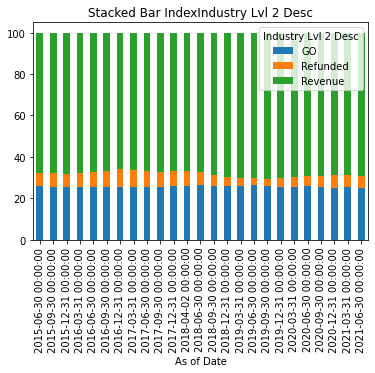

In [ ]:
stacked_plots(ICE_dataset_df_final,ind_lvl = 'Industry Lvl 2 Desc') 

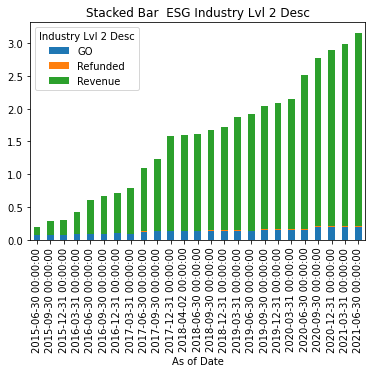

In [ ]:
stacked_plots(ESG_ICE_dataset_df_final, ' ESG ',ind_lvl = 'Industry Lvl 2 Desc')

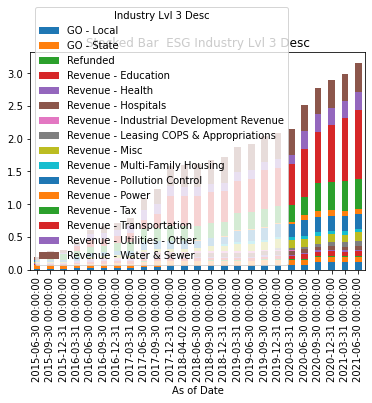

In [ ]:
stacked_plots(ESG_ICE_dataset_df_final,' ESG ',ind_lvl = 'Industry Lvl 3 Desc')

## Liquidity Analysis for Bonds

In [ ]:
ICE_dataset_df_final.head()

Cusip   ISIN number  ...    return % Mkt Value_3mon_prev_next
0  00037CKT  US00037CKT61  ...  0.000183                    0.00366
1  00037CPL  US00037CPL80  ... -0.014533                    0.01285
2  00037CPY  US00037CPY02  ... -0.005926                    0.00451
3  00037CQP  US00037CQP85  ... -0.004763                    0.00386
4  00037CRG  US00037CRG77  ... -0.004241                    0.00567

[5 rows x 50 columns]

In [ ]:
ICE_dataset_df_final.reset_index(drop=True,inplace=True)
ESG_ICE_dataset_df_final.reset_index(drop=True,inplace=True)

In [ ]:
def diff_org_years(x):
  if(0<=x<10):
    return '1-10'
  elif(10<=x<15):
    return '10-15'
  elif(15<=x<20):
    return '15-20'
  elif(20<=x<25):
    return '20-25'
  elif(25<=x<30):
    return '25-30'
  elif(30<=x<35):
    return '30-35'
  elif(35<=x<40):
    return '35-40'
  elif(40<=x<45):
    return '40-45'
  elif(45<=x<50):
    return '45-50'
  elif(50<=x<55):
    return '50-55'

def liquidity_analysis(data):
  data['Diff_years'] = (data['Maturity Date'] -  data['As of Date'])/365 
  data['Diff_years'] = data['Diff_years'].dt.days 
  data['Diff_years_interval'] = data['Diff_years'].apply(lambda x : diff_org_years(x)) 
  data['Maturty_time_weight'] = data['% Mkt Value']*data['Diff_years'] 
  data_grp_interval_sum = data[data['As of Date']==data['As of Date'][0]].groupby(['Diff_years_interval']).sum() 
  print(data_grp_interval_sum.loc[:,['% Mkt Value','Face Value_LOC','Maturty_time_weight']]) 

liquidity_analysis(ICE_dataset_df_final)
liquidity_analysis(ESG_ICE_dataset_df_final)

                     % Mkt Value  Face Value_LOC  Maturty_time_weight
Diff_years_interval                                                  
1-10                    38.08076      314882.545            167.85181
10-15                   13.61649      114194.655            163.46028
15-20                   14.43843      125207.625            245.08171
20-25                   17.52368      153947.925            387.90149
25-30                   12.26522      112397.443            329.66556
30-35                    3.10057       32686.414             97.48872
35-40                    0.91925        9469.820             33.95623
40-45                    0.04277         363.725              1.74218
                     % Mkt Value  Face Value_LOC  Maturty_time_weight
Diff_years_interval                                                  
1-10                     0.05674          433.52              0.40769
10-15                    0.03144          261.26              0.42005
15-20               

In [ ]:
ESG_ICE_dataset_df_final['Rating']

0       AA3
1        A1
2        A1
3        A1
4        A1
       ... 
7463    AA2
7464    AA2
7465    AA2
7466    AAA
7467    AAA
Name: Rating, Length: 7468, dtype: object

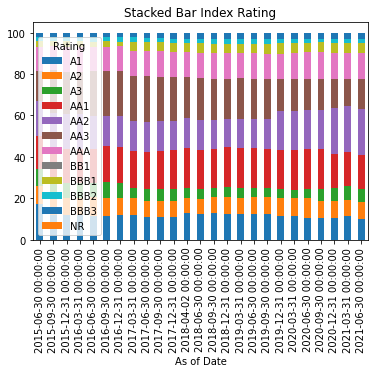

In [ ]:
stacked_plots(ICE_dataset_df_final,label = 'Index ',ind_lvl='Rating')

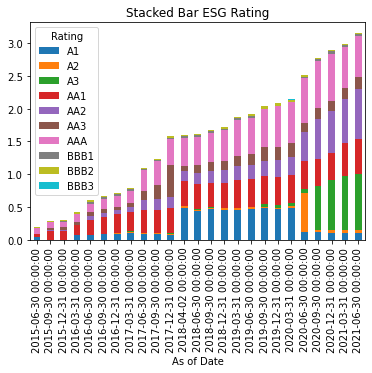

In [ ]:
stacked_plots(ESG_ICE_dataset_df_final,label = 'ESG ', ind_lvl='Rating')

In [ ]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 

ICE_dataset_df_final_merged_factor = ICE_dataset_df_final.copy() 
ICE_dataset_df_final_merged_factor_qualitative = ICE_dataset_df_final_merged_factor[['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating']] 

one_hot_encoder = OneHotEncoder(sparse = False) 

ICE_dataset_df_final_merged_factor_qualitative_final = pd.DataFrame() 

for i in ICE_dataset_df_final_merged_factor_qualitative.columns: 
  # ICE_dataset_df_final_merged_factor_qualitative[[i]] 
  Test_df_encoded = ICE_dataset_df_final_merged_factor_qualitative[[i]].copy()
  one_hot_encoder.fit(Test_df_encoded) 
  Test_df_encoded = one_hot_encoder.transform(Test_df_encoded) 
  Test_df_encoded = pd.DataFrame(data=Test_df_encoded, columns=one_hot_encoder.categories_) 
  print('\nAfter One Hot Encoding:') 
  display(Test_df_encoded) 
  ICE_dataset_df_final_merged_factor_qualitative_final = pd.concat([ICE_dataset_df_final_merged_factor_qualitative_final, Test_df_encoded], axis=1) 
ICE_dataset_df_final_merged_factor_qualitative_final = pd.DataFrame(data = np.array(ICE_dataset_df_final_merged_factor_qualitative_final),columns = ICE_dataset_df_final_merged_factor_qualitative_final.columns.get_level_values(0)) 
ICE_dataset_df_final_merged_factor_qualitative_final.head() 

ICE_dataset_df_final_merged_factor_drop_cols = ICE_dataset_df_final_merged_factor.drop(['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'], axis = 1).copy() 

# ICE_dataset_df_final_merged_factor.drop(['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'], axis = 1) 
# del ICE_dataset_df_final_merged_factor['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'] 

ICE_dataset_df_final_merged_factor_updated = pd.concat([ICE_dataset_df_final_merged_factor_qualitative_final,ICE_dataset_df_final_merged_factor_drop_cols], axis = 1) 
ICE_dataset_df_final_merged_factor_updated.tail() 

ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop( ['Subordination Type', 'Muni Issuer Name'], axis = 1)
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop(['Cusip',	'ISIN number',	'Description',	'Ticker',	'Par Wtd Coupon',	'Maturity Date',	'ISO Currency Code',	'ISO Country Code',	'Industry Lvl 1 Desc',	'Industry Lvl 2 Desc',	'Industry Lvl 3 Desc','As of Date',	'AMT Status',	'Muni Insured',	'Cusip9',	
                                                                                              'Muni Conduit Obligor Name'], axis = 1)

# Removing Nan Columns 
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop(['OAS', 'OAS MTD Change', 'Asset Swap Spread', 'Asset Swap MTD Chg'], axis = 1)

# checking for Nan values
df = ICE_dataset_df_final_merged_factor_updated.copy()

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = ['% MktVal-PrevMend','Total Return % MTD_LOC','Excess Return % MTD','Total Return % 3-mo_LOC','% Mkt Value_3mon_prev','Diff_years_interval']
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop(columns_with_nan,axis=1)



After One Hot Encoding:


Cigarette tax Double barreled  ... Tobacco state appropriated Unlimited G.O.
0                0.0             0.0  ...                        0.0            0.0
1                0.0             0.0  ...                        0.0            0.0
2                0.0             0.0  ...                        0.0            0.0
3                0.0             0.0  ...                        0.0            0.0
4                0.0             0.0  ...                        0.0            0.0
...              ...             ...  ...                        ...            ...
447672           0.0             0.0  ...                        0.0            1.0
447673           0.0             0.0  ...                        0.0            1.0
447674           0.0             0.0  ...                        0.0            1.0
447675           0.0             0.0  ...                        0.0            1.0
447676           0.0             0.0  ...                        0.0            1.0

[447677 rows x 17 columns]


After One Hot Encoding:


GO  REV
0       0.0  1.0
1       0.0  1.0
2       0.0  1.0
3       0.0  1.0
4       0.0  1.0
...     ...  ...
447672  1.0  0.0
447673  1.0  0.0
447674  1.0  0.0
447675  1.0  0.0
447676  1.0  0.0

[447677 rows x 2 columns]


After One Hot Encoding:


AK   AL   AR   AZ   CA   CO   CT  ...   VA   VI   VT   WA   WI   WV   WY
0       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
447672  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447673  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447674  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447675  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447676  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[447677 rows x 54 columns]


After One Hot Encoding:


AIRP  EDU GOLC GOST HLTH HOSP  IDR  ... SHNG TAXR  TOB TOLL TRAN UTIL WATR
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
447672  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447673  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447674  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447675  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
447676  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[447677 rows x 19 columns]


After One Hot Encoding:


ETM GO - Local  ... Revenue - Utilities - Other Revenue - Water & Sewer
0       0.0        0.0  ...                         0.0                     0.0
1       0.0        0.0  ...                         0.0                     0.0
2       0.0        0.0  ...                         0.0                     0.0
3       0.0        0.0  ...                         0.0                     0.0
4       0.0        0.0  ...                         0.0                     0.0
...     ...        ...  ...                         ...                     ...
447672  0.0        0.0  ...                         0.0                     0.0
447673  0.0        1.0  ...                         0.0                     0.0
447674  0.0        1.0  ...                         0.0                     0.0
447675  0.0        1.0  ...                         0.0                     0.0
447676  0.0        1.0  ...                         0.0                     0.0

[447677 rows x 21 columns]


After One Hot Encoding:


A1   A2   A3  AA1  AA2  AA3  AAA  BB1 BBB1 BBB2 BBB3   NR
0       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
447672  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447673  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447674  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447675  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
447676  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0

[447677 rows x 12 columns]

In [ ]:
import statsmodels.api as sm # import statsmodels 

ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated[~ICE_dataset_df_final_merged_factor_updated['return'].isna()].copy()
ICE_dataset_df_final_merged_factor_updated.reset_index(drop = True, inplace = True) 

y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
predictions = model.predict(X) 

# Print out the statistics 
print(model.summary())

X.corr()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

Feature: 0, Score: -0.00213
Feature: 1, Score: -0.00153
Feature: 2, Score: 0.00001
Feature: 3, Score: -0.00013
Feature: 4, Score: -0.00033
Feature: 5, Score: 0.00048
Feature: 6, Score: -0.00107
Feature: 7, Score: 0.00107
Feature: 8, Score: 0.00018
Feature: 9, Score: -0.00291
Feature: 10, Score: 0.00041
Feature: 11, Score: -0.00009
Feature: 12, Score: -0.00020
Feature: 13, Score: 0.00099
Feature: 14, Score: 0.00285
Feature: 15, Score: 0.00377
Feature: 16, Score: -0.00138
Feature: 17, Score: 0.00113
Feature: 18, Score: -0.00113
Feature: 19, Score: 0.00036
Feature: 20, Score: 0.00021
Feature: 21, Score: -0.00022
Feature: 22, Score: -0.00031
Feature: 23, Score: -0.00136
Feature: 24, Score: -0.00033
Feature: 25, Score: 0.00021
Feature: 26, Score: -0.00049
Feature: 27, Score: -0.00038
Feature: 28, Score: 0.00001
Feature: 29, Score: -0.00040
Feature: 30, Score: -0.00043
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00009
Feature: 33, Score: -0.00024
Feature: 34, Score: 0.00263
Feature: 35

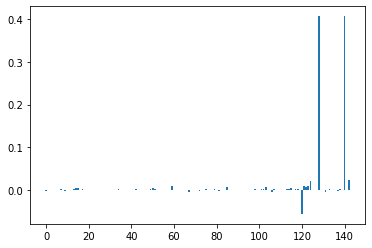

Least_important features: Index(['BB1', 'Revenue - Single Family Housing', 'VI', 'Yield to Worst (s.a.)',
       'WY', 'Pilot', 'MHNG', 'Convexity to Worst (s.a.)', 'Cigarette tax',
       'MT'],
      dtype='object')
Most_important features: Index(['Revenue - Multi-Family Housing', 'SHNG', 'BBB2', 'BBB1', 'BBB3', 'PR',
       'NR', 'Maturty_time_weight', '% Mkt Value_3mon_prev_next',
       '% Mkt Value'],
      dtype='object')
0.13650130698794416 0.1362133411829789


In [ ]:
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot 

model = LinearRegression() 
y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 

# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show() 

# Selecting top 10 and bottom 10 features 
Impor_Series = pd.Series(data = importance) 

list_index_least_imp = list(Impor_Series.sort_values()[:10].index) 
list_index_most_imp = list(Impor_Series.sort_values()[-10:].index) 

print("Least_important features:",X.columns[list_index_least_imp]) 
print("Most_important features:",X.columns[list_index_most_imp]) 


yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared) 

In [ ]:
ICE_dataset_df_final_merged_factor_updated.columns

Index(['Cigarette tax', 'Double barreled', 'Federal grant', 'Fuel/vehicle tax',
       'Hotel tax', 'Lease-rental', 'Limited G.O.', 'Miscellaneous tax',
       'Personal income tax', 'Pilot',
       ...
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Total Return Index Value _LOC', 'return', '% Mkt Value_3mon_prev_next',
       'Diff_years', 'Maturty_time_weight'],
      dtype='object', length=144)

In [ ]:
ESG_ICE_dataset_df.head() 

Cusip   ISIN number  ... Muni Security Type Muni Conduit Obligor Name
0  04048RLS  US04048RLS30  ...            Revenue                       NaN
1  13063CNP  US13063CNP13  ...     Unlimited G.O.                       NaN
2  13063CNQ  US13063CNQ95  ...     Unlimited G.O.                       NaN
3  13063CNR  US13063CNR78  ...     Unlimited G.O.                       NaN
4  13063CNS  US13063CNS51  ...     Unlimited G.O.                       NaN

[5 rows x 47 columns]

In [ ]:
## Creating Quarterly Index returns 



In [ ]:
# shifting the data for entire period 
# adding all the data
#Length_to_shift =

shift_main = ICE_dataset_df_groupby['Cusip'][0] 
shift_ESG = ESG_ICE_dataset_df_groupby['Cusip'][0]

In [ ]:
ICE_dataset_df

Cusip  ...               Muni Conduit Obligor Name
0       00037CRW  ...            EPISCOPAL SENIOR COMMUNITIES
1       00037CTL  ...            EPISCOPAL SENIOR COMMUNITIES
2       00037CUQ  ...                       ESKATON PPTYS INC
3       00037CVN  ...  SHARP HEALTHCARE (SAN DIEGO HOSP ASSN)
4       00037GAZ  ...                  ODD FELLOWS HOME OF CA
...          ...  ...                                     ...
125345  97712DKQ  ...                      PROHEALTH CARE INC
125346  982674GW  ...                                     NaN
125347  982674KA  ...                                     NaN
125348  982674KF  ...                                     NaN
125349  987388DH  ...                                     NaN

[125350 rows x 47 columns]

In [ ]:
ICE_dataset_df[['% Mkt Value_Prev','Price_Prev']] = ICE_dataset_df[['% Mkt Value','Price']].shift(shift_main) 
ESG_ICE_dataset_df[['% Mkt Value_Prev','Price_Prev']] = ESG_ICE_dataset_df[['% Mkt Value','Price']].shift(shift_ESG) 

In [ ]:
ICE_dataset_df[['% Mkt Value_Prev','Price_Prev']] 

% Mkt Value_Prev  Price_Prev
0                    NaN         NaN
1                    NaN         NaN
2                    NaN         NaN
3                    NaN         NaN
4                    NaN         NaN
...                  ...         ...
125345           0.00517      111.66
125346           0.00359      106.79
125347           0.00327      110.29
125348           0.00356      112.88
125349           0.00224       82.83

[125350 rows x 2 columns]

In [ ]:
ICE_dataset_df['As of Date_New'] = ICE_dataset_df['As of Date'].shift(shift_main) 
ESG_ICE_dataset_df['As of Date_New'] = ESG_ICE_dataset_df[['As of Date']].shift(shift_ESG) 

In [ ]:
ICE_dataset_df['As of Date_New'].unique()

array([                          'NaT', '2015-06-30T00:00:00.000000000',
       '2015-09-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-03-31T00:00:00.000000000', '2016-06-30T00:00:00.000000000',
       '2016-09-30T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-03-31T00:00:00.000000000', '2017-06-30T00:00:00.000000000',
       '2017-09-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-04-02T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-03-31T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-09-30T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-03-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
ICE_dataset_df['Time_Difference'] = ICE_dataset_df['As of Date'] -  ICE_dataset_df['As of Date_New']
ESG_ICE_dataset_df['Time_Difference'] = ESG_ICE_dataset_df['As of Date'] -  ESG_ICE_dataset_df['As of Date_New']

In [ ]:
ICE_dataset_df['Time_Difference_days'] = ICE_dataset_df['Time_Difference'].dt.days
ESG_ICE_dataset_df['Time_Difference_days'] = ESG_ICE_dataset_df['Time_Difference'].dt.days

In [ ]:
ICE_dataset_df.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

In [ ]:
## Annualized Price of the Values 
ICE_dataset_df_final = ICE_dataset_df.copy() 
ESG_ICE_dataset_df_final = ESG_ICE_dataset_df.copy() 
# ICE_dataset_df_final.dropna(subset=['As of Date_New'],inplace=True) 
# ESG_ICE_dataset_df_final.dropna(subset=['As of Date_New'],inplace=True) 

In [ ]:
ICE_dataset_df_final.reset_index(drop=True,inplace=True)
ESG_ICE_dataset_df_final.reset_index(drop=True,inplace=True)

In [ ]:
ICE_dataset_df_final['Price_Return'] = (ICE_dataset_df_final['Price']  - ICE_dataset_df_final['Price_Prev'])/ICE_dataset_df_final['Price_Prev']
ESG_ICE_dataset_df_final['Price_Return'] = (ESG_ICE_dataset_df_final['Price']  - ESG_ICE_dataset_df_final['Price_Prev'])/ESG_ICE_dataset_df_final['Price_Prev']

In [ ]:
ICE_dataset_df_final['Time_Difference_days']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
125345    91.0
125346    91.0
125347    91.0
125348    91.0
125349    91.0
Name: Time_Difference_days, Length: 125350, dtype: float64

In [ ]:
ESG_ICE_dataset_df_final['Time_Difference_days']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
795    91.0
796    91.0
797    91.0
798    91.0
799    91.0
Name: Time_Difference_days, Length: 800, dtype: float64

In [ ]:
ICE_dataset_df_final['Price_Return_ann'] = np.power(1+ICE_dataset_df_final['Price_Return'],365/ICE_dataset_df_final['Time_Difference_days'])-1
ESG_ICE_dataset_df_final['Price_Return_ann'] = np.power(1+ESG_ICE_dataset_df_final['Price_Return'],365/ESG_ICE_dataset_df_final['Time_Difference_days'])-1

In [ ]:
ICE_dataset_Mkt_Value_Prev_factor = 100/ICE_dataset_df_final.groupby(['As of Date'])['% Mkt Value_Prev'].sum() 

ICE_dataset_Mkt_Value_Prev_factor = pd.DataFrame(ICE_dataset_Mkt_Value_Prev_factor).reset_index() 

ICE_dataset_Mkt_Value_Prev_factor.rename(columns={"As of Date":"As of Date","% Mkt Value_Prev": "% Mkt_Value_Prev_factor"},inplace=True) 

In [ ]:
ICE_dataset_Mkt_Value_Prev_factor.head()

As of Date  % Mkt_Value_Prev_factor
0 2015-06-30                      inf
1 2015-09-30                 3.052150
2 2015-12-31                 3.008207
3 2016-03-31                 2.988407
4 2016-06-30                 2.982782

In [ ]:
ESG_ICE_dataset_Mkt_Value_Prev_factor = 100/ESG_ICE_dataset_df_final.groupby(['As of Date'])['% Mkt Value_Prev'].sum()
ESG_ICE_dataset_Mkt_Value_Prev_factor = pd.DataFrame(ESG_ICE_dataset_Mkt_Value_Prev_factor).reset_index()
ESG_ICE_dataset_Mkt_Value_Prev_factor.rename(columns={"As of Date":"As of Date","% Mkt Value_Prev": "% Mkt_Value_Prev_factor"},inplace=True)

In [ ]:
ESG_ICE_dataset_Mkt_Value_Prev_factor.head()

As of Date  % Mkt_Value_Prev_factor
0 2015-06-30                      inf
1 2015-09-30               559.065243
2 2015-12-31               551.055271
3 2016-03-31               547.315418
4 2016-06-30               548.998079

In [ ]:
# To keep the data
ICE_dataset_df_final.to_csv('ICE_dataset_df_final.csv')

In [ ]:
from google.colab import files
files.download("ICE_dataset_df_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

ICE_dataset_df_final['%wt_Return_Prev'] = ICE_dataset_df_final['% Mkt Value_Prev']*ICE_dataset_df_final['Price_Return'] 
ESG_ICE_dataset_df_final['%wt_Return_Prev'] = ESG_ICE_dataset_df_final['% Mkt Value_Prev']*ESG_ICE_dataset_df_final['Price_Return'] 

# Creating Index return for securities and then categorize them

In [ ]:
ICE_dataset_df_final = pd.read_csv('ICE_dataset_df_final.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ICE_dataset_Mkt_Value_Prev_factor = 100/ICE_dataset_df_final.groupby(['As of Date'])['% Mkt Value_Prev'].sum() 
ICE_dataset_Mkt_Value_Prev_factor = pd.DataFrame(ICE_dataset_Mkt_Value_Prev_factor).reset_index() 
ICE_dataset_Mkt_Value_Prev_factor.rename(columns={"As of Date":"As of Date","% Mkt Value_Prev": "% Mkt_Value_Prev_factor"},inplace=True) 

In [ ]:
ICE_dataset_Mkt_Value_Prev_factor.head() 
ICE_dataset_df_final.columns 
ICE_dataset_df_final_merged_factor = pd.merge(ICE_dataset_df_final, ICE_dataset_Mkt_Value_Prev_factor, on = 'As of Date') 
ICE_dataset_df_final_merged_factor.columns 

# Now let's create the Index
ICE_dataset_df_final_merged_factor['Price_return_times_wght'] = ICE_dataset_df_final_merged_factor['% Mkt_Value_Prev_factor']*ICE_dataset_df_final_merged_factor['% Mkt Value_Prev']*ICE_dataset_df_final_merged_factor['Price_Return'] 
ICE_dataset_df_final_merged_factor['Price_return_times_wght_annual'] = ICE_dataset_df_final_merged_factor['% Mkt_Value_Prev_factor']*ICE_dataset_df_final_merged_factor['% Mkt Value_Prev']*ICE_dataset_df_final_merged_factor['Price_Return_ann'] 

ICE_dataset_df_final_merged_factor_return_group = ICE_dataset_df_final_merged_factor.groupby(['As of Date'])['Price_return_times_wght','Price_return_times_wght_annual'].sum()

ICE_dataset_df_final_merged_factor_return_group_cumsum = ICE_dataset_df_final_merged_factor_return_group.cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
ICE_dataset_df_final_merged_factor_return_group

Price_return_times_wght  Price_return_times_wght_annual
As of Date                                                         
2015-06-30                 0.000000                        0.000000
2015-09-30                 1.576654                        6.514963
2015-12-31                 1.997594                        8.340140
2016-03-31                 1.452451                        6.083643
2016-06-30                 3.443783                       15.031504
2016-09-30                -1.450789                       -5.529787
2016-12-31                -6.244833                      -22.298873
2017-03-31                 0.406122                        1.731782
2017-06-30                 1.703992                        7.128552
2017-09-30                 0.590285                        2.560509
2017-12-31                -0.067848                       -0.052410
2018-04-02                -2.541022                       -9.621487
2018-06-30                -0.051930                       -0.174192
2018-09-30                -1.200950                       -4.643609
2018-12-31                 0.464123                        1.935009
2019-03-31                 1.841065                        7.910494
2019-06-30                 1.328723                        5.634516
2019-09-30                 0.526398                        2.241218
2019-12-31                -0.285939                       -1.109829
2020-03-31                -1.575818                       -5.877238
2020-06-30                 1.197280                        5.170389
2020-09-30                 0.312801                        1.388116
2020-12-31                 0.370503                        1.815635
2021-03-31                -0.950598                       -3.706981
2021-06-30                -0.101822                       -0.241137

In [ ]:
ICE_dataset_df_final_merged_factor_return_group_cumsum

Price_return_times_wght  Price_return_times_wght_annual
As of Date                                                         
2015-06-30                 0.000000                        0.000000
2015-09-30                 1.576654                        6.514963
2015-12-31                 3.574248                       14.855103
2016-03-31                 5.026699                       20.938745
2016-06-30                 8.470481                       35.970249
2016-09-30                 7.019692                       30.440462
2016-12-31                 0.774859                        8.141589
2017-03-31                 1.180981                        9.873371
2017-06-30                 2.884973                       17.001923
2017-09-30                 3.475258                       19.562432
2017-12-31                 3.407411                       19.510022
2018-04-02                 0.866389                        9.888535
2018-06-30                 0.814459                        9.714343
2018-09-30                -0.386491                        5.070734
2018-12-31                 0.077632                        7.005743
2019-03-31                 1.918697                       14.916237
2019-06-30                 3.247420                       20.550753
2019-09-30                 3.773818                       22.791971
2019-12-31                 3.487878                       21.682142
2020-03-31                 1.912060                       15.804904
2020-06-30                 3.109340                       20.975293
2020-09-30                 3.422140                       22.363409
2020-12-31                 3.792643                       24.179045
2021-03-31                 2.842045                       20.472063
2021-06-30                 2.740223                       20.230926

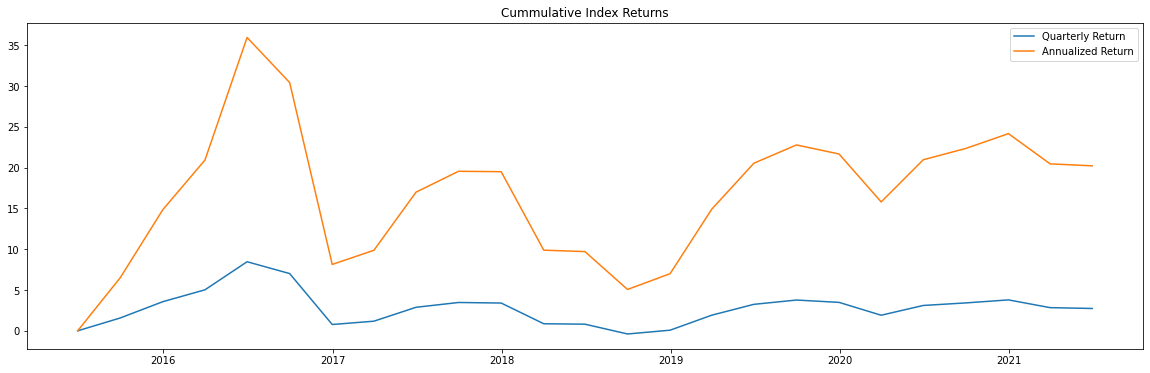

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1, figsize=(20, 6)) 

ax.plot(ICE_dataset_df_final_merged_factor_return_group_cumsum.index, ICE_dataset_df_final_merged_factor_return_group_cumsum['Price_return_times_wght'],label = "Quarterly Return") 
ax.plot(ICE_dataset_df_final_merged_factor_return_group_cumsum.index, ICE_dataset_df_final_merged_factor_return_group_cumsum['Price_return_times_wght_annual'],label = "Annualized Return") 
ax.set_title('Cummulative Index Returns')
plt.legend()
plt.show()


In [ ]:
#CUSIP_list
ESG_ICE_dataset_df = ICE_dataset_df_final_merged_factor[ICE_dataset_df_final_merged_factor['Cusip'].isin(CUSIP_list)].copy() 

ESG_ICE_dataset_Mkt_Value_Prev_factor = 100/ESG_ICE_dataset_df.groupby(['As of Date'])['% Mkt Value_Prev'].sum() 

ESG_ICE_dataset_Mkt_Value_Prev_factor = pd.DataFrame(ESG_ICE_dataset_Mkt_Value_Prev_factor).reset_index() 

ESG_ICE_dataset_Mkt_Value_Prev_factor.rename(columns={"As of Date":"As of Date","% Mkt Value_Prev": "% Mkt_Value_Prev_factor"},inplace=True) 

In [ ]:
ESG_ICE_dataset_df

Cusip  ... Price_return_times_wght_annual
76      04048RLS  ...                            NaN
444     13063CNP  ...                            NaN
445     13063CNQ  ...                            NaN
446     13063CNR  ...                            NaN
447     13063CNS  ...                            NaN
...          ...  ...                            ...
123925  67766WVN  ...                      -0.000570
123926  67766WVP  ...                      -0.000554
123927  67766WVQ  ...                      -0.000548
125023  915217WF  ...                       0.000176
125024  915217WG  ...                       0.000097

[800 rows x 57 columns]

In [ ]:
ESG_ICE_dataset_Mkt_Value_Prev_factor.head() 
ESG_ICE_dataset_df_final_merged_factor = pd.merge(ESG_ICE_dataset_df_final, ESG_ICE_dataset_Mkt_Value_Prev_factor, on = 'As of Date') 
ESG_ICE_dataset_df_final_merged_factor.columns 

# Now let's create the Index
ESG_ICE_dataset_df_final_merged_factor['Price_return_times_wght'] = ESG_ICE_dataset_df_final_merged_factor['% Mkt_Value_Prev_factor']*ESG_ICE_dataset_df_final_merged_factor['% Mkt Value_Prev']*ESG_ICE_dataset_df_final_merged_factor['Price_Return'] 
ESG_ICE_dataset_df_final_merged_factor['Price_return_times_wght_annual'] = ESG_ICE_dataset_df_final_merged_factor['% Mkt_Value_Prev_factor']*ESG_ICE_dataset_df_final_merged_factor['% Mkt Value_Prev']*ESG_ICE_dataset_df_final_merged_factor['Price_Return_ann'] 

ESG_ICE_dataset_df_final_merged_factor_return_group = ESG_ICE_dataset_df_final_merged_factor.groupby(['As of Date'])['Price_return_times_wght','Price_return_times_wght_annual'].sum() 

ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum = ESG_ICE_dataset_df_final_merged_factor_return_group.cumsum() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


In [ ]:
ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum 

Price_return_times_wght  Price_return_times_wght_annual
As of Date                                                         
2015-06-30                 0.000000                        0.000000
2015-09-30                 1.770689                        7.234263
2015-12-31                 3.552355                       14.525520
2016-03-31                 4.716570                       19.305335
2016-06-30                 7.967977                       33.184050
2016-09-30                 6.279257                       26.676052
2016-12-31                 0.193886                        4.713456
2017-03-31                 0.411359                        5.625399
2017-06-30                 2.118844                       12.705437
2017-09-30                 2.063537                       12.498220
2017-12-31                 2.264226                       13.479507
2018-04-02                -0.167923                        4.208006
2018-06-30                -0.320856                        3.598350
2018-09-30                -1.562787                       -1.214679
2018-12-31                -1.169150                        0.371266
2019-03-31                 0.254982                        6.331250
2019-06-30                 1.504507                       11.481620
2019-09-30                 1.940445                       13.276799
2019-12-31                 1.653301                       12.149578
2020-03-31                 0.693865                        8.391105
2020-06-30                 1.743585                       12.729076
2020-09-30                 1.818980                       13.068854
2020-12-31                 1.866596                       13.335718
2021-03-31                 0.884603                        9.442380
2021-06-30                 0.611899                        8.396073

In [ ]:
ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum

Price_return_times_wght  Price_return_times_wght_annual
As of Date                                                         
2015-06-30                 0.000000                        0.000000
2015-09-30                 1.770689                        7.234263
2015-12-31                 3.552355                       14.525520
2016-03-31                 4.716570                       19.305335
2016-06-30                 7.967977                       33.184050
2016-09-30                 6.279257                       26.676052
2016-12-31                 0.193886                        4.713456
2017-03-31                 0.411359                        5.625399
2017-06-30                 2.118844                       12.705437
2017-09-30                 2.063537                       12.498220
2017-12-31                 2.264226                       13.479507
2018-04-02                -0.167923                        4.208006
2018-06-30                -0.320856                        3.598350
2018-09-30                -1.562787                       -1.214679
2018-12-31                -1.169150                        0.371266
2019-03-31                 0.254982                        6.331250
2019-06-30                 1.504507                       11.481620
2019-09-30                 1.940445                       13.276799
2019-12-31                 1.653301                       12.149578
2020-03-31                 0.693865                        8.391105
2020-06-30                 1.743585                       12.729076
2020-09-30                 1.818980                       13.068854
2020-12-31                 1.866596                       13.335718
2021-03-31                 0.884603                        9.442380
2021-06-30                 0.611899                        8.396073

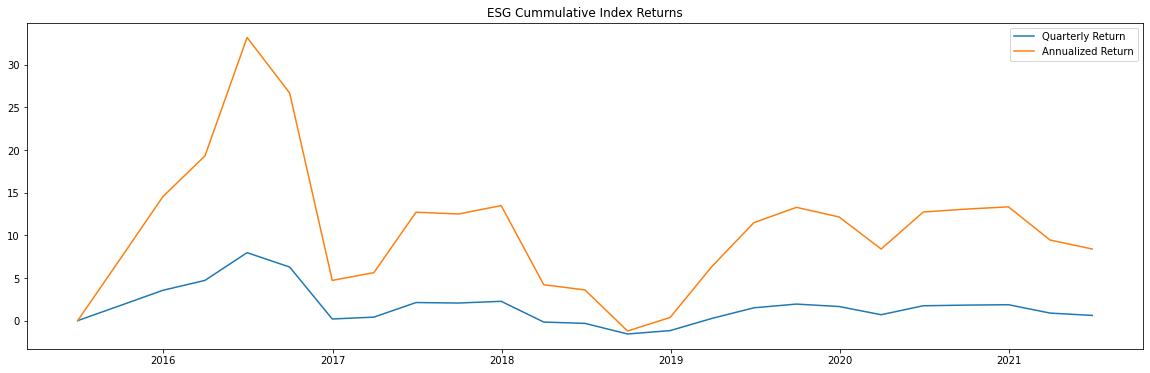

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax.plot(ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum.index, ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum['Price_return_times_wght'],label = "Quarterly Return")
ax.plot(ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum.index, ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum['Price_return_times_wght_annual'],label = "Annualized Return")
ax.set_title('ESG Cummulative Index Returns')
plt.legend()
plt.show()


In [ ]:
ESG_ICE_dataset_df_final_merged_factor.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

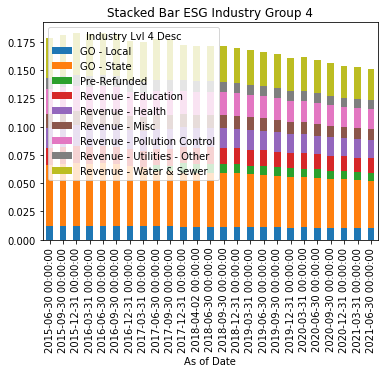

In [ ]:
# ESG Weight Group Industry 4

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt = ESG_ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 4 Desc','% Mkt Value']].copy() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt.groupby(['As of Date','Industry Lvl 4 Desc']).sum() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.reset_index( level = [0,1]) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp['Industry Lvl 4 Desc'].unique() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.columns 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.set_index(['As of Date', 'Industry Lvl 4 Desc']).unstack(['Industry Lvl 4 Desc']) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reindex(columns=sorted(ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns, key=lambda x: x[::-1])) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns.droplevel() 
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reset_index(inplace = True) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar ESG Industry Group 4') 

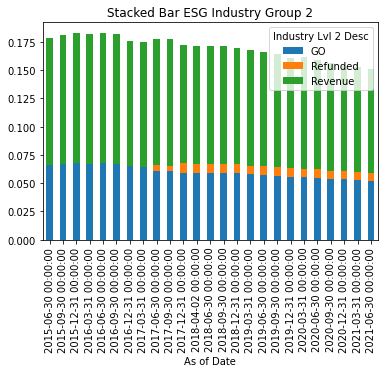

In [ ]:
# ESG Weight Group Industry 2

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt = ESG_ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 2 Desc','% Mkt Value']].copy() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt.groupby(['As of Date','Industry Lvl 2 Desc']).sum() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.reset_index( level = [0,1]) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp['Industry Lvl 2 Desc'].unique() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.columns 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.set_index(['As of Date', 'Industry Lvl 2 Desc']).unstack(['Industry Lvl 2 Desc']) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reindex(columns=sorted(ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns, key=lambda x: x[::-1])) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns.droplevel() 
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reset_index(inplace = True) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar ESG Industry Group 2') 

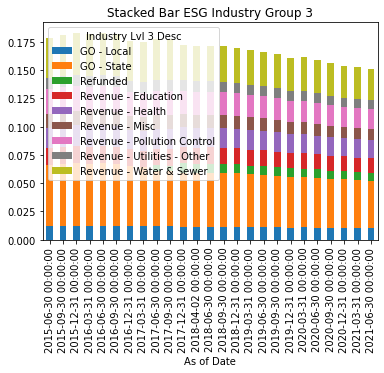

In [ ]:
# ESG Weight Group Industry 3

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt = ESG_ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 3 Desc','% Mkt Value']].copy() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt.groupby(['As of Date','Industry Lvl 3 Desc']).sum() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.reset_index( level = [0,1]) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp['Industry Lvl 3 Desc'].unique() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.columns 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.set_index(['As of Date', 'Industry Lvl 3 Desc']).unstack(['Industry Lvl 3 Desc']) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reindex(columns=sorted(ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns, key=lambda x: x[::-1])) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns.droplevel() 
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reset_index(inplace = True) 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar ESG Industry Group 3') 

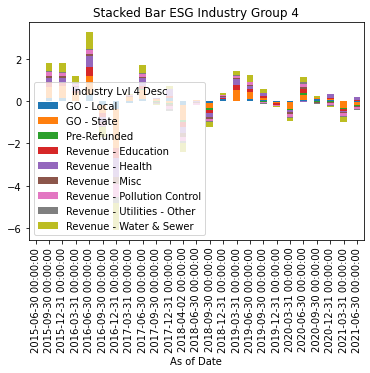

In [ ]:
# for Plots
ESG_ICE_dataset_df_final_merged_factor_return_group_cumsum.columns

# for plots level 4
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret = ESG_ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 4 Desc','Price_return_times_wght']].copy() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret.groupby(['As of Date','Industry Lvl 4 Desc']).sum() 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.reset_index( level = [0,1] )

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp['Industry Lvl 4 Desc'].unique()

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.columns

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.set_index(['As of Date', 'Industry Lvl 4 Desc']).unstack(['Industry Lvl 4 Desc'])

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reindex(columns=sorted(ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns, key=lambda x: x[::-1]))

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns.droplevel()
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reset_index(inplace = True)

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar ESG Industry Group 4')


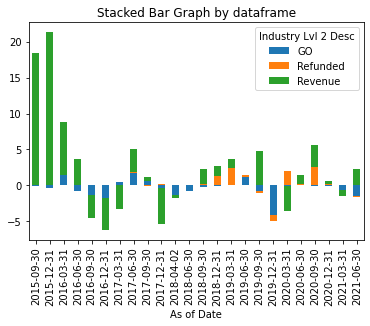

In [ ]:
### 2 

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_1 = ESG_ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 2 Desc','Price_return_times_wght']].copy()

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_1 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_1.groupby(['As of Date','Industry Lvl 2 Desc']).sum()

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_1 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_1.reset_index( level = [0,1] )

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_1['Industry Lvl 2 Desc'].unique()

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_1.columns

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_1.set_index(['As of Date', 'Industry Lvl 2 Desc']).unstack(['Industry Lvl 2 Desc'])

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1.reindex(columns=sorted(ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1.columns, key=lambda x: x[::-1]))

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1.columns = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1.columns.droplevel()
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1.reset_index(inplace = True)

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_1.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar ESG Industry Group 2')

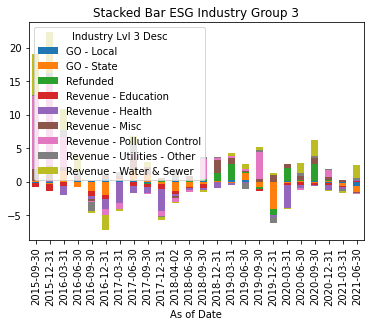

In [ ]:
# ESG Column 3
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_2 = ESG_ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 3 Desc','Price_return_times_wght']].copy()

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_2 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_2.groupby(['As of Date','Industry Lvl 3 Desc']).sum()

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_2 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_2.reset_index( level = [0,1] )

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_2['Industry Lvl 3 Desc'].unique()

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_2.columns

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_2.set_index(['As of Date', 'Industry Lvl 3 Desc']).unstack(['Industry Lvl 3 Desc'])

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2 = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2.reindex(columns=sorted(ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2.columns, key=lambda x: x[::-1]))

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2.columns = ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2.columns.droplevel()
ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2.reset_index(inplace = True)

ESG_ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked_2.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar ESG Industry Group 3')

## Liquidity Analysis for ESG Bonds

In [ ]:
ESG_ICE_dataset_df_final_merged_factor.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

In [ ]:
# import statsmodels.api as sm # import statsmodels 

# ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated[~ICE_dataset_df_final_merged_factor_updated['return'].isna()].copy()
# ICE_dataset_df_final_merged_factor_updated.reset_index(drop = True, inplace = True) 

# y = ICE_dataset_df_final_merged_factor_updated['return'] ## Y usually means our output/dependent variable 
# X = ICE_dataset_df_final_merged_factor_updated.drop(['return'], axis = 1) 
# # X = ICE_dataset_df_final_merged_factor_updated[] 
# #X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# # Note the difference in argument order 
# model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# predictions = model.predict(X) 

# # Print out the statistics 
# print(model.summary())

# X.corr()

ESG_ICE_dataset_df_final_merged_factor['Diff_years'] = (ESG_ICE_dataset_df_final_merged_factor['Maturity Date'] -  ESG_ICE_dataset_df_final_merged_factor['As of Date'])/365 
ESG_ICE_dataset_df_final_merged_factor['Diff_years'] = ESG_ICE_dataset_df_final_merged_factor['Diff_years'].dt.days 

def diff_org_years(x):
  if(0<=x<10):
    return '1-10'
  elif(10<=x<15):
    return '10-15'
  elif(15<=x<20):
    return '15-20'
  elif(20<=x<25):
    return '20-25'
  elif(25<=x<30):
    return '25-30'
  elif(30<=x<35):
    return '30-35'
  elif(35<=x<40):
    return '35-40'
  elif(40<=x<45):
    return '40-45'
  elif(45<=x<50):
    return '45-50'
  elif(50<=x<55):
    return '50-55'

ESG_ICE_dataset_df_final_merged_factor['Diff_years_interval'] = ESG_ICE_dataset_df_final_merged_factor['Diff_years'].apply(lambda x : diff_org_years(x)) 


In [ ]:
ESG_ICE_dataset_df_final_merged_factor['As of Date']

0     2015-06-30
1     2015-06-30
2     2015-06-30
3     2015-06-30
4     2015-06-30
         ...    
795   2021-06-30
796   2021-06-30
797   2021-06-30
798   2021-06-30
799   2021-06-30
Name: As of Date, Length: 800, dtype: datetime64[ns]

In [ ]:
ESG_ICE_dataset_df_final_merged_factor_grp_interval_sum = ESG_ICE_dataset_df_final_merged_factor[ESG_ICE_dataset_df_final_merged_factor['As of Date']==ESG_ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Diff_years_interval']).sum() 

ESG_ICE_dataset_df_final_merged_factor_grp_interval_sum.loc[:,['% Mkt Value','Face Value_LOC']]

% Mkt Value  Face Value_LOC
Diff_years_interval                             
1-10                     0.04021          305.52
10-15                    0.03144          261.26
15-20                    0.00973           77.41
20-25                    0.02314          200.00
25-30                    0.06849          582.42
30-35                    0.00586           56.26

In [ ]:
ESG_ICE_dataset_df_final_merged_factor_grp_interval_count = ESG_ICE_dataset_df_final_merged_factor[ESG_ICE_dataset_df_final_merged_factor['As of Date']==ESG_ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Industry Lvl 3 Desc']).count() 
ESG_ICE_dataset_df_final_merged_factor_grp_interval_count.loc[:,['% Mkt Value','Face Value_LOC']]

% Mkt Value  Face Value_LOC
Industry Lvl 3 Desc                                     
GO - Local                             1               1
GO - State                             8               8
Revenue - Education                    3               3
Revenue - Health                       2               2
Revenue - Misc                         3               3
Revenue - Pollution Control            4               4
Revenue - Utilities - Other            3               3
Revenue - Water & Sewer                8               8

In [ ]:
ESG_ICE_dataset_df_final_merged_factor_grp_interval_sum = ESG_ICE_dataset_df_final_merged_factor[ESG_ICE_dataset_df_final_merged_factor['As of Date'] == ESG_ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Industry Lvl 3 Desc']).sum() 
ESG_ICE_dataset_df_final_merged_factor_grp_interval_sum.loc[:,['% Mkt Value','Face Value_LOC']] 

% Mkt Value  Face Value_LOC
Industry Lvl 3 Desc                                     
GO - Local                       0.01197         100.000
GO - State                       0.05443         452.670
Revenue - Education              0.01452         126.095
Revenue - Health                 0.01768         158.155
Revenue - Misc                   0.01235          93.585
Revenue - Pollution Control      0.02197         177.800
Revenue - Utilities - Other      0.01020          76.925
Revenue - Water & Sewer          0.03575         297.640

In [ ]:
ESG_ICE_dataset_df_final_merged_factor['Maturty_time_weight'] = ESG_ICE_dataset_df_final_merged_factor['% Mkt Value']*ESG_ICE_dataset_df_final_merged_factor['Diff_years'] 

ESG_ICE_dataset_df_final_merged_factor_grp_interval_sum = ESG_ICE_dataset_df_final_merged_factor[ESG_ICE_dataset_df_final_merged_factor['As of Date'] == ESG_ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Industry Lvl 3 Desc']).sum()

ESG_ICE_dataset_df_final_merged_factor_grp_interval_sum.loc[:,['Maturty_time_weight','Face Value_LOC','% Mkt Value']] 

Maturty_time_weight  Face Value_LOC  % Mkt Value
Industry Lvl 3 Desc                                                          
GO - Local                               0.34713         100.000      0.01197
GO - State                               0.94478         452.670      0.05443
Revenue - Education                      0.42706         126.095      0.01452
Revenue - Health                         0.51559         158.155      0.01768
Revenue - Misc                           0.09847          93.585      0.01235
Revenue - Pollution Control              0.20527         177.800      0.02197
Revenue - Utilities - Other              0.08114          76.925      0.01020
Revenue - Water & Sewer                  0.91862         297.640      0.03575

In [ ]:
ESG_ICE_dataset_df_final_merged_factor.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

In [ ]:
ESG_ICE_dataset_df_final_merged_factor_grp_ratings = ESG_ICE_dataset_df_final_merged_factor[ESG_ICE_dataset_df_final_merged_factor['As of Date'] == ESG_ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Rating']).count() 
ESG_ICE_dataset_df_final_merged_factor_grp_ratings['Cusip']

Rating
A1       4
AA1      9
AA2      1
AA3      1
AAA     14
BBB1     1
BBB2     2
Name: Cusip, dtype: int64

## Liquidity for Index Bonds

In [ ]:
ICE_dataset_df_final_merged_factor['Diff_years'] = (ICE_dataset_df_final_merged_factor['Maturity Date'] -  ICE_dataset_df_final_merged_factor['As of Date'])/365 
ICE_dataset_df_final_merged_factor['Diff_years'] = ICE_dataset_df_final_merged_factor['Diff_years'].dt.days 

def diff_org_years(x):
  if(0<=x<10):
    return '1-10'
  elif(10<=x<15):
    return '10-15'
  elif(15<=x<20):
    return '15-20'
  elif(20<=x<25):
    return '20-25'
  elif(25<=x<30):
    return '25-30'
  elif(30<=x<35):
    return '30-35'
  elif(35<=x<40):
    return '35-40'
  elif(40<=x<45):
    return '40-45'
  elif(45<=x<50):
    return '45-50'
  elif(50<=x<55):
    return '50-55'

ICE_dataset_df_final_merged_factor['Diff_years_interval'] = ICE_dataset_df_final_merged_factor['Diff_years'].apply(lambda x : diff_org_years(x)) 

ICE_dataset_df_final_merged_factor_grp_interval_sum = ICE_dataset_df_final_merged_factor[ICE_dataset_df_final_merged_factor['As of Date']==ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Diff_years_interval']).sum() 

ICE_dataset_df_final_merged_factor_grp_interval_sum.loc[:,['% Mkt Value','Face Value_LOC']] 

ICE_dataset_df_final_merged_factor['Maturty_time_weight'] = ICE_dataset_df_final_merged_factor['% Mkt Value']*ICE_dataset_df_final_merged_factor['Diff_years'] 


ICE_dataset_df_final_merged_factor_grp_interval_sum = ICE_dataset_df_final_merged_factor[ICE_dataset_df_final_merged_factor['As of Date'] == ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Industry Lvl 3 Desc']).sum() 
ICE_dataset_df_final_merged_factor_grp_interval_sum.loc[:,['Maturty_time_weight','Face Value_LOC']] 

In [ ]:
ICE_dataset_df_final_merged_factor_grp_interval_count = ICE_dataset_df_final_merged_factor[ICE_dataset_df_final_merged_factor['As of Date']==ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Industry Lvl 3 Desc']).count() 
ICE_dataset_df_final_merged_factor_grp_interval_count.loc[:,['% Mkt Value','Face Value_LOC']] 

% Mkt Value  Face Value_LOC
Industry Lvl 3 Desc                                                  
GO - Local                                        767             767
GO - State                                        757             757
Refunded                                           38              38
Revenue - Airport                                 194             194
Revenue - Education                               290             290
Revenue - Health                                  344             344
Revenue - Hospitals                                82              82
Revenue - Industrial Development Revenue           42              42
Revenue - Leasing COPS & Appropriations           302             302
Revenue - Misc                                     21              21
Revenue - Multi-Family Housing                     35              35
Revenue - Pollution Control                        10              10
Revenue - Power                                   158             158
Revenue - Single Family Housing                    13              13
Revenue - Tax                                     620             620
Revenue - Tobacco                                  26              26
Revenue - Toll & Turnpike                         273             273
Revenue - Transportation                          391             391
Revenue - Utilities - Other                       390             390
Revenue - Water & Sewer                           261             261

In [ ]:
ICE_dataset_df_final_merged_factor_grp_interval_sum = ICE_dataset_df_final_merged_factor[ICE_dataset_df_final_merged_factor['As of Date']==ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Industry Lvl 3 Desc']).sum() 
ICE_dataset_df_final_merged_factor_grp_interval_sum.loc[:,['% Mkt Value','Face Value_LOC']] 

% Mkt Value  Face Value_LOC
Industry Lvl 3 Desc                                                  
GO - Local                                    3.32715       33255.730
GO - State                                    5.08596       41131.435
Refunded                                      0.37027        3469.665
Revenue - Airport                             1.12858        9465.600
Revenue - Education                           1.74448       14250.600
Revenue - Health                              2.12056       18430.820
Revenue - Hospitals                           0.66805        5755.820
Revenue - Industrial Development Revenue      0.65696        5422.565
Revenue - Leasing COPS & Appropriations       1.71712       14232.815
Revenue - Misc                                0.09607         769.390
Revenue - Multi-Family Housing                0.14084        1263.935
Revenue - Pollution Control                   0.07671         652.730
Revenue - Power                               1.04148        8601.290
Revenue - Single Family Housing               0.04887         460.862
Revenue - Tax                                 3.95971       35116.235
Revenue - Tobacco                             0.25914        2337.090
Revenue - Toll & Turnpike                     2.63897       25378.840
Revenue - Transportation                      2.82293       28489.095
Revenue - Utilities - Other                   3.40977       28113.919
Revenue - Water & Sewer                       1.45017       11998.550

In [ ]:
ICE_dataset_df_final_merged_factor['Maturty_time_weight'] = ICE_dataset_df_final_merged_factor['% Mkt Value']*ICE_dataset_df_final_merged_factor['Diff_years'] 


ICE_dataset_df_final_merged_factor_grp_interval_sum = ICE_dataset_df_final_merged_factor[ICE_dataset_df_final_merged_factor['As of Date'] == ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Industry Lvl 3 Desc']).sum() 
ICE_dataset_df_final_merged_factor_grp_interval_sum.loc[:,['Maturty_time_weight','Face Value_LOC']] 

Maturty_time_weight  Face Value_LOC
Industry Lvl 3 Desc                                                          
GO - Local                                           56.72404       33255.730
GO - State                                           71.47485       41131.435
Refunded                                              3.77591        3469.665
Revenue - Airport                                    22.04774        9465.600
Revenue - Education                                  37.44682       14250.600
Revenue - Health                                     52.64899       18430.820
Revenue - Hospitals                                  16.59542        5755.820
Revenue - Industrial Development Revenue             15.63823        5422.565
Revenue - Leasing COPS & Appropriations              26.81308       14232.815
Revenue - Misc                                        1.25041         769.390
Revenue - Multi-Family Housing                        3.27547        1263.935
Revenue - Pollution Control                           1.10083         652.730
Revenue - Power                                      19.29801        8601.290
Revenue - Single Family Housing                       0.93811         460.862
Revenue - Tax                                        65.80553       35116.235
Revenue - Tobacco                                     5.28784        2337.090
Revenue - Toll & Turnpike                            60.20359       25378.840
Revenue - Transportation                             49.08261       28489.095
Revenue - Utilities - Other                          68.18925       28113.919
Revenue - Water & Sewer                              29.85783       11998.550

## ICE Index Analysis

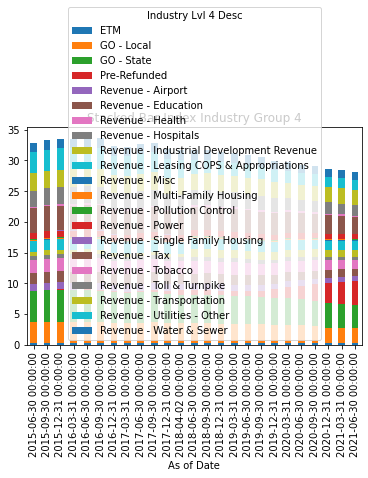

In [ ]:
# Weight Analysis for Industry level 4 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt = ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 4 Desc','% Mkt Value']].copy() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_wt.groupby(['As of Date','Industry Lvl 4 Desc']).sum() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.reset_index( level = [0,1] ) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp['Industry Lvl 4 Desc'].unique() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.columns 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.set_index(['As of Date', 'Industry Lvl 4 Desc']).unstack(['Industry Lvl 4 Desc']) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reindex(columns=sorted(ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns, key=lambda x: x[::-1])) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns.droplevel() 
ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reset_index(inplace = True) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar Index Industry Group 4') 

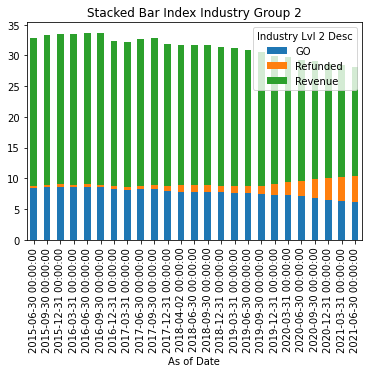

In [ ]:
# Weight Analysis for Industry level 2

ICE_dataset_df_final_merged_factor_data_ind_l4_wt = ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 2 Desc','% Mkt Value']].copy() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_wt.groupby(['As of Date','Industry Lvl 2 Desc']).sum() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.reset_index( level = [0,1] ) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp['Industry Lvl 2 Desc'].unique() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.columns 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.set_index(['As of Date', 'Industry Lvl 2 Desc']).unstack(['Industry Lvl 2 Desc']) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reindex(columns=sorted(ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns, key=lambda x: x[::-1])) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns.droplevel() 
ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reset_index(inplace = True) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar Index Industry Group 2') 

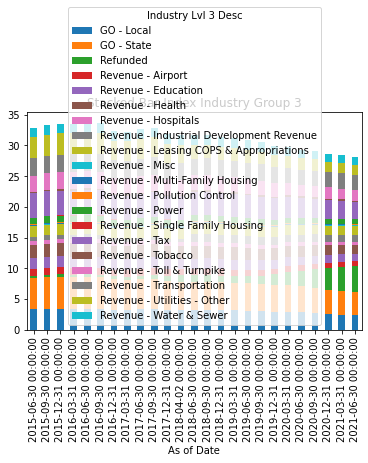

In [ ]:
# Weight Analysis for Industry level 3

ICE_dataset_df_final_merged_factor_data_ind_l4_wt = ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 3 Desc','% Mkt Value']].copy() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_wt.groupby(['As of Date','Industry Lvl 3 Desc']).sum() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.reset_index( level = [0,1] ) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp['Industry Lvl 3 Desc'].unique() 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.columns 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp.set_index(['As of Date', 'Industry Lvl 3 Desc']).unstack(['Industry Lvl 3 Desc']) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reindex(columns=sorted(ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns, key=lambda x: x[::-1])) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns = ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.columns.droplevel() 
ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.reset_index(inplace = True) 

ICE_dataset_df_final_merged_factor_data_ind_l4_wt_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar Index Industry Group 3') 

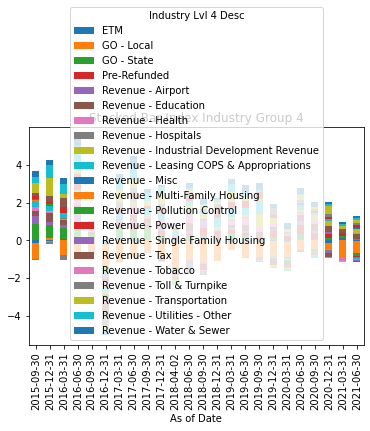

In [ ]:
# For Plots level 4

## ICE dataset

ICE_dataset_df_final_merged_factor_data_ind_l4_ret = ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 4 Desc','Price_return_times_wght']].copy() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_ret.groupby(['As of Date','Industry Lvl 4 Desc']).sum() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.reset_index( level = [0,1] ) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp['Industry Lvl 4 Desc'].unique() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.columns 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.set_index(['As of Date', 'Industry Lvl 4 Desc']).unstack(['Industry Lvl 4 Desc']) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reindex(columns=sorted(ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns, key=lambda x: x[::-1])) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns.droplevel() 
ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reset_index(inplace = True) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar Index Industry Group 4') 

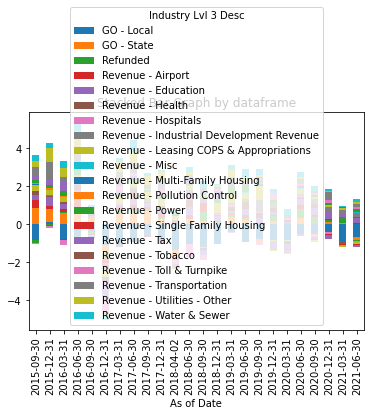

In [ ]:
# For Plots level 3

## ICE dataset

ICE_dataset_df_final_merged_factor_data_ind_l4_ret = ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 3 Desc','Price_return_times_wght']].copy() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_ret.groupby(['As of Date','Industry Lvl 3 Desc']).sum() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.reset_index( level = [0,1] ) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp['Industry Lvl 3 Desc'].unique() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.columns 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.set_index(['As of Date', 'Industry Lvl 3 Desc']).unstack(['Industry Lvl 3 Desc']) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reindex(columns=sorted(ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns, key=lambda x: x[::-1])) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns.droplevel() 
ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reset_index(inplace = True) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar Index Industry Group 3') 

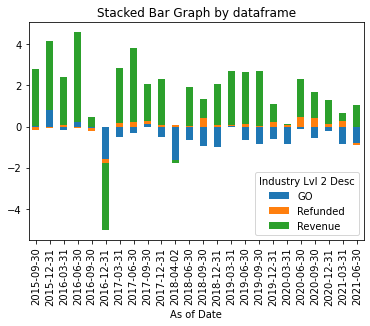

In [ ]:
# For Plots level 2

## ICE dataset

ICE_dataset_df_final_merged_factor_data_ind_l4_ret = ICE_dataset_df_final_merged_factor[['As of Date','Industry Lvl 2 Desc','Price_return_times_wght']].copy() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_ret.groupby(['As of Date','Industry Lvl 2 Desc']).sum() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.reset_index( level = [0,1] ) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp['Industry Lvl 2 Desc'].unique() 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.columns 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp.set_index(['As of Date', 'Industry Lvl 2 Desc']).unstack(['Industry Lvl 2 Desc']) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reindex(columns=sorted(ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns, key=lambda x: x[::-1])) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns = ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.columns.droplevel() 
ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.reset_index(inplace = True) 

ICE_dataset_df_final_merged_factor_data_ind_l4_ret_grp_stacked.plot(x='As of Date', kind='bar', stacked=True,
        title='Stacked Bar Index Industry Group 2') 

In [ ]:
ICE_dataset_df_final_merged_factor_grp_ratings = ICE_dataset_df_final_merged_factor[ICE_dataset_df_final_merged_factor['As of Date']==ICE_dataset_df_final_merged_factor['As of Date'][0]].groupby(['Rating']).count() 
ICE_dataset_df_final_merged_factor_grp_ratings['Cusip'] 

Rating
A1      797
A2      448
A3      364
AA1     874
AA2     883
AA3     799
AAA     611
BBB1    110
BBB2     86
BBB3     42
Name: Cusip, dtype: int64

In [ ]:
ICE_dataset_df_final_merged_factor.columns 

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

# Applying PCA to get the features for returns

## Main Features which affect the returns are the quantitative variables like ('Par Wtd Coupon','Diff_years_interval', 'Maturty_time_weight','Time_Difference_days','% Mkt Value_Prev', 'Price_Prev','Total Return Index Value _LOC' etc..) and qualitative variables like [ 'Industry Lvl 4 Desc','Subordination Type', 'Muni State', 'Muni Insured']

In [ ]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 

ICE_dataset_df_final_merged_factor_qualitative = ICE_dataset_df_final_merged_factor[['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating']] 

one_hot_encoder = OneHotEncoder(sparse = False) 

ICE_dataset_df_final_merged_factor_qualitative_final = pd.DataFrame() 

for i in ICE_dataset_df_final_merged_factor_qualitative.columns: 
  # ICE_dataset_df_final_merged_factor_qualitative[[i]] 
  Test_df_encoded = ICE_dataset_df_final_merged_factor_qualitative[[i]].copy()
  one_hot_encoder.fit(Test_df_encoded) 
  Test_df_encoded = one_hot_encoder.transform(Test_df_encoded) 
  Test_df_encoded = pd.DataFrame(data=Test_df_encoded, columns=one_hot_encoder.categories_) 
  print('\nAfter One Hot Encoding:') 
  display(Test_df_encoded) 
  ICE_dataset_df_final_merged_factor_qualitative_final = pd.concat([ICE_dataset_df_final_merged_factor_qualitative_final, Test_df_encoded], axis=1) 
ICE_dataset_df_final_merged_factor_qualitative_final = pd.DataFrame(data = np.array(ICE_dataset_df_final_merged_factor_qualitative_final),columns = ICE_dataset_df_final_merged_factor_qualitative_final.columns.get_level_values(0))
ICE_dataset_df_final_merged_factor_qualitative_final.head()


After One Hot Encoding:


Cigarette tax Double barreled  ... Tobacco state appropriated Unlimited G.O.
0                0.0             0.0  ...                        0.0            0.0
1                0.0             0.0  ...                        0.0            0.0
2                0.0             0.0  ...                        0.0            0.0
3                0.0             0.0  ...                        0.0            0.0
4                0.0             0.0  ...                        0.0            0.0
...              ...             ...  ...                        ...            ...
125345           0.0             0.0  ...                        0.0            0.0
125346           0.0             0.0  ...                        0.0            0.0
125347           0.0             0.0  ...                        0.0            0.0
125348           0.0             0.0  ...                        0.0            0.0
125349           0.0             0.0  ...                        0.0            1.0

[125350 rows x 17 columns]


After One Hot Encoding:


GO  REV
0       0.0  1.0
1       0.0  1.0
2       0.0  1.0
3       0.0  1.0
4       0.0  1.0
...     ...  ...
125345  0.0  1.0
125346  0.0  1.0
125347  0.0  1.0
125348  0.0  1.0
125349  1.0  0.0

[125350 rows x 2 columns]


After One Hot Encoding:


AK   AL   AR   AZ   CA   CO   CT  ...   UT   VA   VT   WA   WI   WV   WY
0       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
125345  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0
125346  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125347  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125348  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125349  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[125350 rows x 51 columns]


After One Hot Encoding:


AIRP  EDU GOLC GOST HLTH HOSP  IDR  ... SHNG TAXR  TOB TOLL TRAN UTIL WATR
0       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
125345  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125346  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0
125347  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0
125348  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0
125349  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[125350 rows x 19 columns]


After One Hot Encoding:


ETM GO - Local  ... Revenue - Utilities - Other Revenue - Water & Sewer
0       0.0        0.0  ...                         0.0                     0.0
1       0.0        0.0  ...                         0.0                     0.0
2       0.0        0.0  ...                         0.0                     0.0
3       0.0        0.0  ...                         0.0                     0.0
4       0.0        0.0  ...                         0.0                     0.0
...     ...        ...  ...                         ...                     ...
125345  0.0        0.0  ...                         0.0                     0.0
125346  0.0        0.0  ...                         0.0                     0.0
125347  0.0        0.0  ...                         1.0                     0.0
125348  0.0        0.0  ...                         1.0                     0.0
125349  0.0        1.0  ...                         0.0                     0.0

[125350 rows x 21 columns]


After One Hot Encoding:


A1   A2   A3  AA1  AA2  AA3  AAA BBB1 BBB2 BBB3
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
125345  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125346  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125347  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125348  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
125349  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

[125350 rows x 10 columns]

Cigarette tax  Double barreled  Federal grant  ...  BBB1  BBB2  BBB3
0            0.0              0.0            0.0  ...   1.0   0.0   0.0
1            0.0              0.0            0.0  ...   1.0   0.0   0.0
2            0.0              0.0            0.0  ...   0.0   1.0   0.0
3            0.0              0.0            0.0  ...   0.0   0.0   0.0
4            0.0              0.0            0.0  ...   0.0   0.0   0.0

[5 rows x 120 columns]

In [ ]:
ICE_dataset_df_final_merged_factor.head()

Cusip   ISIN number  ... Diff_years_interval Maturty_time_weight
0  00037CRW  US00037CRW28  ...               25-30             0.10426
1  00037CTL  US00037CTL45  ...               30-35             0.14208
2  00037CUQ  US00037CUQ13  ...               20-25             0.08200
3  00037CVN  US00037CVN72  ...               25-30             0.39424
4  00037GAZ  US00037GAZ46  ...               15-20             0.08176

[5 rows x 60 columns]

In [ ]:
ICE_dataset_df_final_merged_factor.reset_index(drop = True,inplace=True) 

In [ ]:
ICE_dataset_df_final_merged_factor.index

RangeIndex(start=0, stop=125350, step=1)

In [ ]:
ICE_dataset_df_final_merged_factor_qualitative_final.index

RangeIndex(start=0, stop=125350, step=1)

In [ ]:
ICE_dataset_df_final_merged_factor_qualitative_final

Cigarette tax  Double barreled  Federal grant  ...  BBB1  BBB2  BBB3
0                 0.0              0.0            0.0  ...   1.0   0.0   0.0
1                 0.0              0.0            0.0  ...   1.0   0.0   0.0
2                 0.0              0.0            0.0  ...   0.0   1.0   0.0
3                 0.0              0.0            0.0  ...   0.0   0.0   0.0
4                 0.0              0.0            0.0  ...   0.0   0.0   0.0
...               ...              ...            ...  ...   ...   ...   ...
125345            0.0              0.0            0.0  ...   0.0   0.0   0.0
125346            0.0              0.0            0.0  ...   0.0   0.0   0.0
125347            0.0              0.0            0.0  ...   0.0   0.0   0.0
125348            0.0              0.0            0.0  ...   0.0   0.0   0.0
125349            0.0              0.0            0.0  ...   0.0   0.0   0.0

[125350 rows x 120 columns]

In [ ]:
ICE_dataset_df_final_merged_factor_qualitative_final.columns 

Index(['Cigarette tax', 'Double barreled', 'Federal grant', 'Fuel/vehicle tax',
       'Hotel tax', 'Lease-rental', 'Limited G.O.', 'Miscellaneous tax',
       'Personal income tax', 'Pilot',
       ...
       'A1', 'A2', 'A3', 'AA1', 'AA2', 'AA3', 'AAA', 'BBB1', 'BBB2', 'BBB3'],
      dtype='object', length=120)

In [ ]:
ICE_dataset_df_final_merged_factor.columns

Index(['Cusip', 'ISIN number', 'Description', 'Ticker', 'Par Wtd Coupon',
       'Maturity Date', 'Rating', 'ISO Currency Code', 'ISO Country Code',
       'Industry Lvl 1 Desc', 'Industry Lvl 2 Desc', 'Industry Lvl 3 Desc',
       'Industry Lvl 4 Desc', 'Face Value_LOC', 'Price', 'Accrued Interest',
       '% Mkt Value', '% MktVal-PrevMend', 'Cash', 'OAS', 'OAS MTD Change',
       'Asset Swap Spread', 'Asset Swap MTD Chg', 'Effective Yield',
       'Yield to Worst (s.a.)', 'Yield to Maturity (s.a.)',
       'Total Return % MTD_LOC', 'Excess Return % MTD', 'Effective Duration',
       'Mod. Dur to Worst (s.a.)', 'Modified Duration (s.a.)',
       'Effective Convexity', 'Convexity to Worst (s.a.)', 'Convexity (s.a.)',
       'Subordination Type', 'Total Return Index Value _LOC',
       'Total Return % 3-mo_LOC', 'Muni Issuer Name', 'As of Date',
       'Muni State', 'Muni Purpose Code', 'Muni Source Code', 'AMT Status',
       'Muni Insured', 'Cusip9', 'Muni Security Type',
       'Muni

In [ ]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 

ICE_dataset_df_final_merged_factor_qualitative = ICE_dataset_df_final_merged_factor[['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating']] 

one_hot_encoder = OneHotEncoder(sparse = False) 

ICE_dataset_df_final_merged_factor_qualitative_final = pd.DataFrame() 

for i in ICE_dataset_df_final_merged_factor_qualitative.columns: 
  # ICE_dataset_df_final_merged_factor_qualitative[[i]] 
  Test_df_encoded = ICE_dataset_df_final_merged_factor_qualitative[[i]].copy()
  one_hot_encoder.fit(Test_df_encoded) 
  Test_df_encoded = one_hot_encoder.transform(Test_df_encoded) 
  Test_df_encoded = pd.DataFrame(data=Test_df_encoded, columns=one_hot_encoder.categories_) 
  print('\nAfter One Hot Encoding:') 
  display(Test_df_encoded) 
  ICE_dataset_df_final_merged_factor_qualitative_final = pd.concat([ICE_dataset_df_final_merged_factor_qualitative_final, Test_df_encoded], axis=1) 
ICE_dataset_df_final_merged_factor_qualitative_final = pd.DataFrame(data = np.array(ICE_dataset_df_final_merged_factor_qualitative_final),columns = ICE_dataset_df_final_merged_factor_qualitative_final.columns.get_level_values(0))
ICE_dataset_df_final_merged_factor_qualitative_final.head()

ICE_dataset_df_final_merged_factor_drop_cols = ICE_dataset_df_final_merged_factor.drop(['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'], axis = 1).copy() 

# ICE_dataset_df_final_merged_factor.drop(['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'], axis = 1) 
# del ICE_dataset_df_final_merged_factor['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'] 

ICE_dataset_df_final_merged_factor_updated = pd.concat([ICE_dataset_df_final_merged_factor_qualitative_final,ICE_dataset_df_final_merged_factor_drop_cols], axis = 1) 
ICE_dataset_df_final_merged_factor_updated.tail() 

ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop( ['Subordination Type', 'Muni Issuer Name','% Mkt_Value_Prev_factor','Time_Difference','Price_Return','Diff_years_interval'], axis = 1)
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop(['Cusip',	'ISIN number',	'Description',	'Ticker',	'Par Wtd Coupon',	'Maturity Date',	'ISO Currency Code',	'ISO Country Code',	'Industry Lvl 1 Desc',	'Industry Lvl 2 Desc',	'Industry Lvl 3 Desc','As of Date',	'AMT Status',	'Muni Insured',	'Cusip9',	'Muni Conduit Obligor Name','Maturty_time_weight','Price_return_times_wght','As of Date_New','Diff_years','Price_return_times_wght_annual'], axis = 1)

# Removing Nan Columns 
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop(['OAS', 'OAS MTD Change', 'Asset Swap Spread', 'Asset Swap MTD Chg'], axis = 1)

# checking for Nan values
df = ICE_dataset_df_final_merged_factor_updated.copy()

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)


In [ ]:
ICE_dataset_df_final_merged_factor_drop_cols = ICE_dataset_df_final_merged_factor.drop(['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'], axis = 1).copy() 

# ICE_dataset_df_final_merged_factor.drop(['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'], axis = 1) 
# del ICE_dataset_df_final_merged_factor['Muni Security Type','Muni Source Code','Muni State','Muni Purpose Code','Industry Lvl 4 Desc','Rating'] 

ICE_dataset_df_final_merged_factor_updated = pd.concat([ICE_dataset_df_final_merged_factor_qualitative_final,ICE_dataset_df_final_merged_factor_drop_cols], axis = 1) 
ICE_dataset_df_final_merged_factor_updated.tail() 

Cigarette tax  ...  Maturty_time_weight
125345            0.0  ...              0.09414
125346            0.0  ...              0.00356
125347            0.0  ...              0.05886
125348            0.0  ...              0.08211
125349            0.0  ...              0.02260

[5 rows x 174 columns]

In [ ]:
ICE_dataset_df_final_merged_factor_updated.columns

Index(['Cigarette tax', 'Double barreled', 'Federal grant', 'Fuel/vehicle tax',
       'Hotel tax', 'Lease-rental', 'Limited G.O.', 'Miscellaneous tax',
       'Personal income tax', 'Pilot',
       ...
       'Time_Difference', 'Time_Difference_days', 'Price_Return',
       'Price_Return_ann', '% Mkt_Value_Prev_factor',
       'Price_return_times_wght', 'Price_return_times_wght_annual',
       'Diff_years', 'Diff_years_interval', 'Maturty_time_weight'],
      dtype='object', length=174)

In [ ]:
ICE_dataset_df_final_merged_factor_updated.describe()

Cigarette tax  Double barreled  ...     Diff_years  Maturty_time_weight
count  125350.000000    125350.000000  ...  125350.000000        125350.000000
mean        0.001596         0.020343  ...      13.529031             0.095412
std         0.039912         0.141171  ...       8.020902             0.158988
min         0.000000         0.000000  ...       1.000000             0.000370
25%         0.000000         0.000000  ...       7.000000             0.028640
50%         0.000000         0.000000  ...      12.000000             0.054230
75%         0.000000         0.000000  ...      20.000000             0.099680
max         1.000000         1.000000  ...      78.000000             3.331460

[8 rows x 157 columns]

In [ ]:
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop( ['Subordination Type', 'Muni Issuer Name','% Mkt_Value_Prev_factor','Time_Difference','Price_Return','Diff_years_interval'], axis = 1)
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop(['Cusip',	'ISIN number',	'Description',	'Ticker',	'Par Wtd Coupon',	'Maturity Date',	'ISO Currency Code',	'ISO Country Code',	'Industry Lvl 1 Desc',	'Industry Lvl 2 Desc',	'Industry Lvl 3 Desc','As of Date',	'AMT Status',	'Muni Insured',	'Cusip9',	'Muni Conduit Obligor Name','Maturty_time_weight','Price_return_times_wght','As of Date_New','Diff_years','Price_return_times_wght_annual'], axis = 1)

In [ ]:
ICE_dataset_df_final_merged_factor_updated.dtypes[145:] 

Time_Difference_days    float64
Price_Return_ann        float64
dtype: object

In [ ]:
# Removing first period data as we don't have values of return for the same 
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.dropna(axis=0, subset=['Price_Return_ann']) 
ICE_dataset_df_final_merged_factor_updated.reset_index(drop=True,inplace=True)

In [ ]:
# checking for Nan values
df = ICE_dataset_df_final_merged_factor_updated.copy()

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['OAS', 'OAS MTD Change', 'Asset Swap Spread', 'Asset Swap MTD Chg']


In [ ]:
# Removing Nan Columns 
ICE_dataset_df_final_merged_factor_updated = ICE_dataset_df_final_merged_factor_updated.drop(['OAS', 'OAS MTD Change', 'Asset Swap Spread', 'Asset Swap MTD Chg'], axis = 1)

In [ ]:
# Code for Reference 
# import statsmodels.api as sm # import statsmodels 

# X = df["RM"] ## X usually means our input variables (or independent variables) 
# y = target["MEDV"] ## Y usually means our output/dependent variable 
# X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# # Note the difference in argument order 
# model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
# predictions = model.predict(X) 

# # Print out the statistics 
# model.summary() 

In [ ]:
len(ICE_dataset_df_final_merged_factor_updated.columns) 

143

In [ ]:
ICE_dataset_df_final_merged_factor_updated.describe() 

Cigarette tax  Double barreled  ...  Time_Difference_days  Price_Return_ann
count  120336.000000    120336.000000  ...         120336.000000     120336.000000
mean        0.001596         0.020343  ...             91.333333          0.008969
std         0.039912         0.141171  ...              0.849840          0.105271
min         0.000000         0.000000  ...             89.000000         -0.771273
25%         0.000000         0.000000  ...             91.000000         -0.036536
50%         0.000000         0.000000  ...             92.000000          0.003281
75%         0.000000         0.000000  ...             92.000000          0.050440
max         1.000000         1.000000  ...             92.000000          2.682404

[8 rows x 143 columns]

In [ ]:
import statsmodels.api as sm # import statsmodels 

y = ICE_dataset_df_final_merged_factor_updated['Price_Return_ann'] ## Y usually means our output/dependent variable 
X = ICE_dataset_df_final_merged_factor_updated.drop(['Price_Return_ann'], axis = 1) 
# X = ICE_dataset_df_final_merged_factor_updated[] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model 

# Note the difference in argument order 
model = sm.OLS(y, X).fit() ## sm.OLS(output, input) 
predictions = model.predict(X) 

# Print out the statistics 
model.summary() 

X.corr()

from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot 

model = LinearRegression() 
y = ICE_dataset_df_final_merged_factor_updated['Price_Return_ann'] ## Y usually means our output/dependent variable 
X = ICE_dataset_df_final_merged_factor_updated.drop(['Price_Return_ann'], axis = 1) 

# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show() 

# Selecting top 10 and bottom 10 features 
Impor_Series = pd.Series(data = importance) 

list_index_least_imp = list(Impor_Series.sort_values()[:10].index) 
list_index_most_imp = list(Impor_Series.sort_values()[-10:].index) 

print("Least_important features:",X.columns[list_index_least_imp]) 
print("Most_important features:",X.columns[list_index_most_imp]) 

# Selecting top 10 and bottom 10 features
Impor_Series_scaled = pd.Series(data = importance_scaled) 

list_index_least_imp_scaled = list(Impor_Series_scaled.sort_values()[:10].index) 
list_index_most_imp_scaled = list(Impor_Series_scaled.sort_values()[-10:].index) 

print("Least_important features:",X.columns[list_index_least_imp_scaled]) 
print("Most_important features:",X.columns[list_index_most_imp_scaled]) 

yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Price_Return_ann   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 5.804e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        04:40:18   Log-Likelihood:             3.4971e+05
No. Observations:              120336   AIC:                        -6.992e+05
Df Residuals:                  120206   BIC:                        -6.979e+05
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0180      0.002     -7.704      0.000      -0.023      -0.013
Cigarette tax                               -0.0003      0.001     -0.259      0.796      -0.002       0.002
Double barreled                             -0.0024      0.001     -2.162      0.031      -0.005      -0.000
Federal grant                               -0.0016      0.001     -2.238      0.025      -0.003      -0.000
Fuel/vehicle tax                            -0.0019      0.001     -2.441      0.015      -0.003      -0.000
Hotel tax                                   -0.0029      0.002     -1.590      0.112      -0.007       0.001
Lease-rental                                -0.0015      0.000     -3.141      0.002      -0.002      -0.001
Limited G.O.                                -0.0018      0.001     -1.644      0.100      -0.004       0.000
Miscellaneous tax                            0.0007      0.000      1.609      0.108      -0.000       0.002
Personal income tax                         -0.0006      0.000     -1.183      0.237      -0.001       0.000
Pilot                                       -0.0009      0.003     -0.334      0.739      -0.006       0.004
Revenue                                     -0.0014      0.000     -3.440      0.001      -0.002      -0.001
Sales/excise tax                            -0.0003      0.000     -0.546      0.585      -0.001       0.001
Special assessment                           0.0012      0.001      0.974      0.330      -0.001       0.004
Tax allocation/increment                    -0.0022      0.001     -2.255      0.024      -0.004      -0.000
Tobacco settlement non-appropriated         -0.0069      0.001    -11.763      0.000      -0.008      -0.006
Tobacco state appropriated                   0.0065      0.001     11.596      0.000       0.005       0.008
Unlimited G.O.                              -0.0018      0.001     -1.639      0.101      -0.004       0.000
GO                                          -0.0077      0.001     -6.677      0.000      -0.010      -0.005
REV                                         -0.0103      0.001     -7.201      0.000      -0.013      -0.007
AK                                          -0.0021      0.002     -1.319      0.187      -0.005       0.001
AL                                          -0.0008      0.000     -1.767      0.077      -0.002    9.25e-05
AR                                        3.046e-05      0.001      0.023      0.982      -0.003       0.003
AZ                                          -0.0005      0.000     -1.559      0.119      -0.001       0.000
CA                                           0.0001      0.000      0.863      0.388      -0.000       0.000
CO                             

In [ ]:
X.corr()

const  ...  Time_Difference_days
const                            NaN  ...                   NaN
Cigarette tax                    NaN  ...         -8.880230e-16
Double barreled                  NaN  ...         -5.180763e-16
Federal grant                    NaN  ...         -7.148106e-17
Fuel/vehicle tax                 NaN  ...          2.216281e-16
...                              ...  ...                   ...
Total Return Index Value _LOC    NaN  ...         -2.431324e-02
Total Return % 3-mo_LOC          NaN  ...         -1.633112e-01
% Mkt Value_Prev                 NaN  ...          8.931292e-03
Price_Prev                       NaN  ...          4.466338e-02
Time_Difference_days             NaN  ...          1.000000e+00

[143 rows x 143 columns]

Feature: 0, Score: 0.00087
Feature: 1, Score: -0.00130
Feature: 2, Score: -0.00043
Feature: 3, Score: -0.00078
Feature: 4, Score: -0.00180
Feature: 5, Score: -0.00040
Feature: 6, Score: -0.00068
Feature: 7, Score: 0.00188
Feature: 8, Score: 0.00057
Feature: 9, Score: 0.00026
Feature: 10, Score: -0.00027
Feature: 11, Score: 0.00088
Feature: 12, Score: 0.00234
Feature: 13, Score: -0.00111
Feature: 14, Score: -0.00639
Feature: 15, Score: 0.00702
Feature: 16, Score: -0.00065
Feature: 17, Score: -0.00028
Feature: 18, Score: 0.00028
Feature: 19, Score: -0.00171
Feature: 20, Score: -0.00049
Feature: 21, Score: 0.00038
Feature: 22, Score: -0.00012
Feature: 23, Score: 0.00050
Feature: 24, Score: 0.00079
Feature: 25, Score: 0.00005
Feature: 26, Score: -0.00040
Feature: 27, Score: -0.00210
Feature: 28, Score: -0.00117
Feature: 29, Score: 0.00020
Feature: 30, Score: -0.00045
Feature: 31, Score: 0.00017
Feature: 32, Score: -0.00032
Feature: 33, Score: -0.00282
Feature: 34, Score: 0.00031
Feature: 3

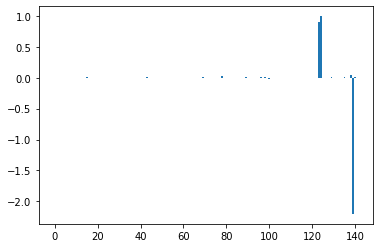

In [ ]:
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot 

model = LinearRegression() 
y = ICE_dataset_df_final_merged_factor_updated['Price_Return_ann'] ## Y usually means our output/dependent variable 
X = ICE_dataset_df_final_merged_factor_updated.drop(['Price_Return_ann'], axis = 1) 

# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Selecting top 10 and bottom 10 features 
Impor_Series = pd.Series(data = importance) 

list_index_least_imp = list(Impor_Series.sort_values()[:10].index) 
list_index_most_imp = list(Impor_Series.sort_values()[-10:].index) 

print("Least_important features:",X.columns[list_index_least_imp]) 
print("Most_important features:",X.columns[list_index_most_imp]) 

Least_important features: Index(['% Mkt Value_Prev', 'Revenue - Multi-Family Housing',
       'Convexity (s.a.)', 'Tobacco settlement non-appropriated',
       'Yield to Maturity (s.a.)', 'HOSP', 'Price', 'LEAS', 'POWR', 'TAXR'],
      dtype='object')
Most_important features: Index(['Revenue - Leasing COPS & Appropriations', 'Price_Prev', 'WY',
       'Total Return % MTD_LOC', 'Tobacco state appropriated', 'ETM', 'MHNG',
       'Total Return % 3-mo_LOC', '% Mkt Value', '% MktVal-PrevMend'],
      dtype='object')


In [ ]:
# After Rescaling Most important Features
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 

cols_scaled = ICE_dataset_df_final_merged_factor_updated.columns 

df_scaled = scaler.fit_transform(ICE_dataset_df_final_merged_factor_updated.to_numpy()) 

ICE_dataset_df_final_merged_factor_updated_scaled = pd.DataFrame(df_scaled, columns = cols_scaled) 

Feature: 0, Score: -3706095407.15232
Feature: 1, Score: -3706095407.15304
Feature: 2, Score: -3706095407.15279
Feature: 3, Score: -3706095407.15285
Feature: 4, Score: -3706095407.15300
Feature: 5, Score: -3706095407.15273
Feature: 6, Score: -3706095407.15285
Feature: 7, Score: -3706095407.15207
Feature: 8, Score: -3706095407.15249
Feature: 9, Score: -3706095407.15257
Feature: 10, Score: -3706095407.15270
Feature: 11, Score: -3706095407.15233
Feature: 12, Score: -3706095407.15190
Feature: 13, Score: -3706095407.15293
Feature: 14, Score: 16334602875.74678
Feature: 15, Score: 16334602875.75082
Feature: 16, Score: -3706095407.15284
Feature: 17, Score: -38894314.00754
Feature: 18, Score: 1689730879.69913
Feature: 19, Score: 3881249170.06792
Feature: 20, Score: 3881249170.06830
Feature: 21, Score: 3881249170.06854
Feature: 22, Score: 3881249170.06838
Feature: 23, Score: 3881249170.06858
Feature: 24, Score: 3881249170.06864
Feature: 25, Score: 3881249170.06842
Feature: 26, Score: 3881249170.0

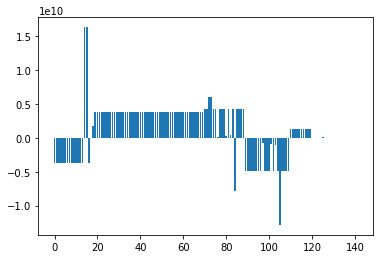

In [ ]:
model_scaled = LinearRegression() 
y_scaled = ICE_dataset_df_final_merged_factor_updated_scaled['Price_Return_ann'] ## Y usually means our output/dependent variable 
X_scaled = ICE_dataset_df_final_merged_factor_updated_scaled.drop(['Price_Return_ann'], axis = 1) 

# fit the model
model_scaled.fit(X_scaled, y_scaled) 
# get importance 
importance_scaled = model_scaled.coef_ 
# summarize feature importance
for i,v in enumerate(importance_scaled): 
	print('Feature: %0d, Score: %.5f' % (i,v)) 
# plot feature importance
pyplot.bar([x for x in range(len(importance_scaled))], importance_scaled) 
pyplot.show() 

In [ ]:
# Selecting top 10 and bottom 10 features
Impor_Series_scaled = pd.Series(data = importance_scaled) 

list_index_least_imp_scaled = list(Impor_Series_scaled.sort_values()[:10].index) 
list_index_most_imp_scaled = list(Impor_Series_scaled.sort_values()[-10:].index) 

print("Least_important features:",X.columns[list_index_least_imp_scaled]) 
print("Most_important features:",X.columns[list_index_most_imp_scaled]) 

Least_important features: Index(['Revenue - Tobacco', 'TOB', 'Revenue - Multi-Family Housing',
       'Pre-Refunded', 'Revenue - Health', 'Revenue - Misc',
       'Revenue - Toll & Turnpike', 'Revenue - Water & Sewer', 'GO - Local',
       'GO - State'],
      dtype='object')
Most_important features: Index(['MISC', 'TRAN', 'WATR', 'HLTH', 'TOLL', 'MHNG', 'GOST', 'GOLC',
       'Tobacco settlement non-appropriated', 'Tobacco state appropriated'],
      dtype='object')


## Scaling of Data will be tough as we will have to scale the data for each stock. Moreover, it is not a good scaling to do as it is a time series parameter. So, I will be working with non-scaled parameters and will be trying to check for improving these parameters.

In [ ]:
## 
Impor_Series.sort_values()[-10:]

98     0.004258
140    0.004435
69     0.005280
129    0.005299
15     0.007020
89     0.007525
78     0.021052
138    0.043047
123    0.900997
124    0.993631
dtype: float64

So, we have Monthly weights with the highest feature importance factors.

In [ ]:
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8142569817830178 0.8140406331616077


### As the unscaled model shows pretty good Rsquared coefficient, I can either assume the data to have forward bias or the our model is fine to use. Now, I will start working on the main features.

In [ ]:
list_index_most_imp = list(Impor_Series.sort_values()[-50:].index) 

print("Most_important features:",X.columns[list_index_most_imp]) 

Most_important features: Index(['RI', 'AR', 'MD', 'CA', 'UT', 'Time_Difference_days', 'IDR',
       'Revenue - Industrial Development Revenue', 'Personal income tax',
       'BBB2', 'Revenue - Tobacco', 'TOB', 'A3', 'GO - Local', 'CO', 'PR',
       'BBB1', 'Cigarette tax', 'Sales/excise tax', 'KS',
       'Mod. Dur to Worst (s.a.)', 'Effective Convexity', 'GO - State', 'HLTH',
       'BBB3', 'NJ', 'Revenue - Tax', 'Revenue - Education',
       'Miscellaneous tax', 'Revenue - Transportation', 'TOLL',
       'Revenue - Airport', 'Special assessment',
       'Revenue - Utilities - Other', 'Revenue - Power', 'OR',
       'Modified Duration (s.a.)', 'Revenue - Hospitals',
       'Convexity to Worst (s.a.)', 'MN',
       'Revenue - Leasing COPS & Appropriations', 'Price_Prev', 'WY',
       'Total Return % MTD_LOC', 'Tobacco state appropriated', 'ETM', 'MHNG',
       'Total Return % 3-mo_LOC', '% Mkt Value', '% MktVal-PrevMend'],
      dtype='object')


Feature: 0, Score: -0.00866
Feature: 1, Score: 0.01417
Feature: 2, Score: -0.00183
Feature: 3, Score: -0.00727
Feature: 4, Score: -0.00203
Feature: 5, Score: -0.00339
Feature: 6, Score: 0.01450
Feature: 7, Score: 0.00236
Feature: 8, Score: -0.00255
Feature: 9, Score: -0.00187
Feature: 10, Score: -0.00301
Feature: 11, Score: -0.00387
Feature: 12, Score: -0.00536
Feature: 13, Score: -0.00444
Feature: 14, Score: -0.00333
Feature: 15, Score: 0.00190
Feature: 16, Score: 0.01465
Feature: 17, Score: -0.00600
Feature: 18, Score: 0.00600
Feature: 19, Score: 0.00045
Feature: 20, Score: -0.00140
Feature: 21, Score: -0.00056
Feature: 22, Score: -0.00001
Feature: 23, Score: 0.00027
Feature: 24, Score: 0.00001
Feature: 25, Score: -0.00189
Feature: 26, Score: 0.00060
Feature: 27, Score: 0.00007
Feature: 28, Score: -0.00076
Feature: 29, Score: -0.00012
Feature: 30, Score: 0.00206
Feature: 31, Score: 0.00028
Feature: 32, Score: 0.00210
Feature: 33, Score: -0.00348
Feature: 34, Score: 0.00069
Feature: 3

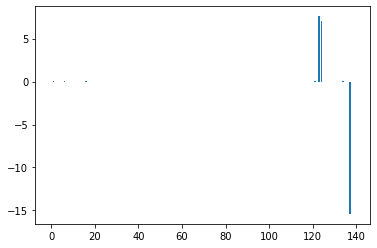

In [ ]:
# ['Total Return % MTD_LOC','Total Return % 3-mo_LOC']
model = LinearRegression() 

# ICE_dataset_df_final_merged_factor_updated.drop(['Total Return % MTD_LOC','Total Return % 3-mo_LOC'],in) 

y = ICE_dataset_df_final_merged_factor_updated['Price_Return_ann'] ## Y usually means our output/dependent variable 
X = ICE_dataset_df_final_merged_factor_updated.drop(['Price_Return_ann','Total Return % MTD_LOC','Total Return % 3-mo_LOC'], axis = 1) 

# fit the model
model.fit(X, y) 
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v)) 
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show() 

In [ ]:
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9842000110391382 0.9841813444077001
